<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Load-Data" data-toc-modified-id="Load-Data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Load Data</a></span></li><li><span><a href="#Separate-Datasets-into-Heating-and-Cooling" data-toc-modified-id="Separate-Datasets-into-Heating-and-Cooling-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Separate Datasets into Heating and Cooling</a></span></li><li><span><a href="#Cumulative-Sum-Data" data-toc-modified-id="Cumulative-Sum-Data-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Cumulative Sum Data</a></span></li><li><span><a href="#Plot-Raw-Data" data-toc-modified-id="Plot-Raw-Data-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Plot Raw Data</a></span></li><li><span><a href="#Partial-Pressures" data-toc-modified-id="Partial-Pressures-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Partial Pressures</a></span><ul class="toc-item"><li><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Step-1:-Correct-for-Ion-Fragments-and-Atmospheric-Adsorption" data-toc-modified-id="Step-1:-Correct-for-Ion-Fragments-and-Atmospheric-Adsorption-5.0.0.1"><span class="toc-item-num">5.0.0.1&nbsp;&nbsp;</span>Step 1: Correct for Ion Fragments and Atmospheric Adsorption</a></span></li></ul></li><li><span><a href="#Algebraic-Method" data-toc-modified-id="Algebraic-Method-5.0.1"><span class="toc-item-num">5.0.1&nbsp;&nbsp;</span>Algebraic Method</a></span></li><li><span><a href="#Least-Squares-Method" data-toc-modified-id="Least-Squares-Method-5.0.2"><span class="toc-item-num">5.0.2&nbsp;&nbsp;</span>Least Squares Method</a></span></li><li><span><a href="#Plot" data-toc-modified-id="Plot-5.0.3"><span class="toc-item-num">5.0.3&nbsp;&nbsp;</span>Plot</a></span></li></ul></li><li><span><a href="#Background-Subtraction" data-toc-modified-id="Background-Subtraction-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Background Subtraction</a></span></li><li><span><a href="#Total-Pressure" data-toc-modified-id="Total-Pressure-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Total Pressure</a></span></li></ul></li><li><span><a href="#Mole-Fractions" data-toc-modified-id="Mole-Fractions-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Mole Fractions</a></span><ul class="toc-item"><li><span><a href="#Calculate" data-toc-modified-id="Calculate-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Calculate</a></span></li><li><span><a href="#Plot" data-toc-modified-id="Plot-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Plot</a></span></li><li><span><a href="#Bulk-Elemental-Abundances" data-toc-modified-id="Bulk-Elemental-Abundances-6.3"><span class="toc-item-num">6.3&nbsp;&nbsp;</span>Bulk Elemental Abundances</a></span></li></ul></li><li><span><a href="#Relative-Abundances-(Mole-Fraction-Summed-over-Temperature)" data-toc-modified-id="Relative-Abundances-(Mole-Fraction-Summed-over-Temperature)-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Relative Abundances (Mole Fraction Summed over Temperature)</a></span></li><li><span><a href="#Uncertainties-&amp;-Reproducibility" data-toc-modified-id="Uncertainties-&amp;-Reproducibility-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Uncertainties &amp; Reproducibility</a></span><ul class="toc-item"><li><span><a href="#Uncertainties" data-toc-modified-id="Uncertainties-8.1"><span class="toc-item-num">8.1&nbsp;&nbsp;</span>Uncertainties</a></span></li><li><span><a href="#Plots" data-toc-modified-id="Plots-8.2"><span class="toc-item-num">8.2&nbsp;&nbsp;</span>Plots</a></span></li></ul></li><li><span><a href="#Abundance-Ratios" data-toc-modified-id="Abundance-Ratios-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Abundance Ratios</a></span></li><li><span><a href="#Mass-Loss" data-toc-modified-id="Mass-Loss-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>Mass Loss</a></span></li><li><span><a href="#Initial-Atomic-Abundances" data-toc-modified-id="Initial-Atomic-Abundances-11"><span class="toc-item-num">11&nbsp;&nbsp;</span>Initial Atomic Abundances</a></span></li><li><span><a href="#Chemical-Equilibrium-Models" data-toc-modified-id="Chemical-Equilibrium-Models-12"><span class="toc-item-num">12&nbsp;&nbsp;</span>Chemical Equilibrium Models</a></span><ul class="toc-item"><li><span><a href="#Recomputed-Equilibrium-Abundances" data-toc-modified-id="Recomputed-Equilibrium-Abundances-12.1"><span class="toc-item-num">12.1&nbsp;&nbsp;</span>Recomputed Equilibrium Abundances</a></span></li></ul></li><li><span><a href="#Oxygen-Fugacity" data-toc-modified-id="Oxygen-Fugacity-13"><span class="toc-item-num">13&nbsp;&nbsp;</span>Oxygen Fugacity</a></span></li></ul></div>

In [2]:
import numpy as np
import pandas as pd 
import glob 
import os 
import scipy.integrate as integrate
from scipy.interpolate import interp1d

%matplotlib inline 
import matplotlib
import matplotlib.pyplot as plt
plt.rc("savefig", dpi=300)
plt.rc('figure', dpi=300)
plt.rc('text', usetex=False)
plt.rc('xtick', direction='in') 
plt.rc('ytick', direction='in')
plt.rc('xtick.major', pad=5) 
plt.rc('xtick.minor', pad=5)
plt.rc('ytick.major', pad=5) 
plt.rc('ytick.minor', pad=5)
plt.rc('lines', dotted_pattern = [0.5, 1.1])

font={'family':'sans-serif', 'sans-serif': 'Arial', 'weight':'normal',
     'size': 6}
matplotlib.rc('font', **font)
plt.rcParams["figure.figsize"] = (3.46,2.60)

## Load Data

In [3]:
path_B = '/Users/maggiethompson/Desktop/UCSantaCruz/1stYearProjects/Experiments/HeatingExperiments/Data/070519_BlankTrial/*.txt'
files_B = sorted(glob.glob(path_B))

path_M = '/Users/maggiethompson/Desktop/UCSantaCruz/1stYearProjects/Experiments/HeatingExperiments/Data/070819_MurchisonRun/*.txt'
files_M = sorted(glob.glob(path_M))

path_W1 = '/Users/maggiethompson/Desktop/UCSantaCruz/1stYearProjects/Experiments/HeatingExperiments/Data/071819_Winselwan/*.txt'
files_W1 = sorted(glob.glob(path_W1))

path_W2 = '/Users/maggiethompson/Desktop/UCSantaCruz/1stYearProjects/Experiments/HeatingExperiments/Data/071419_Winselwan/*.txt'
files_W2 = sorted(glob.glob(path_W2))

path_AZ = '/Users/maggiethompson/Desktop/UCSantaCruz/1stYearProjects/Experiments/HeatingExperiments/Data/071919_AguasZarcas/*.txt'
files_AZ = sorted(glob.glob(path_AZ))

TorrtoBar = (1.0/750.061682704)

def getdata(file_list):
    data_df1 = pd.read_csv(file_list[0], skiprows=32, names=['Time', 'H2', 'C', 'N', 'CH4', 'H2O', 'N2_CO', 'S_O2', 'H2S', 'KH_NaOH','CO2', 'index'])
    data_df2 = pd.read_csv(file_list[1],  delimiter='\t', names=['Time', 'T_K'], usecols=[0,1])
    data_df3 = pd.read_csv(file_list[2], skiprows=21, names=['Mass', 'Pressure', 'ind'])
    data_df4 = pd.read_csv(file_list[3], skiprows=21, names=['Mass', 'Pressure', 'ind'])
    data_df5 = pd.read_csv(file_list[4], skiprows=21, names=['Mass', 'Pressure', 'ind'])
    data_df1['T_interp_K'] = np.interp(data_df1.Time, data_df2.Time, data_df2.T_K)
    data_df1['T_interp_C'] = data_df1.T_interp_K - 273.15
    return [data_df1, data_df2, data_df3, data_df4, data_df5]    

def getdata_Murch(file_list):
    data_df1 = pd.read_csv(file_list[0], skiprows=32, names=['Time', 'H2', 'C', 'N', 'CH4', 'H2O', 'N2_CO', 'S_O2', 'H2S', 'KH_NaOH','CO2', 'index'])
    data_df2 = pd.read_csv(file_list[1],  delimiter='\t', names=['Time', 'T_K'], usecols=[0,1])
    data_df3 = pd.read_csv(file_list[2], skiprows=21, names=['Mass', 'Pressure', 'ind'])
    data_df4 = pd.read_csv(file_list[3], skiprows=21, names=['Mass', 'Pressure', 'ind'])
    data_df5 = pd.read_csv(file_list[4], skiprows=21, names=['Mass', 'Pressure', 'ind'])
    data_df6 = pd.read_csv(file_list[4], skiprows=21, names=['Mass', 'Pressure', 'ind'])
    data_df1['T_interp_K'] = np.interp(data_df1.Time, data_df2.Time, data_df2.T_K)
    data_df1['T_interp_C'] = data_df1.T_interp_K - 273.15
    return [data_df1, data_df2, data_df3, data_df4, data_df5, data_df6]


#Blank Run 
B_data = getdata(files_B)
B_continuous = B_data[0]
B_TvsTime = B_data[1]
B_postheating80 = B_data[2]
B_preheating200 = B_data[3]
B_preheating40 = B_data[4]
#Murchison Run:
M_data = getdata_Murch(files_M)
M_continuous = M_data[0]
M_TvsTime = M_data[1]
M_postheating72 = M_data[2]
M_preheating200 = M_data[3]
M_preheating45 = M_data[4]
M_preheating50 = M_data[5]
#Winselwan Runs: 
W1_data = getdata(files_W1)
W1_continuous = W1_data[0]
W1_TvsTime = W1_data[1]
W1_postheating578 = W1_data[2]
W1_preheating200 = W1_data[3]
W1_preheating51 = W1_data[4]

W2_data = getdata(files_W2)
W2_continuous = W2_data[0]
W2_TvsTime = W2_data[1]
W2_postheating65 = W2_data[2]
W2_preheating200 = W2_data[3]
W2_preheating55 = W2_data[4]

#Aquas Zarcas (Fresh CM Fall!):
AZ_data = getdata(files_AZ)
AZ_continuous = AZ_data[0]
AZ_TvsTime = AZ_data[1]
AZ_postheating74 = AZ_data[2]
AZ_preheating200 = AZ_data[3]
AZ_preheating53 = AZ_data[4]

No handles with labels found to put in legend.


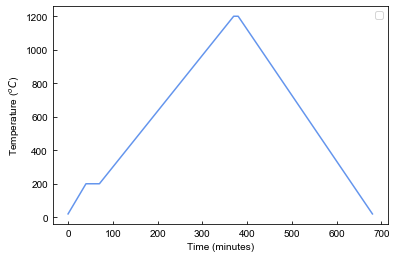

In [4]:
#Plot Heating Scheme

fig, ax = plt.subplots()
ax.plot([0,40,70, 370, 380, 680], [20, 200, 200, 1200, 1200,20], linestyle='-', color='cornflowerblue')
plt.legend()
plt.xlabel('Time (minutes)')
plt.ylabel('Temperature ($^oC$)')
plt.savefig('steppedheating_scheme_1200C.jpg', dpi=1000)
plt.show()


## Separate Datasets into Heating and Cooling

In [4]:
def HeatandCool(file):
    file_bounds = file[(file.T_interp_C >= 200) & (file.T_interp_C <=1200)]
    file_maxT = file_bounds[file_bounds.T_interp_C == np.amax(file_bounds.T_interp_C)]
    file_heat = file_bounds[file_bounds.Time <= file_maxT['Time'].values[0]]
    file_cool = file_bounds[file_bounds.Time > file_maxT['Time'].values[0]]
    return(file_heat, file_cool)

M_rawHeat, M_rawCool = HeatandCool(M_continuous)

B_rawHeat, B_rawCool = HeatandCool(B_continuous)

W1_rawHeat, W1_rawCool = HeatandCool(W1_continuous)

W2_rawHeat, W2_rawCool = HeatandCool(W2_continuous)

AZ_rawHeat, AZ_rawCool = HeatandCool(AZ_continuous)
M_rawHeat.to_csv('M_rawHeat.csv')
B_rawHeat.to_csv('B_rawHeat.csv')

## Cumulative Sum Data

In [5]:
def cumulatesumdata(file):
    file_cum=[]
    for i in ['H2', 'C', 'N', 'CH4', 'H2O', 'N2_CO', 'S_O2', 'H2S', 'KH_NaOH','CO2']:
        file_cum.append(np.cumsum(file[i]))
    cum_file = pd.DataFrame(data=file_cum)
    cum_file = cum_file.T
    cum_file['T_interp_C'] = file.T_interp_C
    cum_file['T_interp_K'] = file.T_interp_K
    cum_file['Time'] = file.Time
    return(cum_file)

M_rawHeatcum = cumulatesumdata(M_rawHeat)
B_rawHeatcum = cumulatesumdata(B_rawHeat)
W1_rawHeatcum = cumulatesumdata(W1_rawHeat)
W2_rawHeatcum = cumulatesumdata(W2_rawHeat)
AZ_rawHeatcum = cumulatesumdata(AZ_rawHeat)

## Plot Raw Data

In [19]:

def plotpretty(file, xaxis, xlabel, title, title2):
    fig, ax = plt.subplots()
    plt.plot(file[xaxis], file.H2, marker='.', markersize=0.5, color='mediumorchid', label=r'H$_2$')
    plt.plot(file[xaxis], file.C, marker='.', markersize=0.5, color='lime', label=r'C')
    plt.plot(file[xaxis], file.N, marker='.', markersize=0.5, color='navy', label=r'N')
    plt.plot(file[xaxis], file.CH4, marker='.', markersize=0.5, color='red', label=r'CH$_4$')
    plt.plot(file[xaxis], file.H2O, marker='.', markersize=0.5, color='dodgerblue', label=r'H$_2$O')
    plt.plot(file[xaxis], file.N2_CO, marker='.', markersize=0.5, color='darkorange', label=r'N$_2$ or CO')
    plt.plot(file[xaxis], file.S_O2, marker='.', markersize=0.5, color='gold', label=r'S or O$_2$')
    plt.plot(file[xaxis], file.H2S, marker='.', markersize=0.5, color='deeppink', label=r'H$_2$S')
    plt.plot(file[xaxis], file.KH_NaOH, marker='.', markersize=0.5, color='purple', label=r'KH or NaOH')
    plt.plot(file[xaxis], file.CO2, marker='.', markersize=0.5, color='forestgreen', label=r'CO$_2$')
    ax.tick_params(which='both', top=True, right=True)
    plt.yscale('log')
    plt.xlabel(xlabel)
    plt.ylabel(r'Partial Pressure (Torr)')
    #plt.title(title)
    #plt.legend(fontsize='small', loc=4)
    plt.savefig(title2, dpi=1000)
    plt.show()
    
def plotpretty_bar(file, xaxis, xlabel, title, title2):
    fig, ax = plt.subplots()
    plt.plot(file[xaxis], file.H2*TorrtoBar, marker='.', markersize=0.5, color='mediumorchid', label=r'H$_2$')
    plt.plot(file[xaxis], file.C*TorrtoBar, marker='.', markersize=0.5, color='lime', label=r'C')
    plt.plot(file[xaxis], file.N*TorrtoBar, marker='.', markersize=0.5, color='navy', label=r'N')
    plt.plot(file[xaxis], file.CH4*TorrtoBar, marker='.', markersize=0.5, color='red', label=r'CH$_4$')
    plt.plot(file[xaxis], file.H2O*TorrtoBar, marker='.', markersize=0.5, color='dodgerblue', label=r'H$_2$O')
    plt.plot(file[xaxis], file.N2_CO*TorrtoBar, marker='.', markersize=0.5, color='darkorange', label=r'N$_2$ or CO')
    plt.plot(file[xaxis], file.S_O2*TorrtoBar, marker='.', markersize=0.5, color='gold', label=r'S or O$_2$')
    plt.plot(file[xaxis], file.H2S*TorrtoBar, marker='.', markersize=0.5, color='deeppink', label=r'H$_2$S')
    plt.plot(file[xaxis], file.KH_NaOH*TorrtoBar, marker='.', markersize=0.5, color='purple', label=r'KH or NaOH')
    plt.plot(file[xaxis], file.CO2*TorrtoBar, marker='.', markersize=0.5, color='forestgreen', label=r'CO$_2$')
    ax.tick_params(which='both', top=True, right=True)
    plt.yscale('log')
    plt.xlabel(xlabel)
    plt.ylabel(r'Partial Pressure (Bar)')
    #plt.title(title)
    #plt.legend(fontsize='small', loc=4)
    plt.savefig(title2, dpi=1000)
    plt.show()
    
def plotpretty_rawdata(file, xaxis, xlabel, title, title2):
    fig, ax = plt.subplots()
    plt.plot(file[xaxis], file.H2, marker='o', markersize=1, color='mediumorchid', label=r'H$_2$')
    #plt.plot(file[xaxis], file.C, marker='o', markersize=1, color='lime', label=r'C')
    #plt.plot(file[xaxis], file.N, marker='o', markersize=1, color='navy', label=r'N')
    plt.plot(file[xaxis], file.CH4, marker='o', markersize=1, color='red', label=r'CH$_4$')
    plt.plot(file[xaxis], file.H2O, marker='o', markersize=1, color='dodgerblue', label=r'H$_2$O')
    plt.plot(file[xaxis], file.N2_CO, marker='o', markersize=1, color='darkorange', label=r'CO or N$_2$')
    plt.plot(file[xaxis], file.S_O2, marker='o', markersize=1, color='gold', label=r'S or O$_2$')
    plt.plot(file[xaxis], file.H2S, marker='o', markersize=1, color='deeppink', label=r'H$_2$S')
    #plt.plot(file[xaxis], file.KH_NaOH, marker='o', markersize=1, color='darkviolet', label=r'KH or NaOH')
    plt.plot(file[xaxis], file.CO2, marker='o', markersize=1, color='forestgreen', label=r'CO$_2$')
    ax.tick_params(which='both', top=True, right=True)
    plt.yscale('log')
    #plt.ylim(1E-9, 1E-5)
    plt.xlabel(xlabel)
    plt.ylabel(r'Partial Pressure (Torr)')
    #plt.title(title)
    #plt.legend(fontsize='small', loc=4)
    plt.savefig(title2, dpi=1000)
    plt.show()

In [474]:
M_rawHeat.to_csv('SupplementFig2_A.csv')
B_rawHeat.to_csv('SupplementFig2_B.csv')


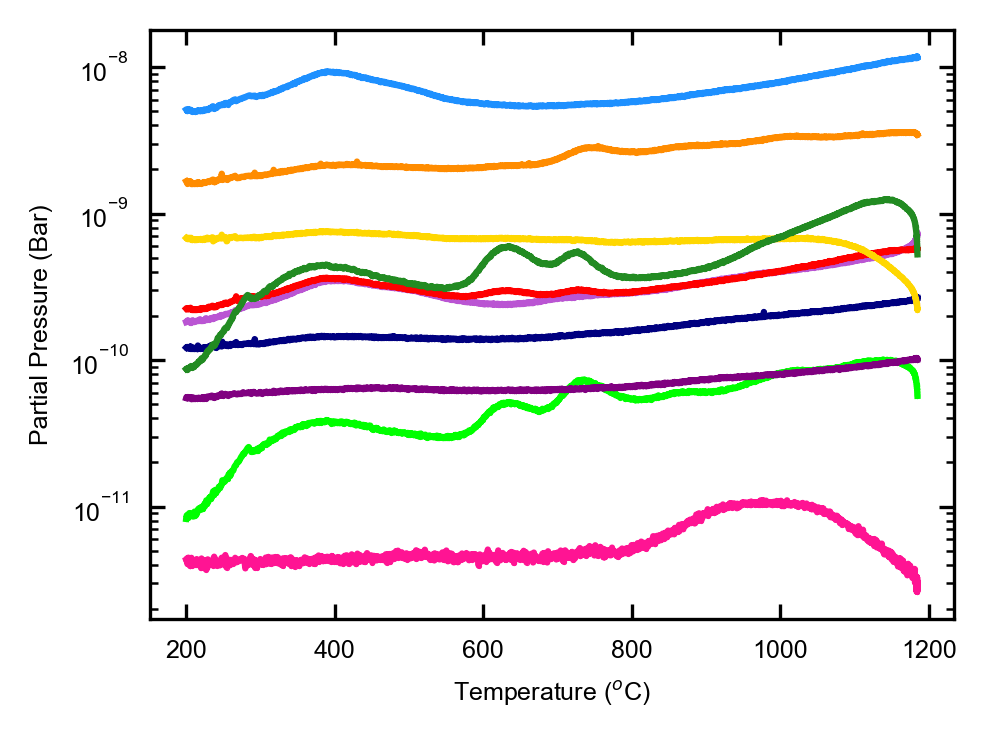

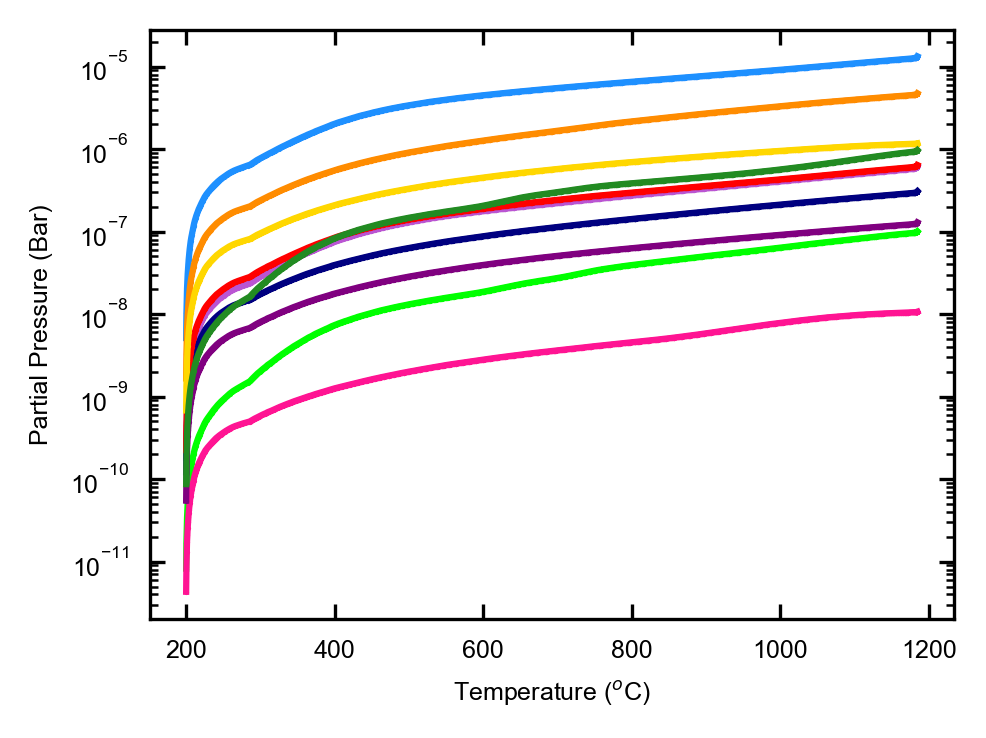

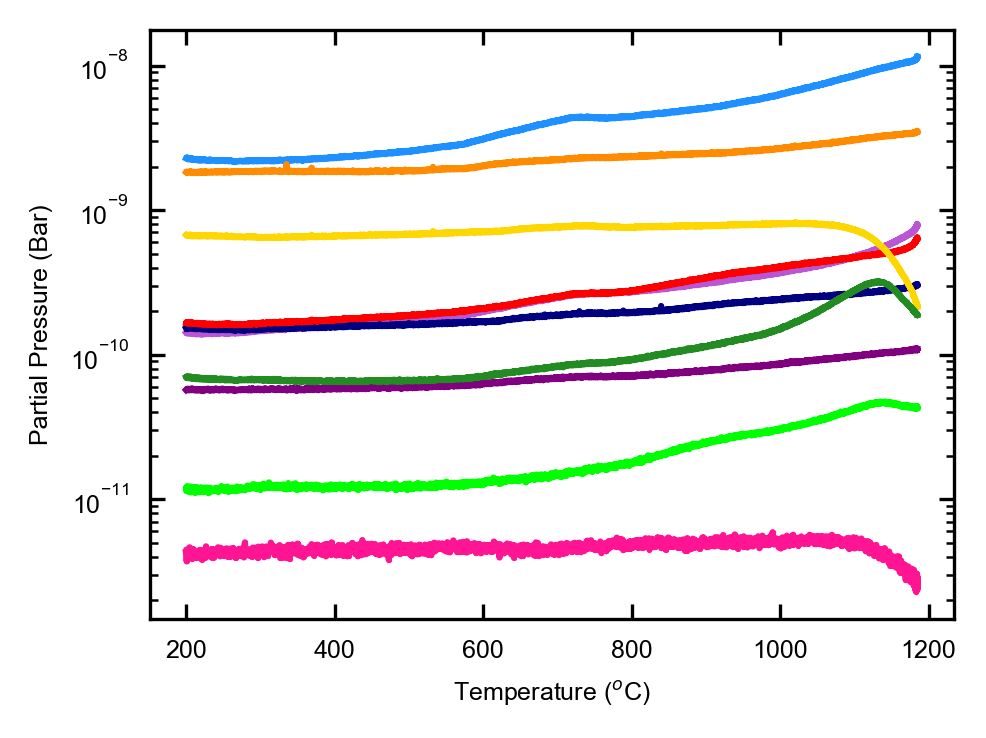

In [10]:
plotpretty_bar(M_rawHeat, 'T_interp_C', 'Temperature ($^o$C)', 'Murchison Continuous Heating Raw', 'MurchisonHeatingRaw.jpg')
plotpretty_bar(M_rawHeatcum, 'T_interp_C', 'Temperature ($^o$C)', 'Cumulative Murchison Continuous Heating Raw', 'MurchisonHeatingRawCum.jpg')
plotpretty_bar(B_rawHeat, 'T_interp_C', 'Temperature ($^o$C)', 'Background Continuous Heating Raw', 'BackgroundHeatingRaw.jpg')



## Partial Pressures
Ion-Fragment Corrected, Atmospheric Adsorption Corrected, and Background Subtracted

In [344]:
#Function that interpolates the background data onto the same temperature grid as the sample data.
def interpolate_only(file, background, interp_val):
    background_file_H2interp = np.interp(file[interp_val], background[interp_val], background.H2)
    background_file_Cinterp = np.interp(file[interp_val], background[interp_val], background.C)
    background_file_Ninterp = np.interp(file[interp_val], background[interp_val], background.N)
    background_file_CH4interp = np.interp(file[interp_val], background[interp_val], background.CH4)
    background_file_H2Ointerp = np.interp(file[interp_val], background[interp_val], background.H2O)
    background_file_N2_COinterp = np.interp(file[interp_val], background[interp_val], background.N2_CO)
    background_file_S_O2interp = np.interp(file[interp_val], background[interp_val], background.S_O2)
    background_file_H2Sinterp = np.interp(file[interp_val], background[interp_val], background.H2S)
    background_file_KH_NaOHinterp = np.interp(file[interp_val], background[interp_val], background.KH_NaOH)
    background_file_CO2interp = np.interp(file[interp_val], background[interp_val], background.CO2)
    d = {'T_interp_C': file.T_interp_C, 'T_interp_K': file.T_interp_K, 'Time':file.Time, 'H2': background_file_H2interp, 'C': background_file_Cinterp, 'N': background_file_Ninterp, 'CH4': background_file_CH4interp, 'H2O': background_file_H2Ointerp, 'N2_CO': background_file_N2_COinterp, 'S_O2':background_file_S_O2interp, 'H2S':  background_file_H2Sinterp, 'KH_NaOH': background_file_KH_NaOHinterp, 'CO2':background_file_CO2interp}
    partial_df = pd.DataFrame(data=d)
    return partial_df

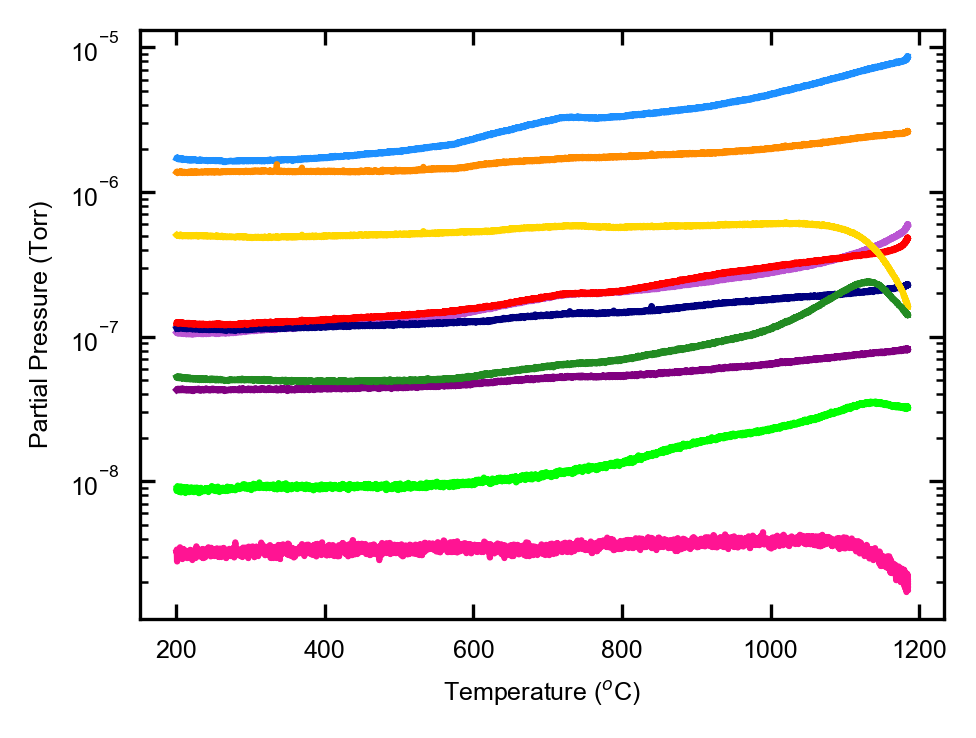

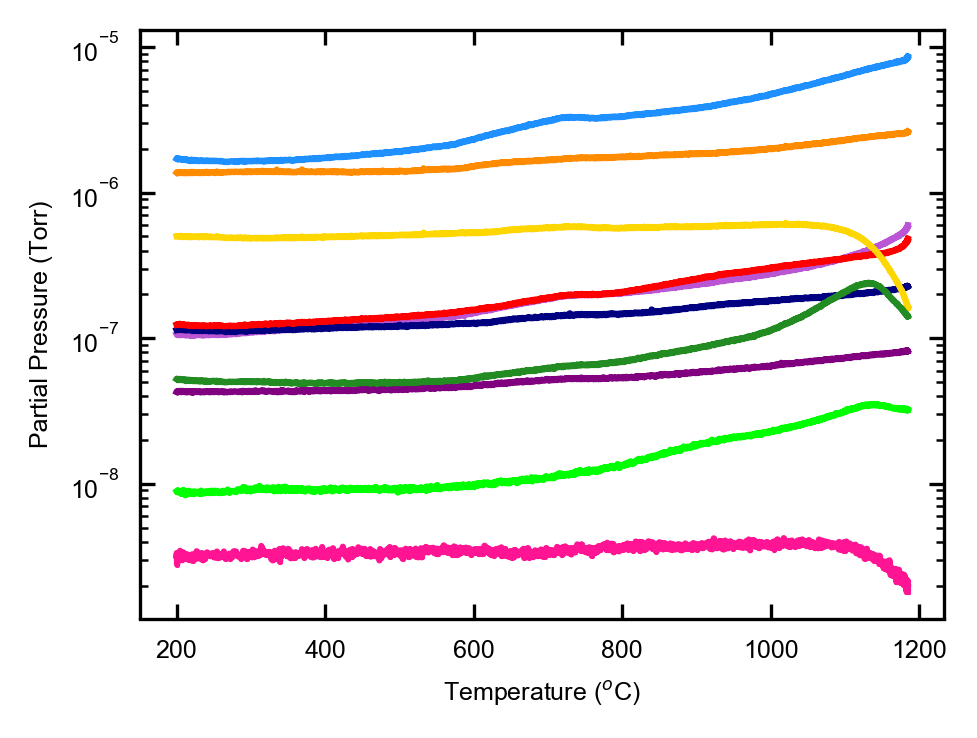

In [356]:
B_interponly = interpolate_only(M_rawHeat, B_rawHeat, 'T_interp_C')

plotpretty(B_rawHeat, 'T_interp_C', 'Temperature ($^o$C)', 'Background Continuous Heating Raw', 'BackgroundHeatingRaw.jpg')
plotpretty(B_interponly, 'T_interp_C', 'Temperature ($^o$C)', 'Background Continuous Heating Raw Interp', 'BackgroundInterpHeatingRaw.jpg')


##### Step 1: Correct for Ion Fragments and Atmospheric Adsorption 

#### Algebraic Method

In [6]:
#Correcting for Ion Fragments
def partialP_correctupdate(file):
    H2P_1 = file.H2
    H2P_1 = H2P_1.clip(lower=0)
    CP_1 = file.C
    CP_1 = CP_1.clip(lower=0)
    NP_1 = file.N 
    NP_1 = NP_1.clip(lower=0)
    #print(NP_1)
    CH4P_1 = file.CH4
    CH4P_1 = CH4P_1.clip(lower=0)
    
    H2OP = 1.04*file.H2O
    H2OP = H2OP.clip(lower=0)
    KH_NaOHP_1 = (file.KH_NaOH)
    KH_NaOHP_1 = KH_NaOHP_1.clip(lower=0)
    KH_NaOHP = KH_NaOHP_1 - KH_NaOHP_1 #assumes all of 40 amu signal is due to atmospheric Ar
    KH_NaOHP = KH_NaOHP.clip(lower=0)
    
    N2_COP_1 = (file.N2_CO)
    N2_COP_1 = N2_COP_1.clip(lower=0)
    
    S_O2P_1 = (file.S_O2) 
    S_O2P_1 = S_O2P_1.clip(lower=0)
    S_O2P = (1.22*S_O2P_1) - (22.53*KH_NaOHP_1)
    S_O2P = S_O2P.clip(lower=0)
    H2SP = 1.45*file.H2S 
    H2SP = H2SP.clip(lower=0)
    CO2P = 1.29*file.CO2
    CO2P = CO2P.clip(lower=0)
    
    H2P = H2P_1 - (0.02*H2OP)
    H2P = H2P.clip(lower=0)
    CH4P = (1.25*CH4P_1) - (0.10*CO2P) - (0.02*H2OP) - (0.22*22.53*KH_NaOHP_1)
    CH4P = CH4P.clip(lower=0)
    NP_2 = NP_1 - (0.21*CH4P) 
    NP_2 = NP_2.clip(lower=0)
    N2P_1 = 1.14*(NP_2/0.14)
    N2P_1 = N2P_1.clip(lower=0)
    NP = NP_2 - (0.14*N2P_1) - (0.14*83.96*KH_NaOHP_1)
    NP=NP.clip(lower=0)
    N2P = N2P_1 - (83.96*KH_NaOHP_1)
    N2P=N2P.clip(lower=0)
    COP = (1.07*(N2_COP_1 - N2P_1)) - (0.10*CO2P)
    COP=COP.clip(lower=0)
    CP = CP_1 - (0.09*CO2P) - (0.05*COP)-(0.04*CH4P)
    CP=CP.clip(lower=0)
    totalP = H2P + H2OP + NP + N2P + COP + CP + CH4P + S_O2P + H2SP + KH_NaOHP + CO2P
        
    d = {'T_interp_C': file.T_interp_C, 'T_interp_K': file.T_interp_K, 'Time':file.Time, 'TotalP': totalP, 'H2': H2P, 'C': CP, 'N': NP, 'CH4': CH4P, 'H2O': H2OP, 'N2': N2P, 'CO': COP, 'S_O2': S_O2P, 'H2S': H2SP, 'KH_NaOH': KH_NaOHP, 'CO2': CO2P}
    partial_df = pd.DataFrame(data=d)
    return partial_df



In [7]:
#The only difference between partialP_correctupdateV2 and partialP_correctupdate is that V2 disentangles O2 and S:
def partialP_correctupdate_V2(file):
    
    H2P_1 = file.H2 
    H2P_1 = H2P_1.clip(lower=0)
    CP_1 = file.C 
    CP_1 = CP_1.clip(lower=0)
    NP_1 = file.N 
    NP_1 = NP_1.clip(lower=0)
    #print(NP_1)
    CH4P_1 = file.CH4 
    CH4P_1 = CH4P_1.clip(lower=0)
    
    H2OP = 1.04*file.H2O 
    H2OP = H2OP.clip(lower=0)
    KH_NaOHP_1 = (file.KH_NaOH)
    KH_NaOHP_1 = KH_NaOHP_1.clip(lower=0)
    KH_NaOHP = KH_NaOHP_1 - KH_NaOHP_1 #assumes all of 40 amu signal is due to atmospheric Ar
    KH_NaOHP = KH_NaOHP.clip(lower=0)
    
    N2_COP_1 = file.N2_CO 
    N2_COP_1 = N2_COP_1.clip(lower=0)
    
    S_O2P = file.S_O2
    S_O2P = S_O2P.clip(lower=0)
    H2SP = 1.45*file.H2S 
    H2SP = H2SP.clip(lower=0)
    CO2P = 1.29*file.CO2
    CO2P = CO2P.clip(lower=0)
    
    H2P = H2P_1 - (0.02*H2OP)
    H2P = H2P.clip(lower=0)
    CH4P_2 = (1.25*CH4P_1) - (0.10*CO2P) - (0.02*H2OP)
    CH4P_2 = CH4P_2.clip(lower=0)
    O2P_1 = 1.22*(CH4P_2/0.22) 
    O2P_1 = O2P_1.clip(lower=0)
    CH4P = CH4P_2 - (0.22*O2P_1) - (0.22*22.53*KH_NaOHP_1)
    CH4P = CH4P.clip(lower=0)
    O2P = O2P_1 - (22.527*KH_NaOHP_1)
    O2P = O2P.clip(lower=0)
    SP = (S_O2P - O2P_1) -(0.45*H2SP)
    SP = SP.clip(lower=0)
    
    NP_2 = NP_1 - (0.21*CH4P)
    NP_2 = NP_2.clip(lower=0)
    N2P_1 = 1.14*(NP_2/0.14)
    N2P_1 = N2P_1.clip(lower=0)
    NP = NP_2 - (0.14*N2P_1) - (0.14*83.96*KH_NaOHP_1)
    NP = NP.clip(lower=0)
    N2P = N2P_1 - (83.96*KH_NaOHP_1)
    N2P = N2P.clip(lower=0)
    COP = (1.07*(N2_COP_1 - N2P_1)) - (0.10*CO2P)
    COP = COP.clip(lower=0)
    CP = CP_1 - (0.09*CO2P) - (0.05*COP)-(0.04*CH4P)
    CP = CP.clip(lower=0)
    totalP = H2P + H2OP + NP + N2P + COP + CP + CH4P + SP + O2P + H2SP + KH_NaOHP + CO2P
        
    d = {'T_interp_C': file.T_interp_C, 'T_interp_K': file.T_interp_K, 'Time':file.Time, 'TotalP': totalP, 'H2': H2P, 'C': CP, 'N': NP, 'CH4': CH4P, 'H2O': H2OP, 'N2': N2P, 'CO': COP, 'S': SP, 'O2': O2P, 'H2S': H2SP, 'KH_NaOH': KH_NaOHP, 'CO2': CO2P}
    partial_df = pd.DataFrame(data=d)
    return partial_df

In [8]:
B_partialP_update = partialP_correctupdate(B_rawHeat)
M_partialP_update = partialP_correctupdate(M_rawHeat)
W1_partialP_update = partialP_correctupdate(W1_rawHeat)
W2_partialP_update = partialP_correctupdate(W2_rawHeat)
AZ_partialP_update = partialP_correctupdate(AZ_rawHeat)

M_partialP_update.to_csv('SupplementFig2_C.csv')
B_partialP_update.to_csv('SupplementFig2_D.csv')

#Disentangling S and O2:
B_partialP_update2 = partialP_correctupdate_V2(B_rawHeat)
M_partialP_update2 = partialP_correctupdate_V2(M_rawHeat)
W1_partialP_update2 = partialP_correctupdate_V2(W1_rawHeat)
W2_partialP_update2 = partialP_correctupdate_V2(W2_rawHeat)
AZ_partialP_update2 = partialP_correctupdate_V2(AZ_rawHeat)


In [9]:

print('H2', np.mean(M_partialP_update['H2'])*TorrtoBar)
print('C', np.mean(M_partialP_update['C'])*TorrtoBar)
print('N', np.mean(M_partialP_update['N'])*TorrtoBar)
print('CH4', np.mean(M_partialP_update['CH4'])*TorrtoBar)
print('H2O', np.mean(M_partialP_update['H2O'])*TorrtoBar)
print('N2', np.mean(M_partialP_update['N2'])*TorrtoBar)
print('CO', np.mean(M_partialP_update['CO'])*TorrtoBar)
print('S_O2', np.mean(M_partialP_update['S_O2'])*TorrtoBar)
print('H2S', np.mean(M_partialP_update['H2S'])*TorrtoBar)
print('CO2', np.mean(M_partialP_update['CO2'])*TorrtoBar)


print('Average Background Pressures:')
print(np.mean(B_partialP_update)*TorrtoBar)
print('Average Sample Pressure:')
print(np.mean(M_partialP_update)*TorrtoBar)

H2 1.881371840216176e-10
C 0.0
N 0.0
CH4 0.0
H2O 7.615103202141796e-09
N2 0.0
CO 1.2394700053912818e-09
S_O2 0.0
H2S 8.543505836126338e-12
CO2 6.90632593780843e-10
Average Background Pressures:
T_interp_C    9.743774e-01
T_interp_K    1.338547e+00
Time          1.369469e+01
TotalP        6.073396e-09
H2            1.945618e-10
C             0.000000e+00
N             0.000000e+00
CH4           7.633074e-15
H2O           4.973573e-09
N2            0.000000e+00
CO            7.457103e-10
S_O2          0.000000e+00
H2S           6.663175e-12
KH_NaOH       0.000000e+00
CO2           1.528805e-10
dtype: float64
Average Sample Pressure:
T_interp_C    9.765826e-01
T_interp_K    1.340753e+00
Time          1.449214e+01
TotalP        9.741886e-09
H2            1.881372e-10
C             0.000000e+00
N             0.000000e+00
CH4           0.000000e+00
H2O           7.615103e-09
N2            0.000000e+00
CO            1.239470e-09
S_O2          0.000000e+00
H2S           8.543506e-12
KH_NaOH   

#### Least Squares Method

In [10]:
from scipy.optimize import least_squares

#Known Data:
P_data_M = np.array([M_rawHeat.H2, M_rawHeat.C, M_rawHeat.N, M_rawHeat.CH4, M_rawHeat.H2O, M_rawHeat.N2_CO, M_rawHeat.S_O2, M_rawHeat.H2S, M_rawHeat.KH_NaOH, M_rawHeat.CO2])
P_data_B = np.array([B_rawHeat.H2, B_rawHeat.C, B_rawHeat.N, B_rawHeat.CH4, B_rawHeat.H2O, B_rawHeat.N2_CO, B_rawHeat.S_O2, B_rawHeat.H2S, B_rawHeat.KH_NaOH, B_rawHeat.CO2])
P_data_W1 = np.array([W1_rawHeat.H2, W1_rawHeat.C, W1_rawHeat.N, W1_rawHeat.CH4, W1_rawHeat.H2O, W1_rawHeat.N2_CO, W1_rawHeat.S_O2, W1_rawHeat.H2S, W1_rawHeat.KH_NaOH, W1_rawHeat.CO2])
P_data_W2 = np.array([W2_rawHeat.H2, W2_rawHeat.C, W2_rawHeat.N, W2_rawHeat.CH4, W2_rawHeat.H2O, W2_rawHeat.N2_CO, W2_rawHeat.S_O2, W2_rawHeat.H2S, W2_rawHeat.KH_NaOH, W2_rawHeat.CO2])
P_data_AZ = np.array([AZ_rawHeat.H2, AZ_rawHeat.C, AZ_rawHeat.N, AZ_rawHeat.CH4, AZ_rawHeat.H2O, AZ_rawHeat.N2_CO, AZ_rawHeat.S_O2, AZ_rawHeat.H2S, AZ_rawHeat.KH_NaOH, AZ_rawHeat.CO2])


#Mass spectrum library (fragments re-normalized from NIST):
def MassSpecLibrary(P_species, P_dat):
    meas2 = P_dat[0] 
    meas12 = P_dat[1]
    meas14 = P_dat[2]
    meas16 = P_dat[3]
    meas18 = P_dat[4]
    meas28 = P_dat[5]
    meas32 = P_dat[6]
    meas34 = P_dat[7]
    meas40 = P_dat[8]
    meas44 = P_dat[9]
    
    H2 = P_species[0]
    C = P_species[1]
    N = P_species[2]
    CH4 = P_species[3]
    O = P_species[4]
    H2O = P_species[5]
    N2 = P_species[6]
    CO = P_species[7]
    S = P_species[8]
    O2 = P_species[9]
    H2S = P_species[10]
    Ar = P_species[11]
    CO2 = P_species[12]
    
    resid_2 = meas2 - (1.0*H2) - (0.0193*H2O)
    resid_12 = meas12 - (1.0*C) - (0.03448*CH4) - (0.04842*CO) - (0.06905*CO2)
    resid_14 = meas14 - (1.0*N) - (0.1228*N2) - (0.1656*CH4)
    resid_16 = meas16 - (0.7999*CH4) - (1.0*O) - (0.01449*H2O) - (0.02048*CO) - (0.1803*O2) - (0.07603*CO2)
    resid_18 = meas18 - (0.9662*H2O)
    resid_28 = meas28 - (0.9311*CO) - (0.8772*N2) - (0.07913*CO2)
    resid_32 = meas32 - (0.8197*O2) - (1.0*S) - (0.3103*H2S)
    resid_34 = meas34 - (0.6897*H2S)
    resid_40 = meas40 - (1.0*Ar)
    resid_44 = meas44 - (0.7758*CO2)
    Sum = np.sum(P_species) - np.sum(P_dat)
    return np.array([resid_2, resid_12, resid_14, resid_16, resid_18, resid_28, resid_32, resid_34, resid_40, resid_44, Sum])


ys = np.array([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0])



In [11]:
def regress(file, init_file):
    arr=[]
    for i in range(file['H2'].size):
        P_data = init_file[:,i]
        P_gi = np.array([P_data[0], 0.0, 0.0, P_data[3], 0.0, P_data[4], P_data[5], P_data[5], P_data[6], P_data[6], P_data[7], P_data[8], P_data[9]])
        bounds_arr = ([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [2*np.max(file.H2), 2*np.max(file.C), 2*np.max(file.N), 2*np.max(file.CH4), 2*np.max(file.CH4), 2*np.max(file.H2O), 2*np.max(file.N2_CO), 2*np.max(file.N2_CO), 2*np.max(file.S_O2), 2*np.max(file.S_O2), 2*np.max(file.H2S), 2*np.max(file.KH_NaOH), 2*np.max(file.CO2)]) 
        def fun(P_species):
            return((MassSpecLibrary(P_species, P_data) - ys).flatten())
        #print('Initial Guess', P_gi)
        res = least_squares(fun, P_gi, bounds=bounds_arr)
        arr.append(res.x)
    DF = pd.DataFrame(data=arr, columns=['H2', 'C', 'N', 'CH4', 'O', 'H2O', 'N2', 'CO', 'S', 'O2', 'H2S', 'Ar', 'CO2'])
    DF.N2 = DF.N2 - (83.96*DF.Ar)
    DF.N2 = DF['N2'].clip(lower=0)
    DF.O2 = DF.O2 - (22.53*DF.Ar)
    DF.O2 = DF['O2'].clip(lower=0)
    DF.O = DF.O - (0.22*22.53*DF.Ar)
    DF.O = DF['O'].clip(lower=0)
    DF.N = DF.N - (0.14*83.96*DF.Ar)
    DF.N = DF['N'].clip(lower=0)
    DF['T_interp_C'] = file.T_interp_C
    DF['T_interp_K'] = file.T_interp_K
    return DF


In [12]:
B_DF = regress(B_rawHeat, P_data_B)
M_DF = regress(M_rawHeat, P_data_M)
W1_DF = regress(W1_rawHeat, P_data_W1)
W2_DF = regress(W2_rawHeat, P_data_W2)
AZ_DF = regress(AZ_rawHeat, P_data_AZ)

#### Plot

In [18]:
def plotpretty_partialP_scatterlsq(file, xaxis, xlabel, title, title2):
    fig, ax = plt.subplots()
    plt.scatter(file[xaxis], file.H2*TorrtoBar, marker='.', s=0.5, color='mediumorchid', label=r'H$_2$')
    plt.scatter(file[xaxis], file.C*TorrtoBar, marker='.', s=0.5, color='lime', label=r'C')
    plt.scatter(file[xaxis], file.N*TorrtoBar, marker='.', s=0.5, color='navy', label=r'N')
    plt.scatter(file[xaxis], file.N2*TorrtoBar, marker='.', s=0.5, color='magenta', label=r'N$_2$')
    plt.scatter(file[xaxis], file.CH4*TorrtoBar, marker='.', s=0.5, color='red', label=r'CH$_4$')
    plt.scatter(file[xaxis], file.O*TorrtoBar, marker='.', s=0.5, color='yellow', label=r'O')
    plt.scatter(file[xaxis], file.H2O*TorrtoBar, marker='.', s=0.5, color='dodgerblue', label=r'H$_2$O')
    plt.scatter(file[xaxis], file.CO*TorrtoBar, marker='.', s=0.5, color='darkorange', label=r'CO')
    plt.scatter(file[xaxis], file.S*TorrtoBar, marker='.', s=0.5, color='gold', label=r'S')
    plt.scatter(file[xaxis], file.O2*TorrtoBar, marker='.', s=0.5, color='gray', label=r'O$_2$')
    plt.scatter(file[xaxis], file.H2S*TorrtoBar, marker='.', s=0.5, color='deeppink', label=r'H$_2$S')
    #plt.scatter(file[xaxis], file.Ar, marker='o', s=2, color='purple', label=r'Ar')
    plt.scatter(file[xaxis], file.CO2*TorrtoBar, marker='.', s=0.5, color='forestgreen', label=r'CO$_2$')
    ax.tick_params(which='both', top=True, right=True)
    plt.yscale('log')
    plt.ylim(1E-13, 2E-8)
    plt.xlabel(xlabel)
    plt.ylabel(r'Partial Pressure (Bar)')
    plt.title(title)
    #plt.legend(fontsize='small', loc=4)
    plt.savefig(title2, dpi=1000)
    plt.show()
    
def plotpretty_partialP_og(file, xaxis, xlabel, title, title2):
    fig, ax = plt.subplots()
    plt.plot(file[xaxis], file.H2*TorrtoBar, marker='.', markersize=0.1, color='mediumorchid', label=r'H$_2$')
    plt.plot(file[xaxis], file.C*TorrtoBar, marker='.', markersize=0.1, color='lime', label=r'C')
    plt.plot(file[xaxis], file.N*TorrtoBar, marker='.', markersize=0.1, color='navy', label=r'N')
    plt.plot(file[xaxis], file.N2*TorrtoBar, marker='.', markersize=0.1, color='magenta', label=r'N$_2$')
    plt.plot(file[xaxis], file.CH4*TorrtoBar, marker='.', markersize=0.1, color='red', label=r'CH$_4$')
    plt.plot(file[xaxis], file.H2O*TorrtoBar, marker='.', markersize=0.1, color='dodgerblue', label=r'H$_2$O')
    plt.plot(file[xaxis], file.CO*TorrtoBar, marker='.', markersize=0.1, color='darkorange', label=r'CO')
    #plt.plot(file[xaxis], file.S, marker='o', markersize=1, color='goldenrod', label=r'S')
    plt.plot(file[xaxis], file.S_O2*TorrtoBar, marker='.', markersize=0.1, color='gold', label=r'S/O$_2$')
    plt.plot(file[xaxis], file.H2S*TorrtoBar, marker='.', markersize=0.1, color='deeppink', label=r'H$_2$S')
    plt.plot(file[xaxis], file.KH_NaOH*TorrtoBar, marker='.', markersize=0.1, color='purple', label=r'KH or NaOH')
    plt.plot(file[xaxis], file.CO2*TorrtoBar, marker='.', markersize=0.1, color='forestgreen', label=r'CO$_2$')
    ax.tick_params(which='both', top=True, right=True)
    plt.yscale('log')
    plt.ylim(1E-13, 2E-8)
    plt.xlabel(xlabel)
    plt.ylabel(r'Partial Pressure (Bar)')
    plt.title(title)
    #plt.legend(fontsize='small', loc=4)
    plt.savefig(title2, dpi=1000)
    plt.show()
    
def plotpretty_partialP_ogscatter(file, xaxis, xlabel, title, title2):
    fig, ax = plt.subplots()
    plt.scatter(file[xaxis], file.H2*TorrtoBar, s=0.1, color='mediumorchid', label=r'H$_2$')
    plt.scatter(file[xaxis], file.C*TorrtoBar, s=0.1, color='lime', label=r'C')
    plt.scatter(file[xaxis], file.N*TorrtoBar, s=0.1, color='navy', label=r'N')
    plt.scatter(file[xaxis], file.N2*TorrtoBar, s=0.1, color='magenta', label=r'N$_2$')
    plt.scatter(file[xaxis], file.CH4*TorrtoBar, s=0.1, color='red', label=r'CH$_4$')
    plt.scatter(file[xaxis], file.H2O*TorrtoBar, s=0.1, color='dodgerblue', label=r'H$_2$O')
    plt.scatter(file[xaxis], file.CO*TorrtoBar, s=0.1, color='darkorange', label=r'CO')
    #plt.plot(file[xaxis], file.S, marker='o', markersize=1, color='goldenrod', label=r'S')
    plt.scatter(file[xaxis], file.S_O2*TorrtoBar, s=0.1, color='gold', label=r'S/O$_2$')
    plt.scatter(file[xaxis], file.H2S*TorrtoBar, s=0.1, color='deeppink', label=r'H$_2$S')
    plt.scatter(file[xaxis], file.KH_NaOH*TorrtoBar, s=0.1, color='purple', label=r'KH or NaOH')
    plt.scatter(file[xaxis], file.CO2*TorrtoBar, s=0.1, color='forestgreen', label=r'CO$_2$')
    ax.tick_params(which='both', top=True, right=True)
    plt.yscale('log')
    plt.ylim(1E-13, 2E-8)
    plt.xlabel(xlabel)
    plt.ylabel(r'Partial Pressure (Bar)')
    plt.title(title)
    #plt.legend(fontsize='small', loc=4)
    plt.savefig(title2, dpi=1000)
    plt.show()

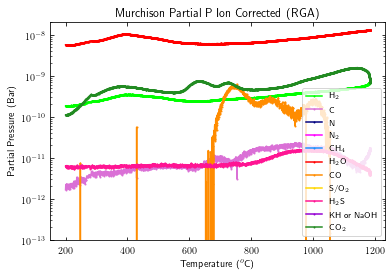

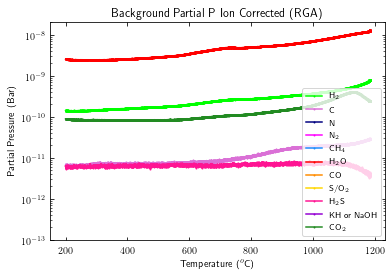

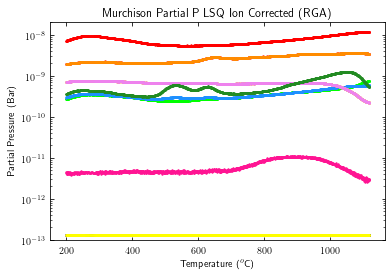

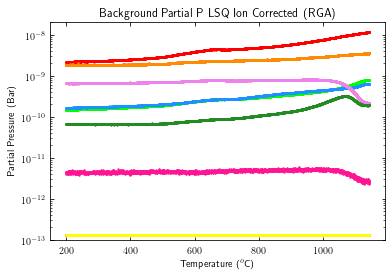

In [19]:
plotpretty_partialP_og(M_partialP_rga, 'T_interp_C', 'Temperature ($^o$C)', 'Murchison Partial P Ion Corrected (RGA)', 'Murchison_partialP_ioncorrect_rga.jpg')
plotpretty_partialP_og(B_partialP_rga, 'T_interp_C', 'Temperature ($^o$C)', 'Background Partial P Ion Corrected (RGA)', 'Background_partialP_ioncorrect_rga.jpg')

plotpretty_partialP_scatterlsq(M_DF_rga, 'T_interp_C', 'Temperature ($^o$C)', 'Murchison Partial P LSQ Ion Corrected (RGA)', 'Murchison_partialP_ioncorrect_lsqrga.jpg')
plotpretty_partialP_scatterlsq(B_DF_rga, 'T_interp_C', 'Temperature ($^o$C)', 'Background Partial P LSQ Ion Corrected (RGA)', 'Background_partialP_ioncorrect_lsqrga.jpg')



### Background Subtraction

In [13]:
def partialP_backsub(file, background, interp_val):
    background_file_H2interp = np.interp(file[interp_val], background[interp_val], background.H2)
    background_file_Cinterp = np.interp(file[interp_val], background[interp_val], background.C)
    background_file_Ninterp = np.interp(file[interp_val], background[interp_val], background.N)
    background_file_CH4interp = np.interp(file[interp_val], background[interp_val], background.CH4)
    background_file_H2Ointerp = np.interp(file[interp_val], background[interp_val], background.H2O)
    background_file_N2interp = np.interp(file[interp_val], background[interp_val], background.N2)
    background_file_COinterp = np.interp(file[interp_val], background[interp_val], background.CO)
    background_file_S_O2interp = np.interp(file[interp_val], background[interp_val], background.S_O2)
    background_file_H2Sinterp = np.interp(file[interp_val], background[interp_val], background.H2S)
    background_file_KH_NaOHinterp = np.interp(file[interp_val], background[interp_val], background.KH_NaOH)
    background_file_CO2interp = np.interp(file[interp_val], background[interp_val], background.CO2)
    
    H2P = file.H2 - background_file_H2interp
    H2P = H2P.clip(lower=0)
    CP = file.C - background_file_Cinterp
    CP = CP.clip(lower=0)
    NP = file.N - background_file_Ninterp
    NP = NP.clip(lower=0)
    CH4P = file.CH4 - background_file_CH4interp
    CH4P = CH4P.clip(lower=0)
    
    H2OP = file.H2O - background_file_H2Ointerp
    H2OP = H2OP.clip(lower=0)
    KH_NaOHP = (file.KH_NaOH - background_file_KH_NaOHinterp)
    KH_NaOHP = KH_NaOHP.clip(lower=0)
    KH_NaOHP = KH_NaOHP - KH_NaOHP #assumes all of 40 amu signal is due to atmospheric Ar
    KH_NaOHP = KH_NaOHP.clip(lower=0)
    
    S_O2P = file.S_O2 - background_file_S_O2interp
    S_O2P=S_O2P.clip(lower=0)
    H2SP = file.H2S - background_file_H2Sinterp
    H2SP=H2SP.clip(lower=0)
    CO2P = file.CO2 - background_file_CO2interp
    CO2P=CO2P.clip(lower=0)
    
    N2P = file.N2 - background_file_N2interp
    N2P=N2P.clip(lower=0)
    COP = file.CO - background_file_COinterp
    COP=COP.clip(lower=0)
    totalP = H2P + H2OP + NP + N2P + COP + CP + CH4P + S_O2P + H2SP + KH_NaOHP + CO2P

    d = {'T_interp_C': file.T_interp_C, 'T_interp_K': file.T_interp_K, 'Time':file.Time, 'TotalP': totalP, 'H2': H2P, 'C': CP, 'N': NP, 'CH4': CH4P, 'H2O': H2OP, 'N2': N2P, 'CO': COP, 'S_O2': S_O2P, 'H2S': H2SP, 'KH_NaOH': KH_NaOHP, 'CO2': CO2P}
    partial_df = pd.DataFrame(data=d)
    return partial_df

def partialP_backsub_lsq(file, background, interp_val):
    background_file_H2interp = np.interp(file[interp_val], background[interp_val], background.H2)
    background_file_Cinterp = np.interp(file[interp_val], background[interp_val], background.C)
    background_file_Ninterp = np.interp(file[interp_val], background[interp_val], background.N)
    background_file_CH4interp = np.interp(file[interp_val], background[interp_val], background.CH4)
    background_file_Ointerp = np.interp(file[interp_val], background[interp_val], background.O)
    background_file_H2Ointerp = np.interp(file[interp_val], background[interp_val], background.H2O)
    background_file_N2interp = np.interp(file[interp_val], background[interp_val], background.N2)
    background_file_COinterp = np.interp(file[interp_val], background[interp_val], background.CO)
    background_file_Sinterp = np.interp(file[interp_val], background[interp_val], background.S)
    background_file_O2interp = np.interp(file[interp_val], background[interp_val], background.O2)
    background_file_H2Sinterp = np.interp(file[interp_val], background[interp_val], background.H2S)
    background_file_Arinterp = np.interp(file[interp_val], background[interp_val], background.Ar)
    background_file_CO2interp = np.interp(file[interp_val], background[interp_val], background.CO2)
    
    H2P = file.H2 - background_file_H2interp
    H2P = H2P.clip(lower=0)
    CP = file.C - background_file_Cinterp
    CP = CP.clip(lower=0)
    NP = file.N - background_file_Ninterp
    NP = NP.clip(lower=0)
    CH4P = file.CH4 - background_file_CH4interp
    CH4P = CH4P.clip(lower=0)
    OP = file.O - background_file_Ointerp
    OP = OP.clip(lower=0)
    
    H2OP = file.H2O - background_file_H2Ointerp
    H2OP = H2OP.clip(lower=0)
    ArP = (file.Ar - background_file_Arinterp)
    ArP = ArP.clip(lower=0)
    ArP = ArP - ArP #assumes all of 40 amu signal is due to atmospheric Ar
    ArP = ArP.clip(lower=0)
    
    SP = file.S - background_file_Sinterp
    SP=SP.clip(lower=0)
    O2P = file.O2 - background_file_O2interp
    O2P = O2P.clip(lower=0)
    H2SP = file.H2S - background_file_H2Sinterp
    H2SP=H2SP.clip(lower=0)
    CO2P = file.CO2 - background_file_CO2interp
    CO2P=CO2P.clip(lower=0)
    
    N2P = file.N2 - background_file_N2interp
    N2P=N2P.clip(lower=0)
    COP = file.CO - background_file_COinterp
    COP=COP.clip(lower=0)
    totalP = H2P + H2OP + NP + N2P + COP + CP + CH4P + OP + SP + O2P + H2SP + ArP + CO2P
        
    d = {'T_interp_C': file.T_interp_C, 'T_interp_K':file.T_interp_K, 'TotalP': totalP, 'H2': H2P, 'C': CP, 'N': NP, 'CH4': CH4P, 'O': OP, 'H2O': H2OP, 'N2': N2P, 'CO': COP, 'S': SP, 'O2':O2P,  'H2S': H2SP, 'Ar': ArP, 'CO2': CO2P}
    partial_df = pd.DataFrame(data=d)
    return partial_df

def partialP_backsub_V2(file, background, interp_val):
    background_file_H2interp = np.interp(file[interp_val], background[interp_val], background.H2)
    background_file_Cinterp = np.interp(file[interp_val], background[interp_val], background.C)
    background_file_Ninterp = np.interp(file[interp_val], background[interp_val], background.N)
    background_file_CH4interp = np.interp(file[interp_val], background[interp_val], background.CH4)
    background_file_H2Ointerp = np.interp(file[interp_val], background[interp_val], background.H2O)
    background_file_N2interp = np.interp(file[interp_val], background[interp_val], background.N2)
    background_file_COinterp = np.interp(file[interp_val], background[interp_val], background.CO)
    background_file_Sinterp = np.interp(file[interp_val], background[interp_val], background.S)
    background_file_O2interp = np.interp(file[interp_val], background[interp_val], background.O2)
    background_file_H2Sinterp = np.interp(file[interp_val], background[interp_val], background.H2S)
    background_file_KH_NaOHinterp = np.interp(file[interp_val], background[interp_val], background.KH_NaOH)
    background_file_CO2interp = np.interp(file[interp_val], background[interp_val], background.CO2)
    
    H2P = file.H2 - background_file_H2interp
    H2P = H2P.clip(lower=0)
    CP = file.C - background_file_Cinterp
    CP = CP.clip(lower=0)
    NP = file.N - background_file_Ninterp
    NP = NP.clip(lower=0)
    CH4P = file.CH4 - background_file_CH4interp
    CH4P = CH4P.clip(lower=0)
    
    H2OP = file.H2O - background_file_H2Ointerp
    H2OP = H2OP.clip(lower=0)
    KH_NaOHP = (file.KH_NaOH - background_file_KH_NaOHinterp)
    KH_NaOHP = KH_NaOHP.clip(lower=0)
    KH_NaOHP = KH_NaOHP - KH_NaOHP #assumes all of 40 amu signal is due to atmospheric Ar
    KH_NaOHP = KH_NaOHP.clip(lower=0)
    
    SP = file.S - background_file_Sinterp
    SP=SP.clip(lower=0)
    O2P = file.O2 - background_file_O2interp
    O2P = O2P.clip(lower=0)
    H2SP = file.H2S - background_file_H2Sinterp
    H2SP=H2SP.clip(lower=0)
    CO2P = file.CO2 - background_file_CO2interp
    CO2P=CO2P.clip(lower=0)
    
    N2P = file.N2 - background_file_N2interp
    N2P=N2P.clip(lower=0)
    COP = file.CO - background_file_COinterp
    COP=COP.clip(lower=0)
    totalP = H2P + H2OP + NP + N2P + COP + CP + CH4P + SP + O2P + H2SP + KH_NaOHP + CO2P
        
    d = {'T_interp_C': file.T_interp_C, 'T_interp_K': file.T_interp_K, 'Time':file.Time, 'TotalP': totalP, 'H2': H2P, 'C': CP, 'N': NP, 'CH4': CH4P, 'H2O': H2OP, 'N2': N2P, 'CO': COP, 'S': SP, 'O2':O2P, 'H2S': H2SP, 'KH_NaOH': KH_NaOHP, 'CO2': CO2P}
    partial_df = pd.DataFrame(data=d)
    return partial_df

In [14]:
#Calculate ion corrected and background-subtracted data:
M_partialP_U = partialP_backsub(M_partialP_update, B_partialP_update, 'T_interp_C')
W1_partialP_U = partialP_backsub(W1_partialP_update, B_partialP_update, 'T_interp_C')
W2_partialP_U = partialP_backsub(W2_partialP_update, B_partialP_update, 'T_interp_C')
AZ_partialP_U = partialP_backsub(AZ_partialP_update, B_partialP_update, 'T_interp_C')
M_partialP_U.to_csv('Murchison_partialP_update.csv')
AZ_partialP_U.to_csv('AZ_partialP_update.csv')

M_partialP_U.to_csv('SupplementFig2_E.csv')

#Updated adding ion fragments back in, using NIST fragments (Review Round 2), disentangle S and o2:
M_partialP_U2 = partialP_backsub_V2(M_partialP_update2, B_partialP_update2, 'T_interp_C')
W1_partialP_U2 = partialP_backsub_V2(W1_partialP_update2, B_partialP_update2, 'T_interp_C')
W2_partialP_U2 = partialP_backsub_V2(W2_partialP_update2, B_partialP_update2, 'T_interp_C')
AZ_partialP_U2 = partialP_backsub_V2(AZ_partialP_update2, B_partialP_update2, 'T_interp_C')


#Least Squares:
#Using NIST Ion Fragments:
M_partialP_lsq = partialP_backsub_lsq(M_DF, B_DF, 'T_interp_C')
W1_partialP_lsq = partialP_backsub_lsq(W1_DF, B_DF, 'T_interp_C')
W2_partialP_lsq = partialP_backsub_lsq(W2_DF, B_DF, 'T_interp_C')
AZ_partialP_lsq = partialP_backsub_lsq(AZ_DF, B_DF, 'T_interp_C')

   

In [15]:
def interpolate_P(file, file_interp, interp_val):
    file_H2interp = np.interp(file[interp_val], file_interp[interp_val], file_interp.H2)
    file_Cinterp = np.interp(file[interp_val], file_interp[interp_val], file_interp.C)
    file_Ninterp = np.interp(file[interp_val], file_interp[interp_val], file_interp.N)
    file_CH4interp = np.interp(file[interp_val], file_interp[interp_val], file_interp.CH4)
    file_H2Ointerp = np.interp(file[interp_val], file_interp[interp_val], file_interp.H2O)
    file_COinterp = np.interp(file[interp_val], file_interp[interp_val], file_interp.CO)
    file_N2interp = np.interp(file[interp_val], file_interp[interp_val], file_interp.N2)
    file_S_O2interp = np.interp(file[interp_val], file_interp[interp_val], file_interp.S_O2)
    file_H2Sinterp = np.interp(file[interp_val], file_interp[interp_val], file_interp.H2S)
    file_KH_NaOHinterp = np.interp(file[interp_val], file_interp[interp_val], file_interp.KH_NaOH)
    file_CO2interp = np.interp(file[interp_val], file_interp[interp_val], file_interp.CO2)
    file_totalPinterp = np.interp(file[interp_val], file_interp[interp_val], file_interp.TotalP)
    d = {'T_interp_C': file.T_interp_C, 'T_interp_K': file.T_interp_K, 'Time':file.Time, 'TotalP': file_totalPinterp, 'H2': file_H2interp, 'C': file_Cinterp, 'N': file_Ninterp, 'CH4': file_CH4interp, 'H2O': file_H2Ointerp, 'N2': file_N2interp, 'CO': file_COinterp, 'S_O2': file_S_O2interp, 'H2S': file_H2Sinterp, 'KH_NaOH': file_KH_NaOHinterp, 'CO2': file_CO2interp}
    partial_df = pd.DataFrame(data=d)
    return partial_df

In [16]:
#NIST Fragments

W1_partialP_U_interp = interpolate_P(M_partialP_U, W1_partialP_U, 'T_interp_C')
W2_partialP_U_interp = interpolate_P(M_partialP_U, W2_partialP_U, 'T_interp_C')
W_partialP_U_interp = (W1_partialP_U_interp + W2_partialP_U_interp)/2.0

W2_partialP_U_interpW1 = interpolate_P(W1_partialP_U, W2_partialP_U, 'T_interp_C')

W_partialP_U = (W1_partialP_U + W2_partialP_U_interpW1)/2.0

AZ_partialP_U_interp = interpolate_P(M_partialP_U, AZ_partialP_U, 'T_interp_C')

W_partialP_U.to_csv('Winselwan_partialP_update.csv')



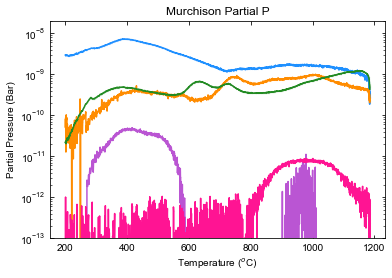

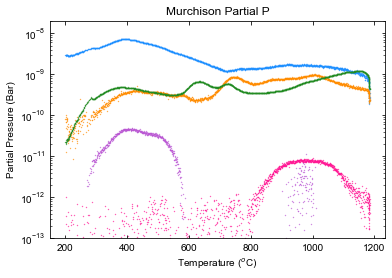

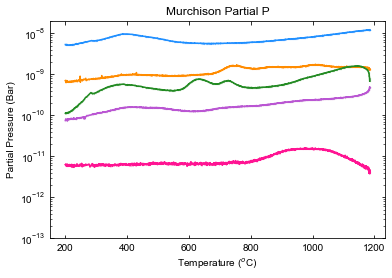

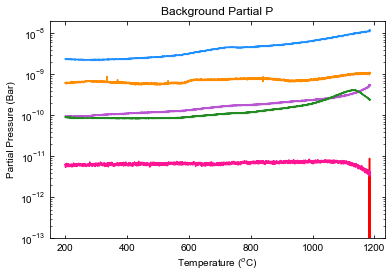

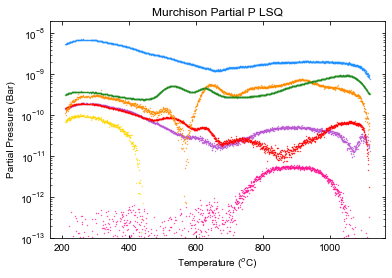

In [20]:
plotpretty_partialP_og(M_partialP_U, 'T_interp_C', 'Temperature ($^o$C)', 'Murchison Partial P', 'Murchison_partialP_ioncorrectbacksub.jpg')
plotpretty_partialP_ogscatter(M_partialP_U, 'T_interp_C', 'Temperature ($^o$C)', 'Murchison Partial P', 'Murchison_partialP_ioncorrectbacksub_scatter.jpg')

plotpretty_partialP_og(M_partialP_update, 'T_interp_C', 'Temperature ($^o$C)', 'Murchison Partial P', 'Murchison_partialP_ioncorrect.jpg')
plotpretty_partialP_og(B_partialP_update, 'T_interp_C', 'Temperature ($^o$C)', 'Background Partial P', 'Background_partialP_ioncorrect.jpg')

#plotpretty_partialP_og(M_partialP_Urga, 'T_interp_C', 'Temperature ($^o$C)', 'Murchison Partial P (RGA)', 'Murchison_partialP_ioncorrectbacksub_rga.jpg')
plotpretty_partialP_scatterlsq(M_partialP_lsq, 'T_interp_C', 'Temperature ($^o$C)', 'Murchison Partial P LSQ', 'Murchison_partialP_ioncorrectbacksub_lsq.jpg')
#plotpretty_partialP_scatterlsq(M_partialP_lsqv2, 'T_interp_C', 'Temperature ($^o$C)', 'Murchison Partial P LSQ v2', 'Murchison_partialP_ioncorrectbacksub_lsqv2.jpg')

#plotpretty_partialP_og(M_partialP_Ucheck, 'T_interp_C', 'Temperature ($^o$C)', 'Murchison Partial P', 'Murchison_partialP_ioncorrectbacksub_check.jpg')



### Total Pressure

In [21]:
#Plot Total Pressure:
def plotpretty_totalP_scatter(file1, file2, file3, file4, xaxis, xlabel, title, title2):
    fig, ax = plt.subplots()
    plt.scatter(file1[xaxis], file1.TotalP*TorrtoBar, marker='o', s=0.5, color='darkviolet', label=r'Murchison')
    plt.scatter(file2[xaxis], file2.TotalP*TorrtoBar, marker='o', s=0.5, color='dodgerblue', label=r'Winselwan Run 1')
    plt.scatter(file3[xaxis], file3.TotalP*TorrtoBar, marker='o', s=0.5, color='teal', label=r'Winselwan Run 2')
    plt.scatter(file4[xaxis], file4.TotalP*TorrtoBar, marker='o', s=0.5, color='navy', label=r'Aguas Zarcas')
    ax.tick_params(which='both', top=True, right=True)
    plt.yscale('log')
    plt.ylim(5E-10, 2E-8)
    plt.xlabel(xlabel)
    plt.ylabel(r'Total Pressure (Bar)')
    #plt.title(title)
    plt.legend(fontsize='small', loc=3)
    plt.savefig(title2, dpi=1000)
    plt.show()

In [22]:
np.savetxt('SupplementFig3_Murchison.txt', (M_partialP_U.T_interp_C, M_partialP_U.TotalP))
np.savetxt('SupplementFig3_Winselwan1.txt',(W1_partialP_U.T_interp_C, W1_partialP_U.TotalP))
np.savetxt('SupplementFig3_Winselwan2.txt', (W2_partialP_U.T_interp_C, W2_partialP_U.TotalP))
np.savetxt('SupplementFig3_AZ.txt', (AZ_partialP_U.T_interp_C, AZ_partialP_U.TotalP))

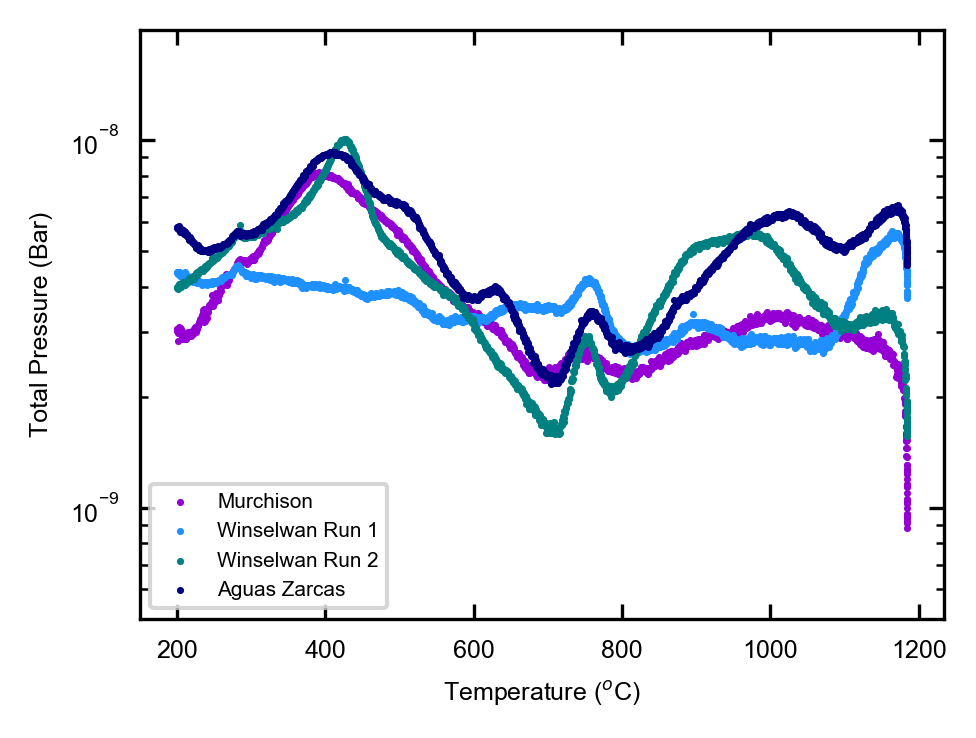

In [377]:
#plotpretty_totalP_scatter(M_partialP_lsq, W1_partialP_lsq, W2_partialP_lsq, AZ_partialP_lsq, 'T_interp_C', 'Temperature ($^o$C)', 'Total Pressure', 'TotalP_lsq.jpg')
plotpretty_totalP_scatter(M_partialP_U, W1_partialP_U, W2_partialP_U, AZ_partialP_U, 'T_interp_C', 'Temperature ($^o$C)', 'Total Pressure', 'TotalPressure.pdf')



## Mole Fractions

### Calculate

In [23]:
def molefrac(file):
    #Determine mole fractions for 10 species:
    X_H2 = file.H2/file.TotalP
    X_C = file.C/file.TotalP
    X_N = file.N/file.TotalP
    X_CH4 = file.CH4/file.TotalP
    X_H2O = file.H2O/file.TotalP
    X_N2 = file.N2/file.TotalP
    X_CO = file.CO/file.TotalP
    X_S_O2 = file.S_O2/file.TotalP
    X_H2S = file.H2S/file.TotalP
    X_NaOH = file.KH_NaOH/file.TotalP
    X_CO2 = file.CO2/file.TotalP
    
    #Total Mole Fractions for H, C, O, N, S:
    X_Htot_top = (2.0 * X_H2O) + (4.0*X_CH4) + (2.0*X_H2) + (2.0*X_H2S)
    X_Htotv2_top = (2.0 * X_H2O)  + (2.0*X_H2) + (2.0*X_H2S)
    X_Ctot_top= (X_CO2) + (X_CH4) + X_C + (X_CO)
    X_Ctotv2_top = (X_CO2) + X_C + (X_CO)
    X_Otot_top = (2.0*X_CO2) + (X_CO) + (X_H2O)  
    X_Ototv2_top = (2.0*X_CO2) + (X_CO) + (X_H2O) + (2.0*X_S_O2)
    X_Ntot_top = X_N + (2.0*X_N2)
    X_Stot_top = (X_H2S) + X_S_O2
    X_Stotv2_top = (X_H2S)
    Norm = X_Htot_top + X_Ctot_top + X_Otot_top + X_Ntot_top + X_Stot_top
    Normv2 = X_Htotv2_top + X_Ctotv2_top + X_Ototv2_top + X_Ntot_top + X_Stotv2_top
    
    X_Htot = X_Htot_top / Norm
    X_Ctot = X_Ctot_top / Norm
    X_Otot = X_Otot_top / Norm
    X_Ntot = X_Ntot_top / Norm
    X_Stot = X_Stot_top / Norm
    
    X_Htotv2 = X_Htotv2_top/ Normv2
    X_Ctotv2 = X_Ctotv2_top/ Normv2
    X_Ototv2 = X_Ototv2_top/ Normv2
    X_Ntotv2 = X_Ntot_top/Normv2
    X_Stotv2 = X_Stotv2_top / Normv2
    
    #Create DataFrame:
    d = {'T_interp_C': file.T_interp_C, 'T_interp_K': file.T_interp_K, 'Time': file.Time, 'H_tot': X_Htot, 'H_totv2': X_Htotv2, 'H2': X_H2, 'C': X_C, 'C_tot': X_Ctot, 'C_totv2': X_Ctotv2, 'N':X_N, 'N_tot': X_Ntot, 'CH4':X_CH4, 'H2O':X_H2O, 'N2': X_N2, 'CO':X_CO, 'S_O2': X_S_O2, 'H2S':X_H2S, 'NaOH': X_NaOH, 'CO2': X_CO2, 'O_tot': X_Otot, 'O_totv2': X_Ototv2, 'S_tot': X_Stot, 'S_totv2': X_Stotv2, 'N_totv2': X_Ntotv2}
    molefrac_df = pd.DataFrame(data=d)
    return molefrac_df

def molefrac_lsq(file):
    #Determine mole fractions for 10 species:
    X_H2 = file.H2/file.TotalP
    X_C = file.C/file.TotalP
    X_N = file.N/file.TotalP
    X_CH4 = file.CH4/file.TotalP
    X_O = file.O/file.TotalP
    X_H2O = file.H2O/file.TotalP
    X_N2 = file.N2/file.TotalP
    X_CO = file.CO/file.TotalP
    X_S = file.S/file.TotalP
    X_O2 = file.O2/file.TotalP
    X_H2S = file.H2S/file.TotalP
    X_Ar = file.Ar/file.TotalP
    X_CO2 = file.CO2/file.TotalP
    
    #Total Mole Fractions for H, C, O, N, S:
    X_Htot_top = (2.0 * X_H2O) + (4.0*X_CH4) + (2.0*X_H2) + (2.0*X_H2S)
    X_Htotv2_top = (2.0 * X_H2O)  + (2.0*X_H2) + (2.0*X_H2S)
    X_Ctot_top= (X_CO2) + (X_CH4) + X_C + (X_CO)
    X_Ctotv2_top = (X_CO2) + X_C + (X_CO)
    X_Otot_top = (2.0*X_CO2) + (X_CO) + (X_H2O) + (2*X_O2) + (X_O)  
    X_Ototv2_top = (2.0*X_CO2) + (X_CO) + (X_H2O) + (2.0*X_O2)
    X_Ntot_top = X_N + (2.0*X_N2)
    X_Stot_top = (X_H2S) + X_S
    X_Stotv2_top = (X_H2S)
    Norm = X_Htot_top + X_Ctot_top + X_Otot_top + X_Ntot_top + X_Stot_top
    Normv2 = X_Htotv2_top + X_Ctotv2_top + X_Ototv2_top + X_Ntot_top + X_Stotv2_top
    
    X_Htot = X_Htot_top / Norm
    X_Ctot = X_Ctot_top / Norm
    X_Otot = X_Otot_top / Norm
    X_Ntot = X_Ntot_top / Norm
    X_Stot = X_Stot_top / Norm
    
    X_Htotv2 = X_Htotv2_top/ Normv2
    X_Ctotv2 = X_Ctotv2_top/ Normv2
    X_Ototv2 = X_Ototv2_top/ Normv2
    X_Ntotv2 = X_Ntot_top/Normv2
    X_Stotv2 = X_Stotv2_top / Normv2
    
    #Create DataFrame:
    d = {'T_interp_C': file.T_interp_C, 'T_interp_K': file.T_interp_K, 'H_tot': X_Htot, 'H_totv2': X_Htotv2, 'H2': X_H2, 'C': X_C, 'C_tot': X_Ctot, 'C_totv2': X_Ctotv2, 'N':X_N, 'N_tot': X_Ntot, 'CH4':X_CH4, 'O':X_O, 'H2O':X_H2O, 'N2': X_N2, 'CO':X_CO, 'S': X_S, 'O2':X_O2, 'H2S':X_H2S, 'Ar': X_Ar, 'CO2': X_CO2, 'O_tot': X_Otot, 'O_totv2': X_Ototv2, 'S_tot': X_Stot, 'S_totv2': X_Stotv2, 'N_totv2': X_Ntotv2}
    molefrac_df = pd.DataFrame(data=d)
    return molefrac_df

#For disentangling S and O2:
def molefrac_V2(file):
    #Determine mole fractions for 10 species:
    X_H2 = file.H2/file.TotalP
    X_C = file.C/file.TotalP
    X_N = file.N/file.TotalP
    X_CH4 = file.CH4/file.TotalP
    X_H2O = file.H2O/file.TotalP
    X_N2 = file.N2/file.TotalP
    X_CO = file.CO/file.TotalP
    X_S = file.S/file.TotalP
    X_O2 = file.O2/file.TotalP
    X_H2S = file.H2S/file.TotalP
    X_NaOH = file.KH_NaOH/file.TotalP
    X_CO2 = file.CO2/file.TotalP
    
    #Total Mole Fractions for H, C, O, N, S:
    X_Htot_top = (2.0 * X_H2O) + (2.0*X_H2) + (2.0*X_H2S)
    X_Htotv2_top = (2.0 * X_H2O)  + (2.0*X_H2) + (2.0*X_H2S)
    X_Ctot_top= (X_CO2) + X_C + (X_CO)
    X_Ctotv2_top = (X_CO2) + X_C + (X_CO)
    X_Otot_top = (2.0*X_CO2) + (X_CO) + (X_H2O) +(2.0*X_O2) +  (X_CH4) 
    X_Ototv2_top = (2.0*X_CO2) + (X_CO) + (X_H2O) 
    X_Ntot_top = X_N + (2.0*X_N2)
    X_Stot_top = (X_H2S) + X_S
    X_Stotv2_top = (X_H2S)
    Norm = X_Htot_top + X_Ctot_top + X_Otot_top + X_Ntot_top + X_Stot_top
    Normv2 = X_Htotv2_top + X_Ctotv2_top + X_Ototv2_top + X_Ntot_top + X_Stotv2_top
    
    X_Htot = X_Htot_top / Norm
    X_Ctot = X_Ctot_top / Norm
    X_Otot = X_Otot_top / Norm
    X_Ntot = X_Ntot_top / Norm
    X_Stot = X_Stot_top / Norm
    
    X_Htotv2 = X_Htotv2_top/ Normv2
    X_Ctotv2 = X_Ctotv2_top/ Normv2
    X_Ototv2 = X_Ototv2_top/ Normv2
    X_Ntotv2 = X_Ntot_top/Normv2
    X_Stotv2 = X_Stotv2_top / Normv2
    
    #Create DataFrame:
    d = {'T_interp_C': file.T_interp_C, 'T_interp_K': file.T_interp_K, 'Time': file.Time, 'H_tot': X_Htot, 'H_totv2': X_Htotv2, 'H2': X_H2, 'C': X_C, 'C_tot': X_Ctot, 'C_totv2': X_Ctotv2, 'N':X_N, 'N_tot': X_Ntot, 'CH4':X_CH4, 'H2O':X_H2O, 'N2': X_N2, 'CO':X_CO, 'S': X_S, 'O2':X_O2, 'H2S':X_H2S, 'NaOH': X_NaOH, 'CO2': X_CO2, 'O_tot': X_Otot, 'O_totv2': X_Ototv2, 'S_tot': X_Stot, 'S_totv2': X_Stotv2, 'N_totv2': X_Ntotv2}
    molefrac_df = pd.DataFrame(data=d)
    return molefrac_df

In [24]:
def interpolate_molefrac(file, file_interp):
    #Determine mole fractions for 10 species:
    X_H2 = np.interp(file_interp['T_interp_C'], file['T_interp_C'], file.H2)
    X_C = np.interp(file_interp['T_interp_C'], file['T_interp_C'], file.C)
    X_N = np.interp(file_interp['T_interp_C'], file['T_interp_C'], file.N)
    X_CH4 = np.interp(file_interp['T_interp_C'], file['T_interp_C'], file.CH4)
    X_H2O = np.interp(file_interp['T_interp_C'], file['T_interp_C'], file.H2O)
    X_N2 = np.interp(file_interp['T_interp_C'], file['T_interp_C'], file.N2)
    X_CO = np.interp(file_interp['T_interp_C'], file['T_interp_C'], file.CO)
    X_S_O2 = np.interp(file_interp['T_interp_C'], file['T_interp_C'], file.S_O2)
    X_H2S = np.interp(file_interp['T_interp_C'], file['T_interp_C'], file.H2S)
    X_NaOH = np.interp(file_interp['T_interp_C'], file['T_interp_C'], file.NaOH)
    X_CO2 = np.interp(file_interp['T_interp_C'], file['T_interp_C'], file.CO2)
    
    #Total Mole Fractions for H, C, O, N, S:
    X_Htot = np.interp(file_interp['T_interp_C'], file['T_interp_C'], file.H_tot)
    X_Htotv2 = np.interp(file_interp['T_interp_C'], file['T_interp_C'], file.H_totv2)
    X_Ctot= np.interp(file_interp['T_interp_C'], file['T_interp_C'], file.C_tot)
    X_Ctotv2 = np.interp(file_interp['T_interp_C'], file['T_interp_C'], file.C_totv2)
    X_Otot = np.interp(file_interp['T_interp_C'], file['T_interp_C'], file.O_tot)
    X_Ototv2 = np.interp(file_interp['T_interp_C'], file['T_interp_C'], file.O_totv2)
    X_Ntot = np.interp(file_interp['T_interp_C'], file['T_interp_C'], file.N_tot)
    X_Ntotv2 = np.interp(file_interp['T_interp_C'], file['T_interp_C'], file.N_totv2)
    X_Stot = np.interp(file_interp['T_interp_C'], file['T_interp_C'], file.S_tot)
    X_Stotv2 = np.interp(file_interp['T_interp_C'], file['T_interp_C'], file.S_totv2)
    #Create DataFrame:
    d = {'T_interp_C': file_interp.T_interp_C, 'T_interp_K': file_interp.T_interp_K, 'Time': file_interp.Time, 'H_tot': X_Htot, 'H_totv2': X_Htotv2, 'H2': X_H2, 'C': X_C, 'C_tot': X_Ctot, 'C_totv2': X_Ctotv2, 'N':X_N, 'N_tot': X_Ntot, 'CH4':X_CH4, 'H2O':X_H2O, 'N2': X_N2, 'CO':X_CO, 'S_O2': X_S_O2, 'H2S':X_H2S, 'NaOH': X_NaOH, 'CO2': X_CO2, 'O_tot': X_Otot, 'O_totv2': X_Ototv2, 'S_tot': X_Stot, 'S_totv2': X_Stotv2, 'N_totv2': X_Ntotv2}
    molefrac_df = pd.DataFrame(data=d)
    return molefrac_df

def interpolate_molefracV2(file, file_interp):
    #Determine mole fractions for 10 species:
    X_H2 = np.interp(file_interp['T_interp_C'], file['T_interp_C'], file.H2)
    X_C = np.interp(file_interp['T_interp_C'], file['T_interp_C'], file.C)
    X_N = np.interp(file_interp['T_interp_C'], file['T_interp_C'], file.N)
    X_CH4 = np.interp(file_interp['T_interp_C'], file['T_interp_C'], file.CH4)
    X_H2O = np.interp(file_interp['T_interp_C'], file['T_interp_C'], file.H2O)
    X_N2 = np.interp(file_interp['T_interp_C'], file['T_interp_C'], file.N2)
    X_CO = np.interp(file_interp['T_interp_C'], file['T_interp_C'], file.CO)
    X_S = np.interp(file_interp['T_interp_C'], file['T_interp_C'], file.S)
    X_O2 = np.interp(file_interp['T_interp_C'], file['T_interp_C'], file.O2)
    X_H2S = np.interp(file_interp['T_interp_C'], file['T_interp_C'], file.H2S)
    X_NaOH = np.interp(file_interp['T_interp_C'], file['T_interp_C'], file.NaOH)
    X_CO2 = np.interp(file_interp['T_interp_C'], file['T_interp_C'], file.CO2)
    
    #Total Mole Fractions for H, C, O, N, S:
    X_Htot = np.interp(file_interp['T_interp_C'], file['T_interp_C'], file.H_tot)
    X_Htotv2 = np.interp(file_interp['T_interp_C'], file['T_interp_C'], file.H_totv2)
    X_Ctot= np.interp(file_interp['T_interp_C'], file['T_interp_C'], file.C_tot)
    X_Ctotv2 = np.interp(file_interp['T_interp_C'], file['T_interp_C'], file.C_totv2)
    X_Otot = np.interp(file_interp['T_interp_C'], file['T_interp_C'], file.O_tot)
    X_Ototv2 = np.interp(file_interp['T_interp_C'], file['T_interp_C'], file.O_totv2)
    X_Ntot = np.interp(file_interp['T_interp_C'], file['T_interp_C'], file.N_tot)
    X_Ntotv2 = np.interp(file_interp['T_interp_C'], file['T_interp_C'], file.N_totv2)
    X_Stot = np.interp(file_interp['T_interp_C'], file['T_interp_C'], file.S_tot)
    X_Stotv2 = np.interp(file_interp['T_interp_C'], file['T_interp_C'], file.S_totv2)
    #Create DataFrame:
    d = {'T_interp_C': file_interp.T_interp_C, 'T_interp_K': file_interp.T_interp_K, 'Time': file_interp.Time, 'H_tot': X_Htot, 'H_totv2': X_Htotv2, 'H2': X_H2, 'C': X_C, 'C_tot': X_Ctot, 'C_totv2': X_Ctotv2, 'N':X_N, 'N_tot': X_Ntot, 'CH4':X_CH4, 'H2O':X_H2O, 'N2': X_N2, 'CO':X_CO, 'S': X_S, 'O2':X_O2, 'H2S':X_H2S, 'NaOH': X_NaOH, 'CO2': X_CO2, 'O_tot': X_Otot, 'O_totv2': X_Ototv2, 'S_tot': X_Stot, 'S_totv2': X_Stotv2, 'N_totv2': X_Ntotv2}
    molefrac_df = pd.DataFrame(data=d)
    return molefrac_df

def interpolate_molefrac_lsq(file, file_interp):
    #Determine mole fractions for 10 species:
    X_H2 = np.interp(file_interp['T_interp_C'], file['T_interp_C'], file.H2)
    X_C = np.interp(file_interp['T_interp_C'], file['T_interp_C'], file.C)
    X_N = np.interp(file_interp['T_interp_C'], file['T_interp_C'], file.N)
    X_CH4 = np.interp(file_interp['T_interp_C'], file['T_interp_C'], file.CH4)
    X_O = np.interp(file_interp['T_interp_C'], file['T_interp_C'], file.O)
    X_H2O = np.interp(file_interp['T_interp_C'], file['T_interp_C'], file.H2O)
    X_N2 = np.interp(file_interp['T_interp_C'], file['T_interp_C'], file.N2)
    X_CO = np.interp(file_interp['T_interp_C'], file['T_interp_C'], file.CO)
    X_S = np.interp(file_interp['T_interp_C'], file['T_interp_C'], file.S)
    X_O2 = np.interp(file_interp['T_interp_C'], file['T_interp_C'], file.O2)
    X_H2S = np.interp(file_interp['T_interp_C'], file['T_interp_C'], file.H2S)
    X_Ar = np.interp(file_interp['T_interp_C'], file['T_interp_C'], file.Ar)
    X_CO2 = np.interp(file_interp['T_interp_C'], file['T_interp_C'], file.CO2)
    
    #Total Mole Fractions for H, C, O, N, S:
    X_Htot = np.interp(file_interp['T_interp_C'], file['T_interp_C'], file.H_tot)
    X_Htotv2 = np.interp(file_interp['T_interp_C'], file['T_interp_C'], file.H_totv2)
    X_Ctot= np.interp(file_interp['T_interp_C'], file['T_interp_C'], file.C_tot)
    X_Ctotv2 = np.interp(file_interp['T_interp_C'], file['T_interp_C'], file.C_totv2)
    X_Otot = np.interp(file_interp['T_interp_C'], file['T_interp_C'], file.O_tot)
    X_Ototv2 = np.interp(file_interp['T_interp_C'], file['T_interp_C'], file.O_totv2)
    X_Ntot = np.interp(file_interp['T_interp_C'], file['T_interp_C'], file.N_tot)
    X_Ntotv2 = np.interp(file_interp['T_interp_C'], file['T_interp_C'], file.N_totv2)
    X_Stot = np.interp(file_interp['T_interp_C'], file['T_interp_C'], file.S_tot)
    X_Stotv2 = np.interp(file_interp['T_interp_C'], file['T_interp_C'], file.S_totv2)
    #Create DataFrame:
    d = {'T_interp_C': file_interp.T_interp_C, 'T_interp_K': file_interp.T_interp_K, 'H_tot': X_Htot, 'H_totv2': X_Htotv2, 'H2': X_H2, 'C': X_C, 'C_tot': X_Ctot, 'C_totv2': X_Ctotv2, 'N':X_N, 'N_tot': X_Ntot, 'CH4':X_CH4, 'O':X_O, 'H2O':X_H2O, 'N2': X_N2, 'CO':X_CO, 'S': X_S, 'O2':X_O2, 'H2S':X_H2S, 'Ar': X_Ar, 'CO2': X_CO2, 'O_tot': X_Otot, 'O_totv2': X_Ototv2, 'S_tot': X_Stot, 'S_totv2': X_Stotv2, 'N_totv2': X_Ntotv2}
    molefrac_df = pd.DataFrame(data=d)
    return molefrac_df

In [26]:
#Calculate Mole Fractions:
M_X_up = molefrac(M_partialP_U)
W1_X_up = molefrac(W1_partialP_U)
W1_Xinterp_up = interpolate_molefrac(W1_X_up, M_X_up) #interpolate onto Murchison's T grid
W2_X_up = molefrac(W2_partialP_U)
W2_Xinterp_up = interpolate_molefrac(W2_X_up, W1_X_up) # interpolate onto W1's T grid
W_X_up = (W1_X_up+W2_Xinterp_up)/2
W2_Xinterp2_up = interpolate_molefrac(W2_X_up, M_X_up)
AZ_X_up = molefrac(AZ_partialP_U)
AZ_Xinterp_up = interpolate_molefrac(AZ_X_up, M_X_up) #interpolate onto Murchison's T grid

M_X_up.to_csv('Murchison_X_update.csv')
W1_X_up.to_csv('Winselwan1_X_update.csv')
W2_X_up.to_csv('Winselwan2_X_update.csv')
W_X_up.to_csv('Winselwan_X_update.csv')
AZ_X_up.to_csv('AZ_X_update.csv')

#CM_total_up = pd.DataFrame(data=(M_X_up, W1_X_up, W2_X_up, AZ_X_up))
#print(CM_total_up)
#Updated addion ion fragments back in (Review Round 2), disentangling S and O2:
M_X_up2 = molefrac_V2(M_partialP_U2)
W1_X_up2 = molefrac_V2(W1_partialP_U2)
W1_Xinterp_up2 = interpolate_molefracV2(W1_X_up2, M_X_up2) #interpolate onto Murchison's T grid
W2_X_up2 = molefrac_V2(W2_partialP_U2)
W2_Xinterp_up2 = interpolate_molefracV2(W2_X_up2, W1_X_up2) # interpolate onto W1's T grid
W_X_up2 = (W1_X_up2+W2_Xinterp_up2)/2
W2_Xinterp2_up2 = interpolate_molefracV2(W2_X_up2, M_X_up2)
AZ_X_up2 = molefrac_V2(AZ_partialP_U2)
AZ_Xinterp_up2 = interpolate_molefracV2(AZ_X_up2, M_X_up2) #interpolate onto Murchison's T grid

#Least Squares Analysis (NIST fragments):
M_X = molefrac_lsq(M_partialP_lsq)
W1_X = molefrac_lsq(W1_partialP_lsq)
W1_Xinterp = interpolate_molefrac_lsq(W1_X, M_X)#interpolate onto Murchison's T grid
W2_X = molefrac_lsq(W2_partialP_lsq)
W2_Xinterp = interpolate_molefrac_lsq(W2_X, W1_X) # interpolate onto W1's T grid
W_X = (W1_X+W2_Xinterp)/2.0
W2_Xinterp2 = interpolate_molefrac_lsq(W2_X, M_X) #interpolate onto Murchison's T grid
AZ_X = molefrac_lsq(AZ_partialP_lsq)
AZ_Xinterp = interpolate_molefrac_lsq(AZ_X, M_X) #interpolate onto Murchison's T grid




### Plot

In [460]:
def plotpretty_molefrac_scatter(file, xaxis, xlabel, title, title2):
    fig,ax = plt.subplots()
    ax.scatter(file[xaxis], file.H2, marker='o', s=1.5, edgecolors='none',  color='mediumorchid', label=r'H$_2$')
    ax.scatter(file[xaxis], file.C, marker='o', s=1.5, edgecolors='none',  color='lime', label=r'C')
    ax.scatter(file[xaxis], file.N, marker='o', s=1.5, edgecolors='none',   color='navy', label=r'N')
    ax.scatter(file[xaxis], file.N2, marker='o', s=1.5, edgecolors='none',   color='magenta', label=r'N$_2$')
    ax.scatter(file[xaxis], file.CH4, marker='o', s=1.5, edgecolors='none',  color='red', label=r'CH$_4$')
    ax.scatter(file[xaxis], file.O, marker='o', s=1.5, edgecolors='none', color='yellow', label=r'O')
    ax.scatter(file[xaxis], file.H2O, marker='o',s=1.5, edgecolors='none', color='dodgerblue', label=r'H$_2$O')
    ax.scatter(file[xaxis], file.CO, marker='o', s=1.5, edgecolors='none',color='darkorange', label=r'CO')
    ax.scatter(file[xaxis], file.S, marker='o', s=1.5, edgecolors='none', color='gold', label=r'S')
    ax.scatter(file[xaxis], file.O2, marker='o', s=1.5, edgecolors='none',  color='purple', label=r'O$_2$')
    ax.scatter(file[xaxis], file.H2S, marker='o', s=1.5, edgecolors='none', color='deeppink', label=r'H$_2$S')
    #plt.errorbar(file[xaxis], file.Ar*TorrtoBar, yerr=0.0, marker='o', ms=2, color='darkviolet', label=r'Ar')
    ax.scatter(file[xaxis], file.CO2, marker='o', s=1.5, edgecolors='none',color='forestgreen', label=r'CO$_2$')
    ax.tick_params(which='both', top=True, right=True)    
    
    ax.set_yscale('log', nonposy='clip')
    ax.set_ylim(1E-4, 1.1)
    #plt.yscale('log')
    ax.set_xlabel(xlabel)
    ax.set_ylabel(r'Mole Fraction ($\chi_{i}$)')
    #plt.title(title)
    #plt.legend(fontsize='small', loc=4)
    plt.savefig(title2, dpi=1000)
    plt.show()
    
def plotlogmolefrac_prettyOG(file, title, title2):
    fig, ax = plt.subplots()
    plt.scatter(file.T_interp_C, np.log10(file.H2), marker='o',s=1.5, edgecolors='none', color='mediumorchid', label=r'H$_2$')
    plt.scatter(file.T_interp_C, np.log10(file.C), marker='o', s=1.5,edgecolors='none', color='lime', label=r'C corrected')
    plt.scatter(file.T_interp_C, np.log10(file.N), marker='o', s=1.5,edgecolors='none', color='navy', label=r'N corrected')
    plt.scatter(file.T_interp_C, np.log10(file.CH4), marker='o', s=1.5,edgecolors='none', color='red', label=r'CH$_4$ corrected')
    #plt.scatter(file.T_interp_C, np.log10(file.O), marker='o', s=2, color='cyan', label=r'O corrected')

    plt.scatter(file.T_interp_C, np.log10(file.H2O), marker='o', s=1.5, edgecolors='none', color='dodgerblue', label=r'H$_2$O')
    plt.scatter(file.T_interp_C, np.log10(file.N2), marker='o', s=1.5, edgecolors='none',color='magenta', label=r'N2')
    plt.scatter(file.T_interp_C, np.log10(file.CO), marker='o', s=1.5, edgecolors='none',color='darkorange', label=r'CO')
    plt.scatter(file.T_interp_C, np.log10(file.S_O2), marker='o', alpha=0.5, s=1.5,edgecolors='none', color='gold', label=r'S or O$_2$')
    #plt.scatter(file.T_interp_C, np.log10(file.O2), marker='o', alpha=0.5, s=2, color='goldenrod', label=r'O$_2$')
    #plt.scatter(file.T_interp_C, np.log10(file.S), marker='o', alpha=0.5, s=2, color='gold', label=r'S')

    plt.scatter(file.T_interp_C, np.log10(file.H2S), marker='o', s=1.5,edgecolors='none', color='deeppink', label=r'H$_2$S')
    #plt.scatter(file.T_interp_C, np.log10(file.Ar), marker='o', s=2, color='purple', label=r'Ar')
    plt.scatter(file.T_interp_C, np.log10(file.CO2), marker='o', s=1.5,edgecolors='none', color='forestgreen', label=r'CO$_2$')
    #plt.yscale('log')
    ax.tick_params(which='both', top=True, right=True)
    plt.ylim(-4, 0)
    #plt.xlim(150, 1250)
    plt.xlabel(r'Temperature ($^oC$)')
    plt.ylabel(r'$log_{10}(\chi_{i})$')
    plt.title(title)
    #plt.legend(fontsize='small', loc=4)
    plt.savefig(title2, dpi=1000)
    plt.show()
    
def plotpretty_molefrac_scatterwitherr(file, xaxis, xlabel, title, title2):
    fig, (ax1, ax2) = plt.subplots(1, 2, gridspec_kw={'width_ratios': [5,1], 'hspace': 0, 'wspace':0}, sharey=True)
    ax1.scatter(file[xaxis], file.H2, marker='o', s=1.5, edgecolors='none',  color='mediumorchid', label=r'H$_2$')
    ax1.scatter(file[xaxis], file.C, marker='o', s=1.5, edgecolors='none', color='lime', label=r'C')
    ax1.scatter(file[xaxis], file.N, marker='o', s=1.5, edgecolors='none',   color='navy', label=r'N')
    ax1.scatter(file[xaxis], file.N2, marker='o', s=1.5, edgecolors='none',  color='magenta', label=r'N$_2$')
    ax1.scatter(file[xaxis], file.CH4, marker='o', s=1.5, edgecolors='none',color='red', label=r'CH$_4$')
    ax1.scatter(file[xaxis], file.O, marker='o', s=1.5, edgecolors='none',color='yellow', label=r'O')
    ax1.scatter(file[xaxis], file.H2O, marker='o', s=1.5, edgecolors='none', color='dodgerblue', label=r'H$_2$O')
    ax1.scatter(file[xaxis], file.CO, marker='o', s=1.5, edgecolors='none',color='darkorange', label=r'CO')
    ax1.scatter(file[xaxis], file.S, marker='o',s=1.5, edgecolors='none', color='gold', label=r'S')
    ax1.scatter(file[xaxis], file.O2, marker='o', s=1.5, edgecolors='none',  color='purple', label=r'O$_2$')
    ax1.scatter(file[xaxis], file.H2S, marker='o', s=1.5, edgecolors='none',  color='deeppink', label=r'H$_2$S')
    #plt.errorbar(file[xaxis], file.Ar*TorrtoBar, yerr=0.0, marker='o', ms=2, color='darkviolet', label=r'Ar')
    ax1.scatter(file[xaxis], file.CO2, marker='o', s=1.5, edgecolors='none', color='forestgreen', label=r'CO$_2$')
    ax1.tick_params(which='both', top=True, right=True)    
    
    ax2.errorbar(0.2,  np.max(file.H2), yerr=0.007741, marker='o', ms=0.5, ls='', lw=1, color='mediumorchid', label=r'H$_2$')    
    #ax2.errorbar(0.3, np.max(file.C), yerr=0.007221, marker='o', ms=2, ls='', color='lime', label=r'C')
    #ax2.errorbar(0.4, np.max(file.N), yerr=0.000410, marker='o', ms=2, ls='', color='navy', label=r'N')
    #ax2.errorbar(0.4, np.max(file.N2), yerr=0.004898, marker='o', ms=2, ls='', color='magenta', label=r'N$_2$')
    ax2.errorbar(0.5, np.max(file.CH4), yerr=0.009477, marker='o', ms=0.5, ls='', lw=1, color='red', label=r'CH$_4$')
    #ax2.errorbar(0.6, np.max(file.O), yerr=0.000028, marker='o', ms=2, ls='', color='yellow', label=r'O')
    ax2.errorbar(0.7,  np.max(file.H2O), yerr=0.158376, marker='o', ms=0.5, ls='', lw=1, color='dodgerblue', label=r'H$_2$O')    
    ax2.errorbar(0.8, np.max(file.CO), yerr=0.082669, marker='o', ms=0.5, ls='', lw=1, color='darkorange', label=r'CO')
    ax2.errorbar(0.85, np.max(file.S), yerr=0.005377, marker='o', ms=0.5, ls='', lw=1, color='gold', label=r'S')
    #ax2.errorbar(0.55, np.max(file.O2), yerr=0.000016, marker='o', ms=2, ls='', color='purple', label=r'O$_2$')
    ax2.errorbar(0.75, np.max(file.H2S), yerr=0.000718, marker='o', ms=0.5, ls='', lw=1, color='deeppink', label=r'H$_2$S')
    ax2.errorbar(0.65, np.max(file.CO2), yerr=0.120773, marker='o', ms=0.5, ls='', lw=1, color='forestgreen', label=r'CO$_2$')
    

    ax1.set_yscale('log', nonposy='clip')
    ax1.set_ylim(1E-4, 1.1)
    ax2.set_yscale('log', nonposy='clip')
    ax2.set_ylim(1E-4, 1.1)
    ax2.set_xticks([])
    ax2.set_xlim(0.0, 1.0)
    #plt.yscale('log')
    ax1.set_xlabel(xlabel)
    ax1.set_ylabel(r'Mole Fraction ($\chi_{i}$)')
    #plt.title(title)
    #plt.legend(fontsize='small', loc=4)
    plt.savefig(title2, dpi=1000)
    plt.show()
    
def plotlogmolefrac_prettyV2(file, title, title2):
    fig, ax = plt.subplots()
    plt.scatter(file.T_interp_C, np.log10(file.H2), marker='o',s=1.5, edgecolors='none', color='mediumorchid', label=r'H$_2$')
    plt.scatter(file.T_interp_C, np.log10(file.C), marker='o', s=1.5, edgecolors='none', color='lime', label=r'C corrected')
    plt.scatter(file.T_interp_C, np.log10(file.N), marker='o', s=1.5, edgecolors='none', color='navy', label=r'N corrected')
    plt.scatter(file.T_interp_C, np.log10(file.CH4), marker='o', s=1.5, edgecolors='none', color='red', label=r'CH$_4$ corrected')
    #plt.scatter(file.T_interp_C, np.log10(file.O), marker='o', s=2, color='cyan', label=r'O corrected')

    plt.scatter(file.T_interp_C, np.log10(file.H2O), marker='o', s=1.5, edgecolors='none', color='dodgerblue', label=r'H$_2$O')
    plt.scatter(file.T_interp_C, np.log10(file.N2), marker='o', s=1.5, edgecolors='none', color='magenta', label=r'N2')
    plt.scatter(file.T_interp_C, np.log10(file.CO), marker='o', s=1.5, edgecolors='none', color='darkorange', label=r'CO')
    #plt.scatter(file.T_interp_C, np.log10(file.S_O2), marker='o', alpha=0.5, s=2, color='gold', label=r'S or O$_2$')
    plt.scatter(file.T_interp_C, np.log10(file.O2), marker='o', alpha=0.5, s=1.5, edgecolors='none', color='goldenrod', label=r'O$_2$')
    plt.scatter(file.T_interp_C, np.log10(file.S), marker='o', alpha=0.5, s=1.5, edgecolors='none', color='gold', label=r'S')

    plt.scatter(file.T_interp_C, np.log10(file.H2S), marker='o', s=1.5, edgecolors='none', color='deeppink', label=r'H$_2$S')
    #plt.scatter(file.T_interp_C, np.log10(file.Ar), marker='o', s=2, color='purple', label=r'Ar')
    plt.scatter(file.T_interp_C, np.log10(file.CO2), marker='o', s=1.5, edgecolors='none', color='forestgreen', label=r'CO$_2$')
    #plt.yscale('log')
    ax.tick_params(which='both', top=True, right=True)
    plt.ylim(-4, 0)
    #plt.xlim(150, 1250)
    plt.xlabel(r'Temperature ($^oC$)')
    plt.ylabel(r'$log_{10}(\chi_{i})$')
    plt.title(title)
    #plt.legend(fontsize='small', loc=4)
    plt.savefig(title2, dpi=1000)
    plt.show()

In [477]:
M_X.to_csv('SupplementFig8_A.csv')
CMavg_X_lsq = ((M_X)+((W1_Xinterp+W2_Xinterp2)/2)+(AZ_Xinterp))/3
CMavg_X_lsq.to_csv('SupplementFig8_B.csv')

yerr_arr=(0.007741, 0.009477, 0.158376,0.082669,0.005377,0.000718, 0.120773)
print(yerr_arr)
np.savetxt('SupplementFig8_Aerror.csv', yerr_arr)

(0.007741, 0.009477, 0.158376, 0.082669, 0.005377, 0.000718, 0.120773)


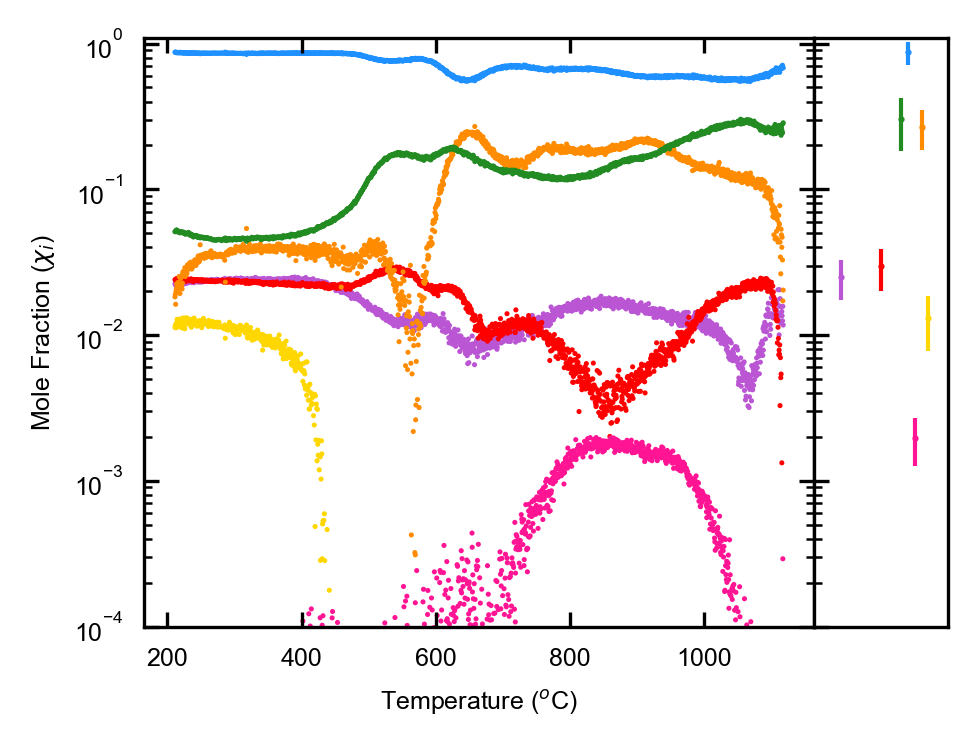

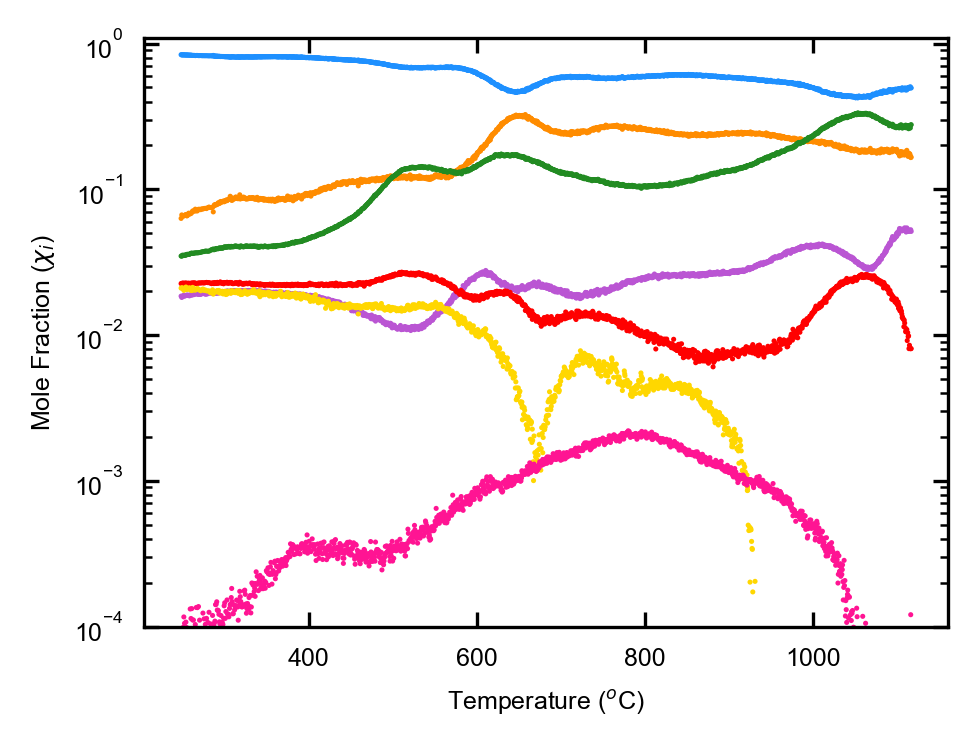

In [461]:
#Least Squares:
plotpretty_molefrac_scatterwitherr(M_X, 'T_interp_C', 'Temperature ($^o$C)', 'Murchison Least Squares Regression Result Calibrated', 'M_lstsq_molefracwitherr_update.jpg')
#plotlogmolefrac_pretty(M_X, 'Murchison', 'M_logX_lsq.jpg')
#plotlogmolefrac_pretty(W1_X, 'W1', 'W1_logX_lsq.jpg')
#plotlogmolefrac_pretty(W2_X, 'W2', 'W2_logX_lsq.jpg')
#plotlogmolefrac_pretty((W1_X+W2_Xinterp)/2, 'Winselwan', 'Winselwan_logX_lsq.jpg')
#plotlogmolefrac_pretty(AZ_X, 'AZ', 'AZ_logX_lsq.jpg')
plotpretty_molefrac_scatter(((M_X)+((W1_Xinterp+W2_Xinterp2)/2)+(AZ_Xinterp))/3, 'T_interp_C', 'Temperature ($^o$C)', 'CMAvg', 'CMAvglogX_Corrected_lsq.jpg')


In [27]:
#Save source data:
M_X_up.to_csv('Fig1_A.txt')
W1_X_up.to_csv('Fig1_B.txt')
W2_X_up.to_csv('Fig1_C.txt')
AZ_X_up.to_csv('Fig1_D.txt')

/Users/maggiethompson/.pyenv/versions/anaconda3-5.2.0/lib/python3.6/site-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in log10
  
/Users/maggiethompson/.pyenv/versions/anaconda3-5.2.0/lib/python3.6/site-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in log10
  if __name__ == '__main__':
/Users/maggiethompson/.pyenv/versions/anaconda3-5.2.0/lib/python3.6/site-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in log10
  # Remove the CWD from sys.path while we load stuff.
/Users/maggiethompson/.pyenv/versions/anaconda3-5.2.0/lib/python3.6/site-packages/ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in log10
  # This is added back by InteractiveShellApp.init_path()
/Users/maggiethompson/.pyenv/versions/anaconda3-5.2.0/lib/python3.6/site-packages/ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in log10
  from ipykernel import kernelapp as app
/Users/maggiethom

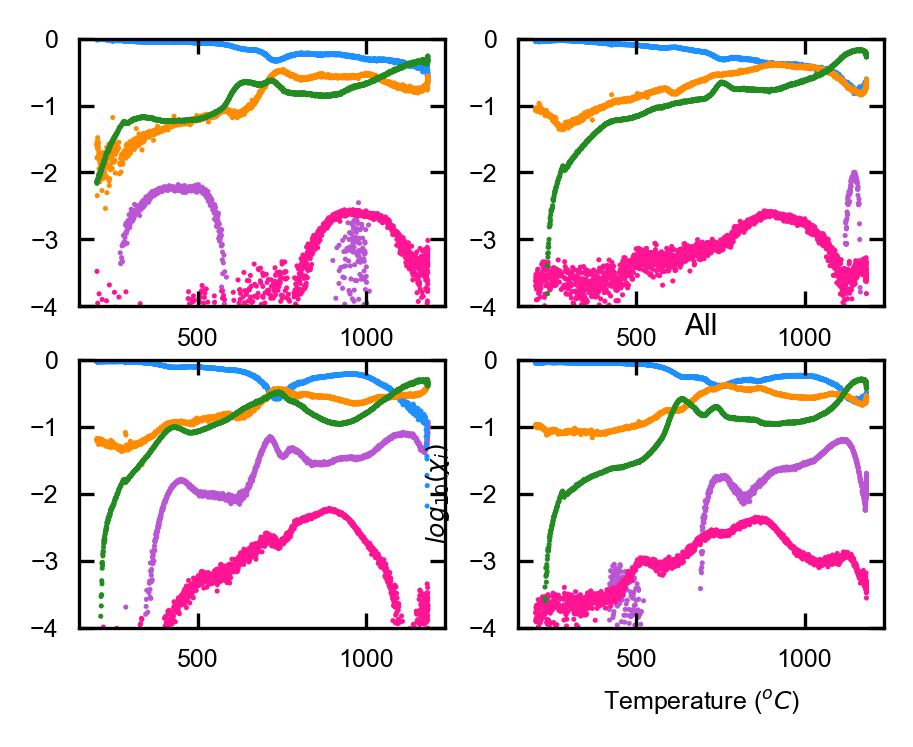

/Users/maggiethompson/.pyenv/versions/anaconda3-5.2.0/lib/python3.6/site-packages/ipykernel_launcher.py:31: RuntimeWarning: divide by zero encountered in log10
/Users/maggiethompson/.pyenv/versions/anaconda3-5.2.0/lib/python3.6/site-packages/ipykernel_launcher.py:32: RuntimeWarning: divide by zero encountered in log10
/Users/maggiethompson/.pyenv/versions/anaconda3-5.2.0/lib/python3.6/site-packages/ipykernel_launcher.py:33: RuntimeWarning: divide by zero encountered in log10
/Users/maggiethompson/.pyenv/versions/anaconda3-5.2.0/lib/python3.6/site-packages/ipykernel_launcher.py:37: RuntimeWarning: divide by zero encountered in log10
/Users/maggiethompson/.pyenv/versions/anaconda3-5.2.0/lib/python3.6/site-packages/ipykernel_launcher.py:38: RuntimeWarning: divide by zero encountered in log10
/Users/maggiethompson/.pyenv/versions/anaconda3-5.2.0/lib/python3.6/site-packages/ipykernel_launcher.py:39: RuntimeWarning: divide by zero encountered in log10
/Users/maggiethompson/.pyenv/versions/an

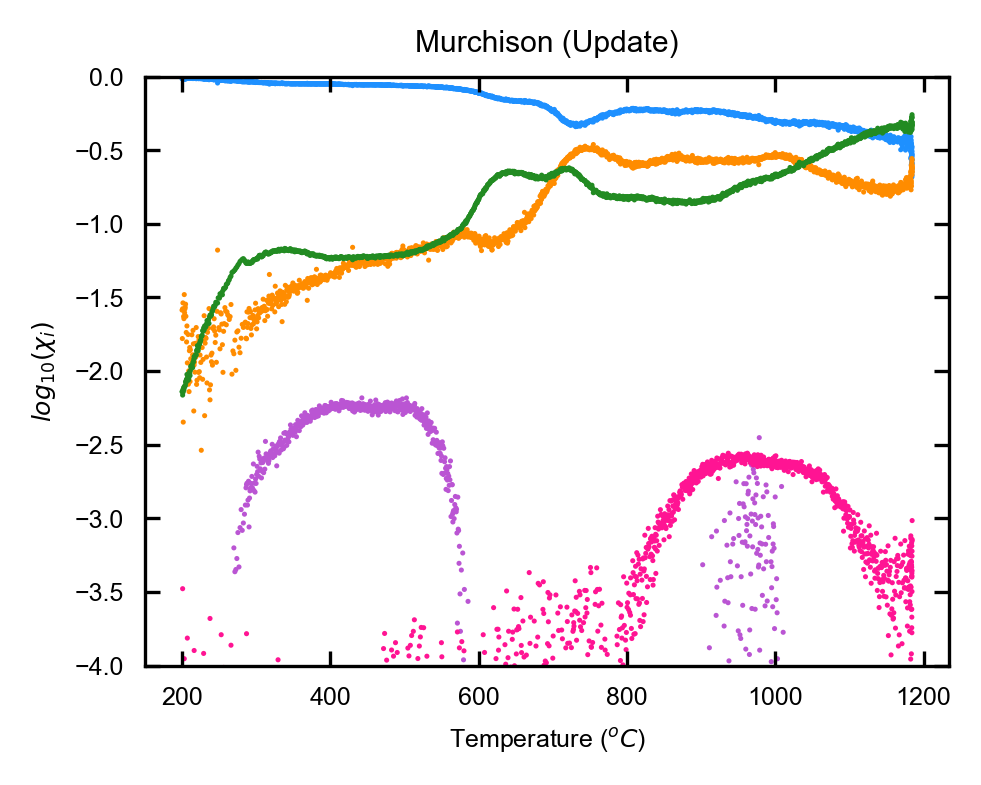

/Users/maggiethompson/.pyenv/versions/anaconda3-5.2.0/lib/python3.6/site-packages/ipykernel_launcher.py:45: RuntimeWarning: divide by zero encountered in log10


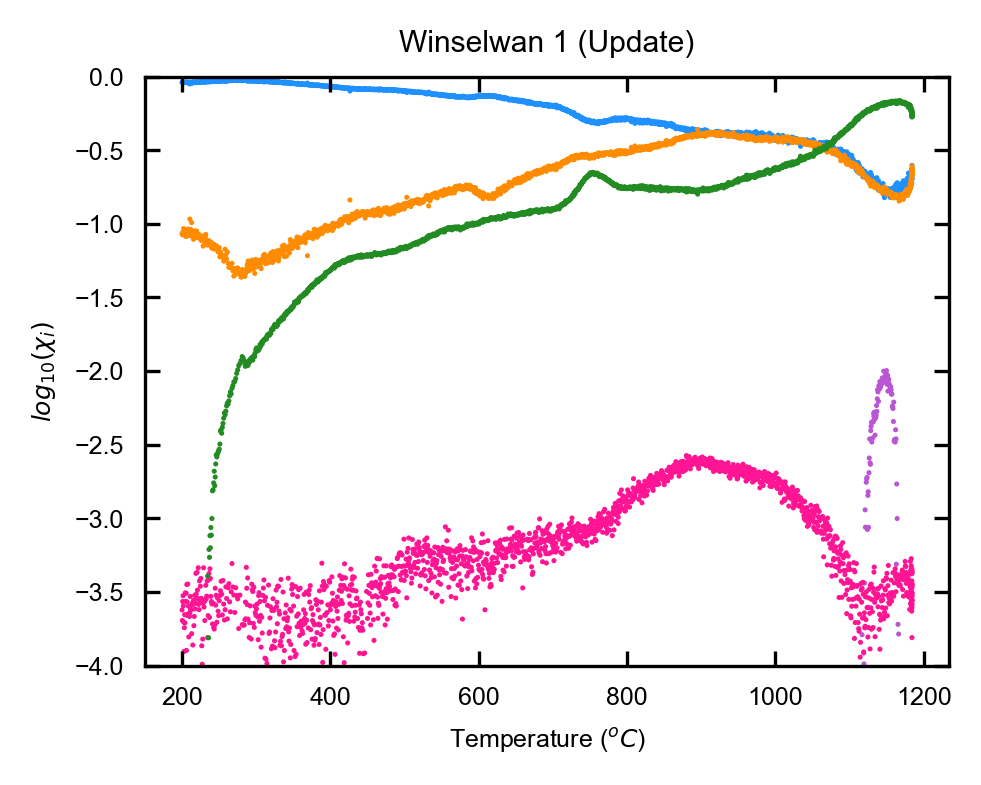

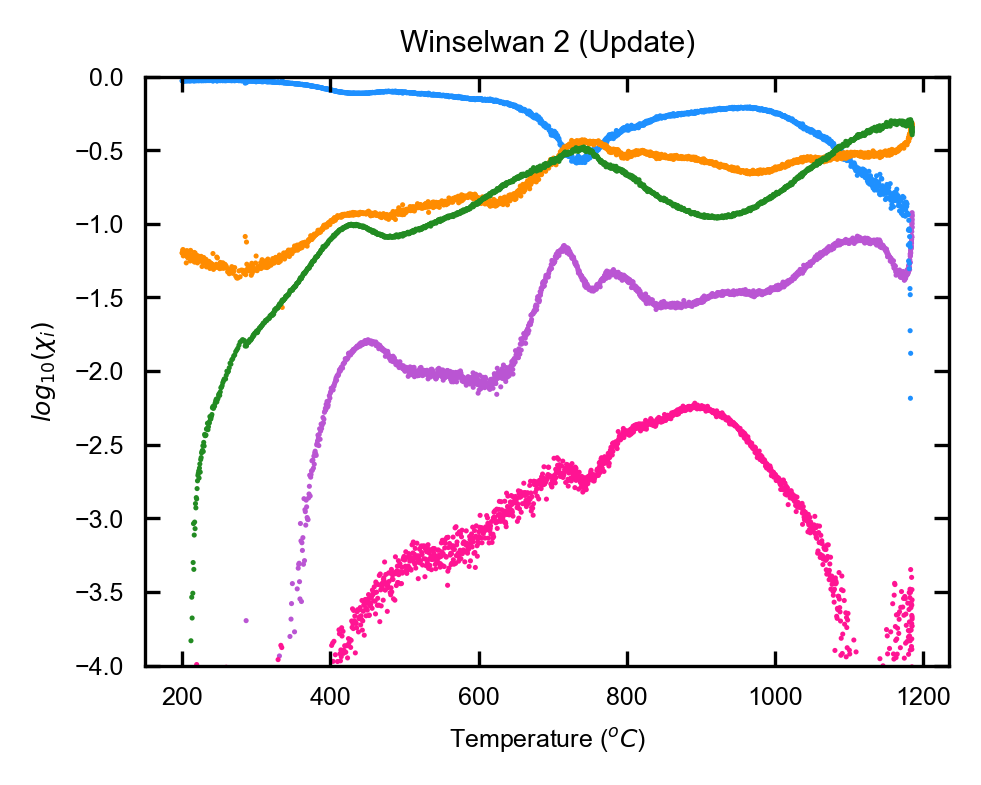

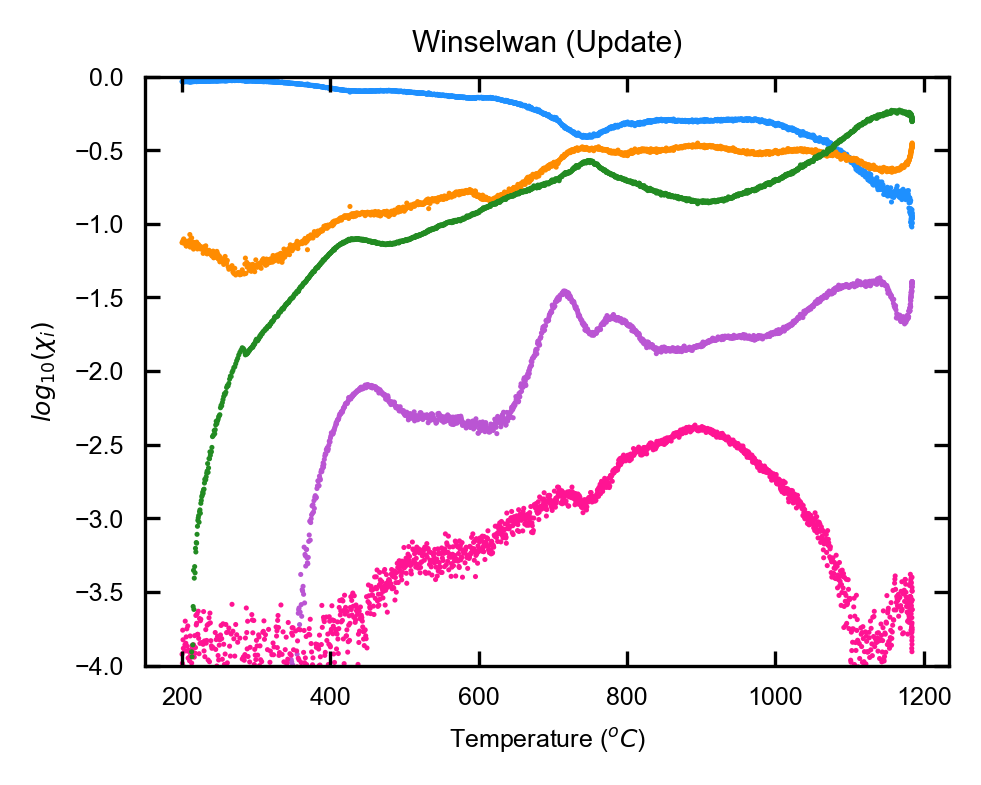

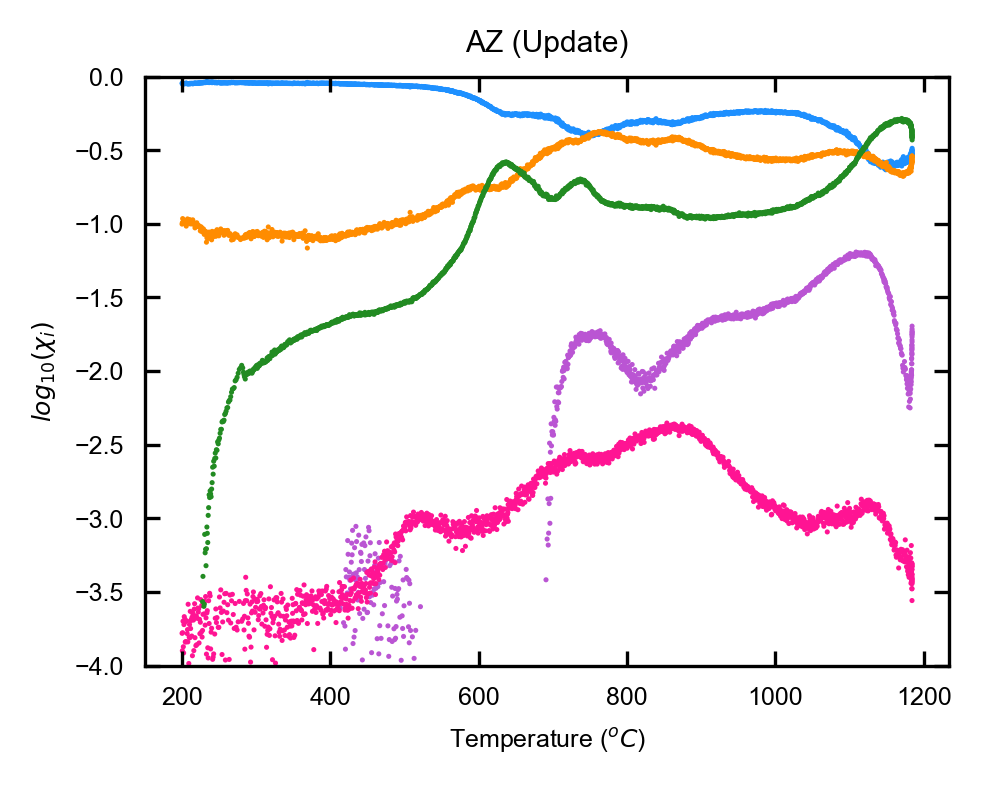

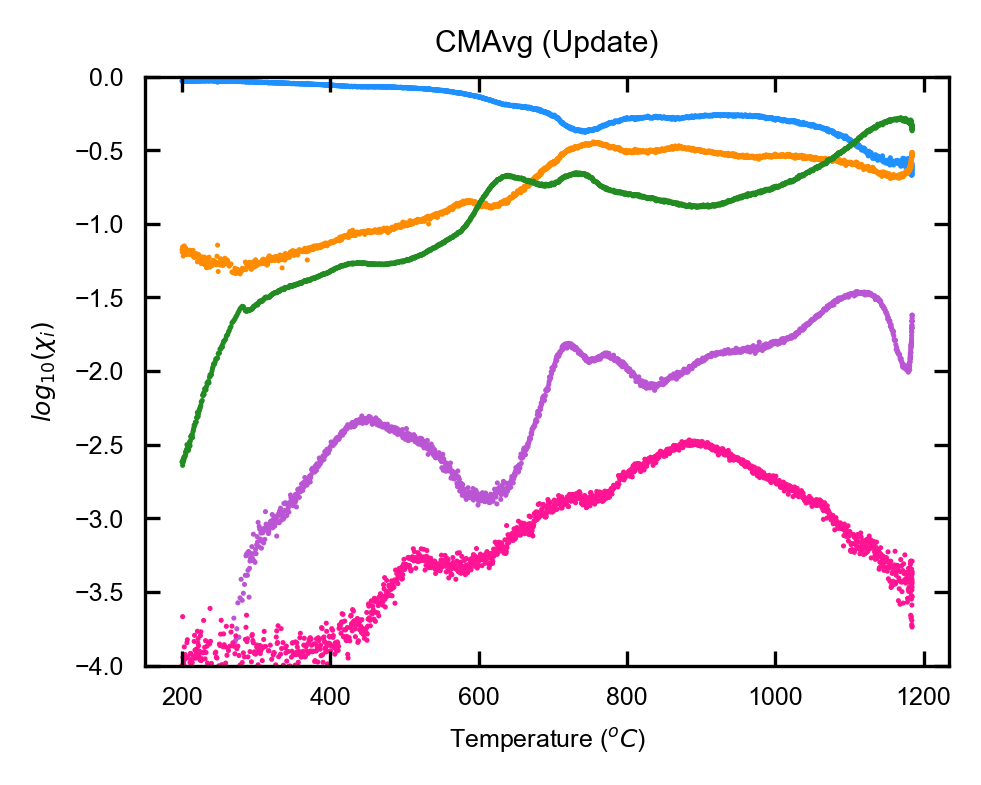

In [464]:
#NIST Fragments:
def plotlogmolefrac_ALL(file1, file2, file3, file4, title, title2):
    fig = plt.figure()
    ax1 = fig.add_subplot(221)
    ax2 = fig.add_subplot(222, sharex=ax1, sharey=ax1)
    ax3 = fig.add_subplot(223, sharex=ax1, sharey=ax1)
    ax4 = fig.add_subplot(224, sharex=ax1, sharey=ax1)
    ax1.scatter(file1.T_interp_C, np.log10(file1.H2), marker='o',s=1.5, edgecolors='none', color='mediumorchid', label=r'H$_2$')
    ax1.scatter(file1.T_interp_C, np.log10(file1.C), marker='o', s=1.5,edgecolors='none', color='lime', label=r'C corrected')
    ax1.scatter(file1.T_interp_C, np.log10(file1.N), marker='o', s=1.5,edgecolors='none', color='navy', label=r'N corrected')
    ax1.scatter(file1.T_interp_C, np.log10(file1.CH4), marker='o', s=1.5,edgecolors='none', color='red', label=r'CH$_4$ corrected')
    #plt.scatter(file.T_interp_C, np.log10(file.O), marker='o', s=2, color='cyan', label=r'O corrected')

    ax1.scatter(file1.T_interp_C, np.log10(file1.H2O), marker='o', s=1.5, edgecolors='none', color='dodgerblue', label=r'H$_2$O')
    ax1.scatter(file1.T_interp_C, np.log10(file1.N2), marker='o', s=1.5, edgecolors='none',color='magenta', label=r'N2')
    ax1.scatter(file1.T_interp_C, np.log10(file1.CO), marker='o', s=1.5, edgecolors='none',color='darkorange', label=r'CO')
    ax1.scatter(file1.T_interp_C, np.log10(file1.S_O2), marker='o', alpha=0.5, s=1.5,edgecolors='none', color='gold', label=r'S or O$_2$')
    #plt.scatter(file.T_interp_C, np.log10(file.O2), marker='o', alpha=0.5, s=2, color='goldenrod', label=r'O$_2$')
    #plt.scatter(file.T_interp_C, np.log10(file.S), marker='o', alpha=0.5, s=2, color='gold', label=r'S')

    ax1.scatter(file1.T_interp_C, np.log10(file1.H2S), marker='o', s=1.5,edgecolors='none', color='deeppink', label=r'H$_2$S')
    #plt.scatter(file.T_interp_C, np.log10(file.Ar), marker='o', s=2, color='purple', label=r'Ar')
    ax1.scatter(file1.T_interp_C, np.log10(file1.CO2), marker='o', s=1.5,edgecolors='none', color='forestgreen', label=r'CO$_2$')
    #plt.yscale('log')
    ax1.tick_params(which='both', top=True, right=True)
    
    ax2.scatter(file2.T_interp_C, np.log10(file2.H2), marker='o',s=1.5, edgecolors='none', color='mediumorchid', label=r'H$_2$')
    ax2.scatter(file2.T_interp_C, np.log10(file2.C), marker='o', s=1.5,edgecolors='none', color='lime', label=r'C corrected')
    ax2.scatter(file2.T_interp_C, np.log10(file2.N), marker='o', s=1.5,edgecolors='none', color='navy', label=r'N corrected')
    ax2.scatter(file2.T_interp_C, np.log10(file2.CH4), marker='o', s=1.5,edgecolors='none', color='red', label=r'CH$_4$ corrected')
    #plt.scatter(file.T_interp_C, np.log10(file.O), marker='o', s=2, color='cyan', label=r'O corrected')

    ax2.scatter(file2.T_interp_C, np.log10(file2.H2O), marker='o', s=1.5, edgecolors='none', color='dodgerblue', label=r'H$_2$O')
    ax2.scatter(file2.T_interp_C, np.log10(file2.N2), marker='o', s=1.5, edgecolors='none',color='magenta', label=r'N2')
    ax2.scatter(file2.T_interp_C, np.log10(file2.CO), marker='o', s=1.5, edgecolors='none',color='darkorange', label=r'CO')
    ax2.scatter(file2.T_interp_C, np.log10(file2.S_O2), marker='o', alpha=0.5, s=1.5,edgecolors='none', color='gold', label=r'S or O$_2$')
    #plt.scatter(file.T_interp_C, np.log10(file.O2), marker='o', alpha=0.5, s=2, color='goldenrod', label=r'O$_2$')
    #plt.scatter(file.T_interp_C, np.log10(file.S), marker='o', alpha=0.5, s=2, color='gold', label=r'S')

    ax2.scatter(file2.T_interp_C, np.log10(file2.H2S), marker='o', s=1.5,edgecolors='none', color='deeppink', label=r'H$_2$S')
    #plt.scatter(file.T_interp_C, np.log10(file.Ar), marker='o', s=2, color='purple', label=r'Ar')
    ax2.scatter(file2.T_interp_C, np.log10(file2.CO2), marker='o', s=1.5,edgecolors='none', color='forestgreen', label=r'CO$_2$')
    #plt.yscale('log')
    ax2.tick_params(which='both', top=True, right=True)
    
    ax3.scatter(file3.T_interp_C, np.log10(file3.H2), marker='o',s=1.5, edgecolors='none', color='mediumorchid', label=r'H$_2$')
    ax3.scatter(file3.T_interp_C, np.log10(file3.C), marker='o', s=1.5,edgecolors='none', color='lime', label=r'C corrected')
    ax3.scatter(file3.T_interp_C, np.log10(file3.N), marker='o', s=1.5,edgecolors='none', color='navy', label=r'N corrected')
    ax3.scatter(file3.T_interp_C, np.log10(file3.CH4), marker='o', s=1.5,edgecolors='none', color='red', label=r'CH$_4$ corrected')
    #plt.scatter(file.T_interp_C, np.log10(file.O), marker='o', s=2, color='cyan', label=r'O corrected')

    ax3.scatter(file3.T_interp_C, np.log10(file3.H2O), marker='o', s=1.5, edgecolors='none', color='dodgerblue', label=r'H$_2$O')
    ax3.scatter(file3.T_interp_C, np.log10(file3.N2), marker='o', s=1.5, edgecolors='none',color='magenta', label=r'N2')
    ax3.scatter(file3.T_interp_C, np.log10(file3.CO), marker='o', s=1.5, edgecolors='none',color='darkorange', label=r'CO')
    ax3.scatter(file3.T_interp_C, np.log10(file3.S_O2), marker='o', alpha=0.5, s=1.5,edgecolors='none', color='gold', label=r'S or O$_2$')
    #plt.scatter(file.T_interp_C, np.log10(file.O2), marker='o', alpha=0.5, s=2, color='goldenrod', label=r'O$_2$')
    #plt.scatter(file.T_interp_C, np.log10(file.S), marker='o', alpha=0.5, s=2, color='gold', label=r'S')

    ax3.scatter(file3.T_interp_C, np.log10(file3.H2S), marker='o', s=1.5,edgecolors='none', color='deeppink', label=r'H$_2$S')
    #plt.scatter(file.T_interp_C, np.log10(file.Ar), marker='o', s=2, color='purple', label=r'Ar')
    ax3.scatter(file3.T_interp_C, np.log10(file3.CO2), marker='o', s=1.5,edgecolors='none', color='forestgreen', label=r'CO$_2$')
    #plt.yscale('log')
    ax3.tick_params(which='both', top=True, right=True)
    
    ax4.scatter(file4.T_interp_C, np.log10(file4.H2), marker='o',s=1.5, edgecolors='none', color='mediumorchid', label=r'H$_2$')
    ax4.scatter(file4.T_interp_C, np.log10(file4.C), marker='o', s=1.5,edgecolors='none', color='lime', label=r'C corrected')
    ax4.scatter(file4.T_interp_C, np.log10(file4.N), marker='o', s=1.5,edgecolors='none', color='navy', label=r'N corrected')
    ax4.scatter(file4.T_interp_C, np.log10(file4.CH4), marker='o', s=1.5,edgecolors='none', color='red', label=r'CH$_4$ corrected')
    #plt.scatter(file.T_interp_C, np.log10(file.O), marker='o', s=2, color='cyan', label=r'O corrected')

    ax4.scatter(file4.T_interp_C, np.log10(file4.H2O), marker='o', s=1.5, edgecolors='none', color='dodgerblue', label=r'H$_2$O')
    ax4.scatter(file4.T_interp_C, np.log10(file4.N2), marker='o', s=1.5, edgecolors='none',color='magenta', label=r'N2')
    ax4.scatter(file4.T_interp_C, np.log10(file4.CO), marker='o', s=1.5, edgecolors='none',color='darkorange', label=r'CO')
    ax4.scatter(file4.T_interp_C, np.log10(file4.S_O2), marker='o', alpha=0.5, s=1.5,edgecolors='none', color='gold', label=r'S or O$_2$')
    #plt.scatter(file.T_interp_C, np.log10(file.O2), marker='o', alpha=0.5, s=2, color='goldenrod', label=r'O$_2$')
    #plt.scatter(file.T_interp_C, np.log10(file.S), marker='o', alpha=0.5, s=2, color='gold', label=r'S')

    ax4.scatter(file4.T_interp_C, np.log10(file4.H2S), marker='o', s=1.5,edgecolors='none', color='deeppink', label=r'H$_2$S')
    #plt.scatter(file.T_interp_C, np.log10(file.Ar), marker='o', s=2, color='purple', label=r'Ar')
    ax4.scatter(file4.T_interp_C, np.log10(file4.CO2), marker='o', s=1.5,edgecolors='none', color='forestgreen', label=r'CO$_2$')
    #plt.yscale('log')
    ax4.tick_params(which='both', top=True, right=True)
    plt.ylim(-4, 0)
    #plt.xlim(150, 1250)
    plt.xlabel(r'Temperature ($^oC$)')
    plt.ylabel(r'$log_{10}(\chi_{i})$')
    plt.title(title)
    #plt.legend(fontsize='small', loc=4)
    plt.savefig(title2, dpi=1000)
    plt.show()

plotlogmolefrac_ALL(M_X_up, W1_X_up, W2_X_up, AZ_X_up, 'All', 'Figure1.pdf')
    
plotlogmolefrac_prettyOG(M_X_up, 'Murchison (Update)', 'Murchison_logX_updated.jpg')
plotlogmolefrac_prettyOG(W1_X_up, 'Winselwan 1 (Update)', 'Winselwan1_logX_updated.jpg')
plotlogmolefrac_prettyOG(W2_X_up, 'Winselwan 2 (Update)', 'Winselwan2_logX_updated.jpg')


plotlogmolefrac_prettyOG((W1_X_up+W2_Xinterp_up)/2, 'Winselwan (Update)', 'Winselwan_logX_updated.jpg')
plotlogmolefrac_prettyOG(AZ_X_up, 'AZ (Update)', 'AZ_logX_updated.jpg')
plotlogmolefrac_prettyOG(((M_X_up)+((W1_Xinterp_up+W2_Xinterp2_up)/2)+(AZ_Xinterp_up))/3, 'CMAvg (Update)', 'CMAvglogX_Corrected_updated.jpg')




/Users/maggiethompson/.pyenv/versions/anaconda3-5.2.0/lib/python3.6/site-packages/ipykernel_launcher.py:30: RuntimeWarning: divide by zero encountered in log10
/Users/maggiethompson/.pyenv/versions/anaconda3-5.2.0/lib/python3.6/site-packages/ipykernel_launcher.py:31: RuntimeWarning: divide by zero encountered in log10
/Users/maggiethompson/.pyenv/versions/anaconda3-5.2.0/lib/python3.6/site-packages/ipykernel_launcher.py:32: RuntimeWarning: divide by zero encountered in log10
/Users/maggiethompson/.pyenv/versions/anaconda3-5.2.0/lib/python3.6/site-packages/ipykernel_launcher.py:33: RuntimeWarning: divide by zero encountered in log10
/Users/maggiethompson/.pyenv/versions/anaconda3-5.2.0/lib/python3.6/site-packages/ipykernel_launcher.py:37: RuntimeWarning: divide by zero encountered in log10
/Users/maggiethompson/.pyenv/versions/anaconda3-5.2.0/lib/python3.6/site-packages/ipykernel_launcher.py:38: RuntimeWarning: divide by zero encountered in log10
/Users/maggiethompson/.pyenv/versions/an

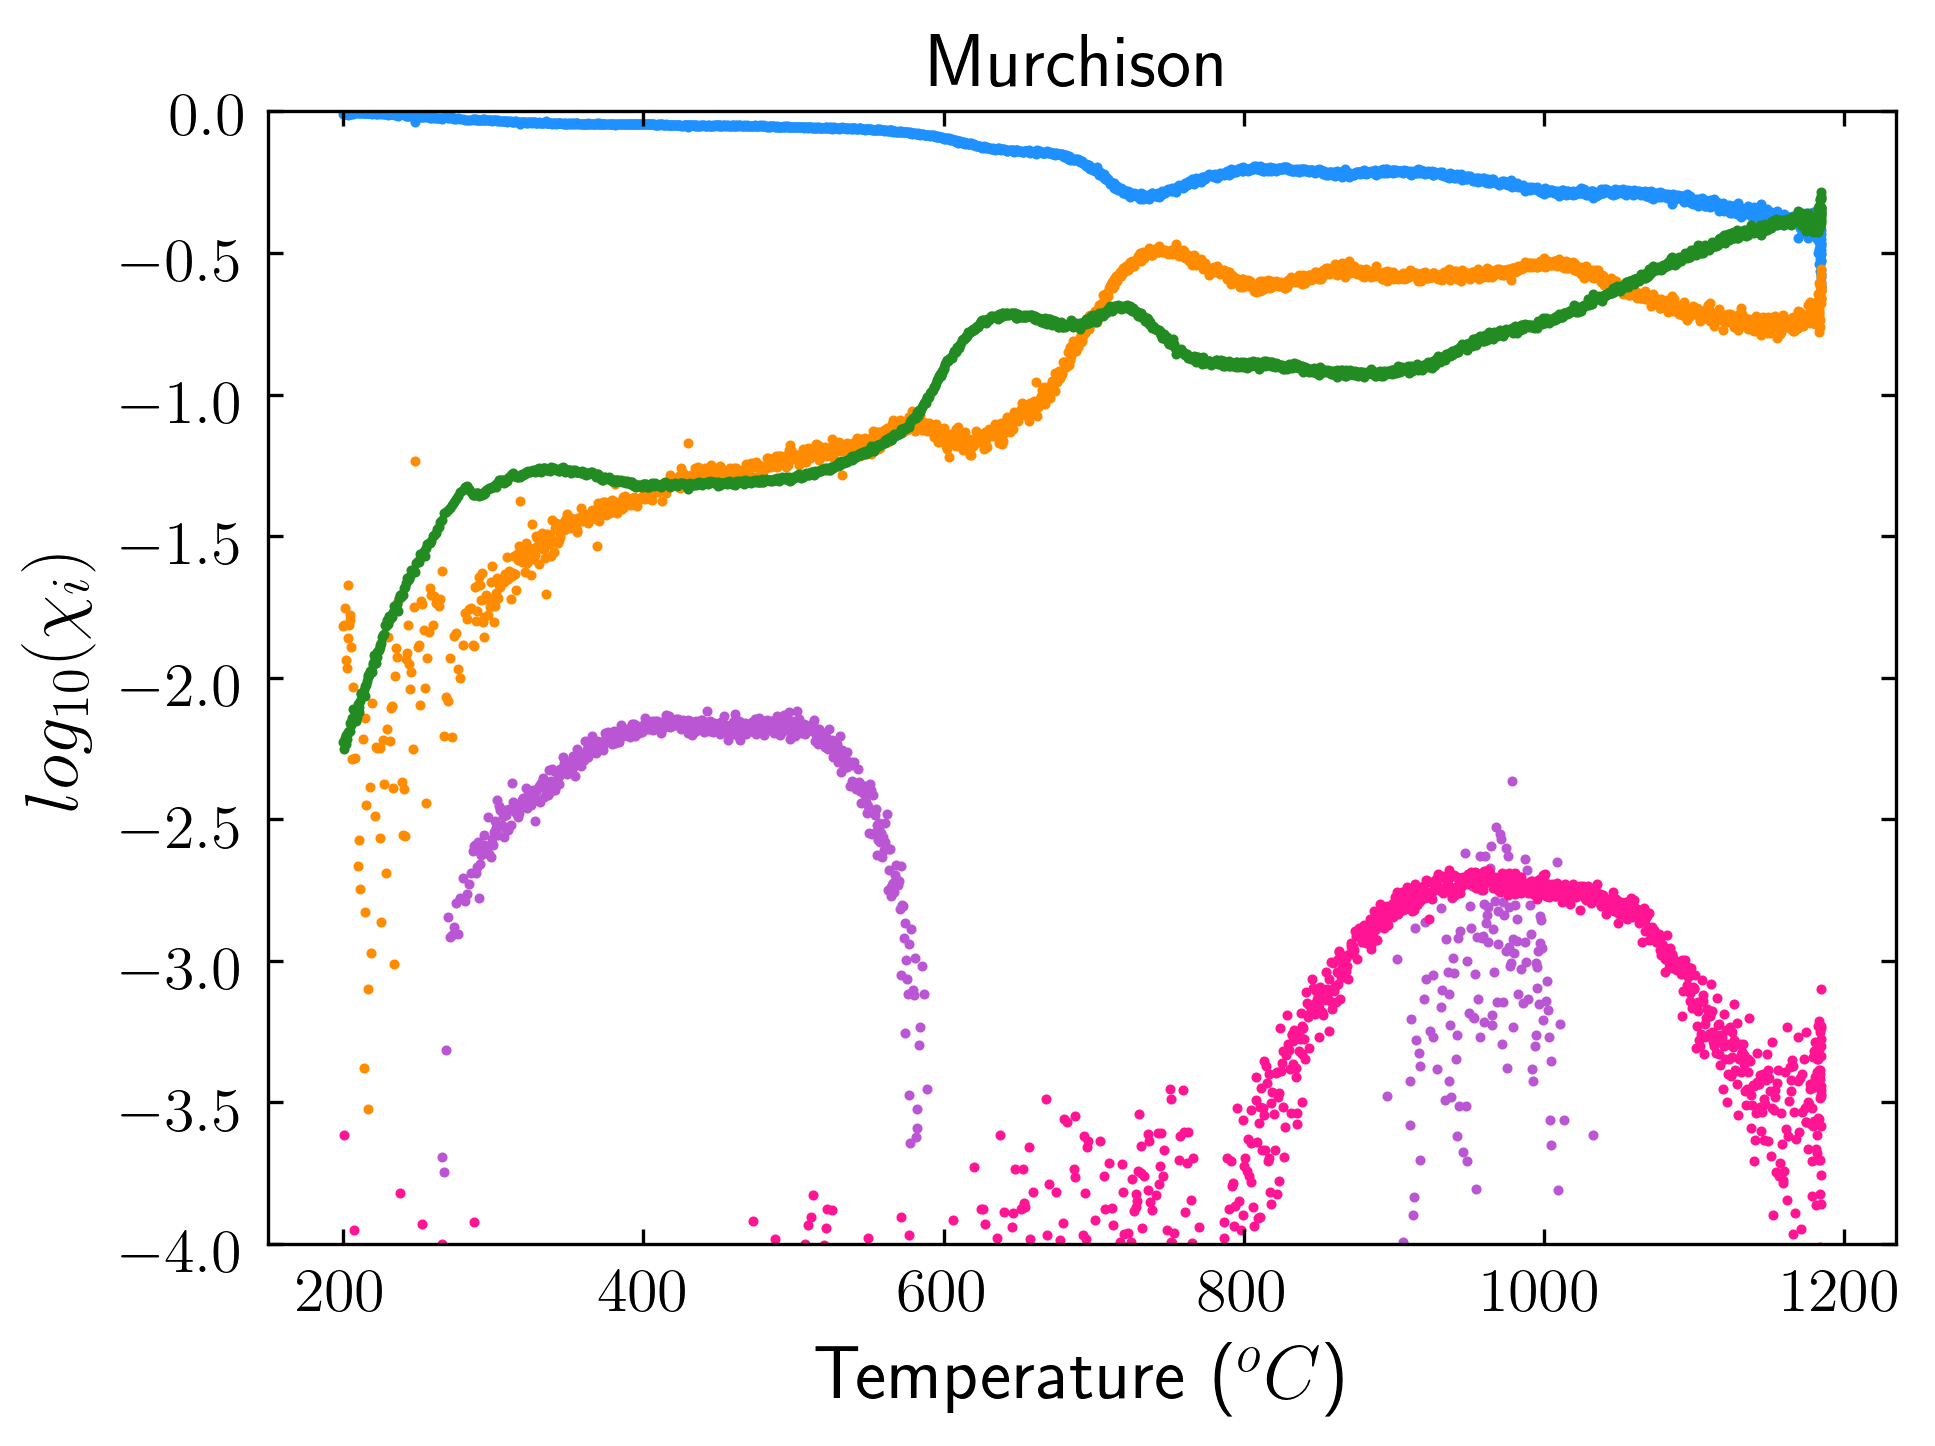

/Users/maggiethompson/.pyenv/versions/anaconda3-5.2.0/lib/python3.6/site-packages/ipykernel_launcher.py:45: RuntimeWarning: divide by zero encountered in log10


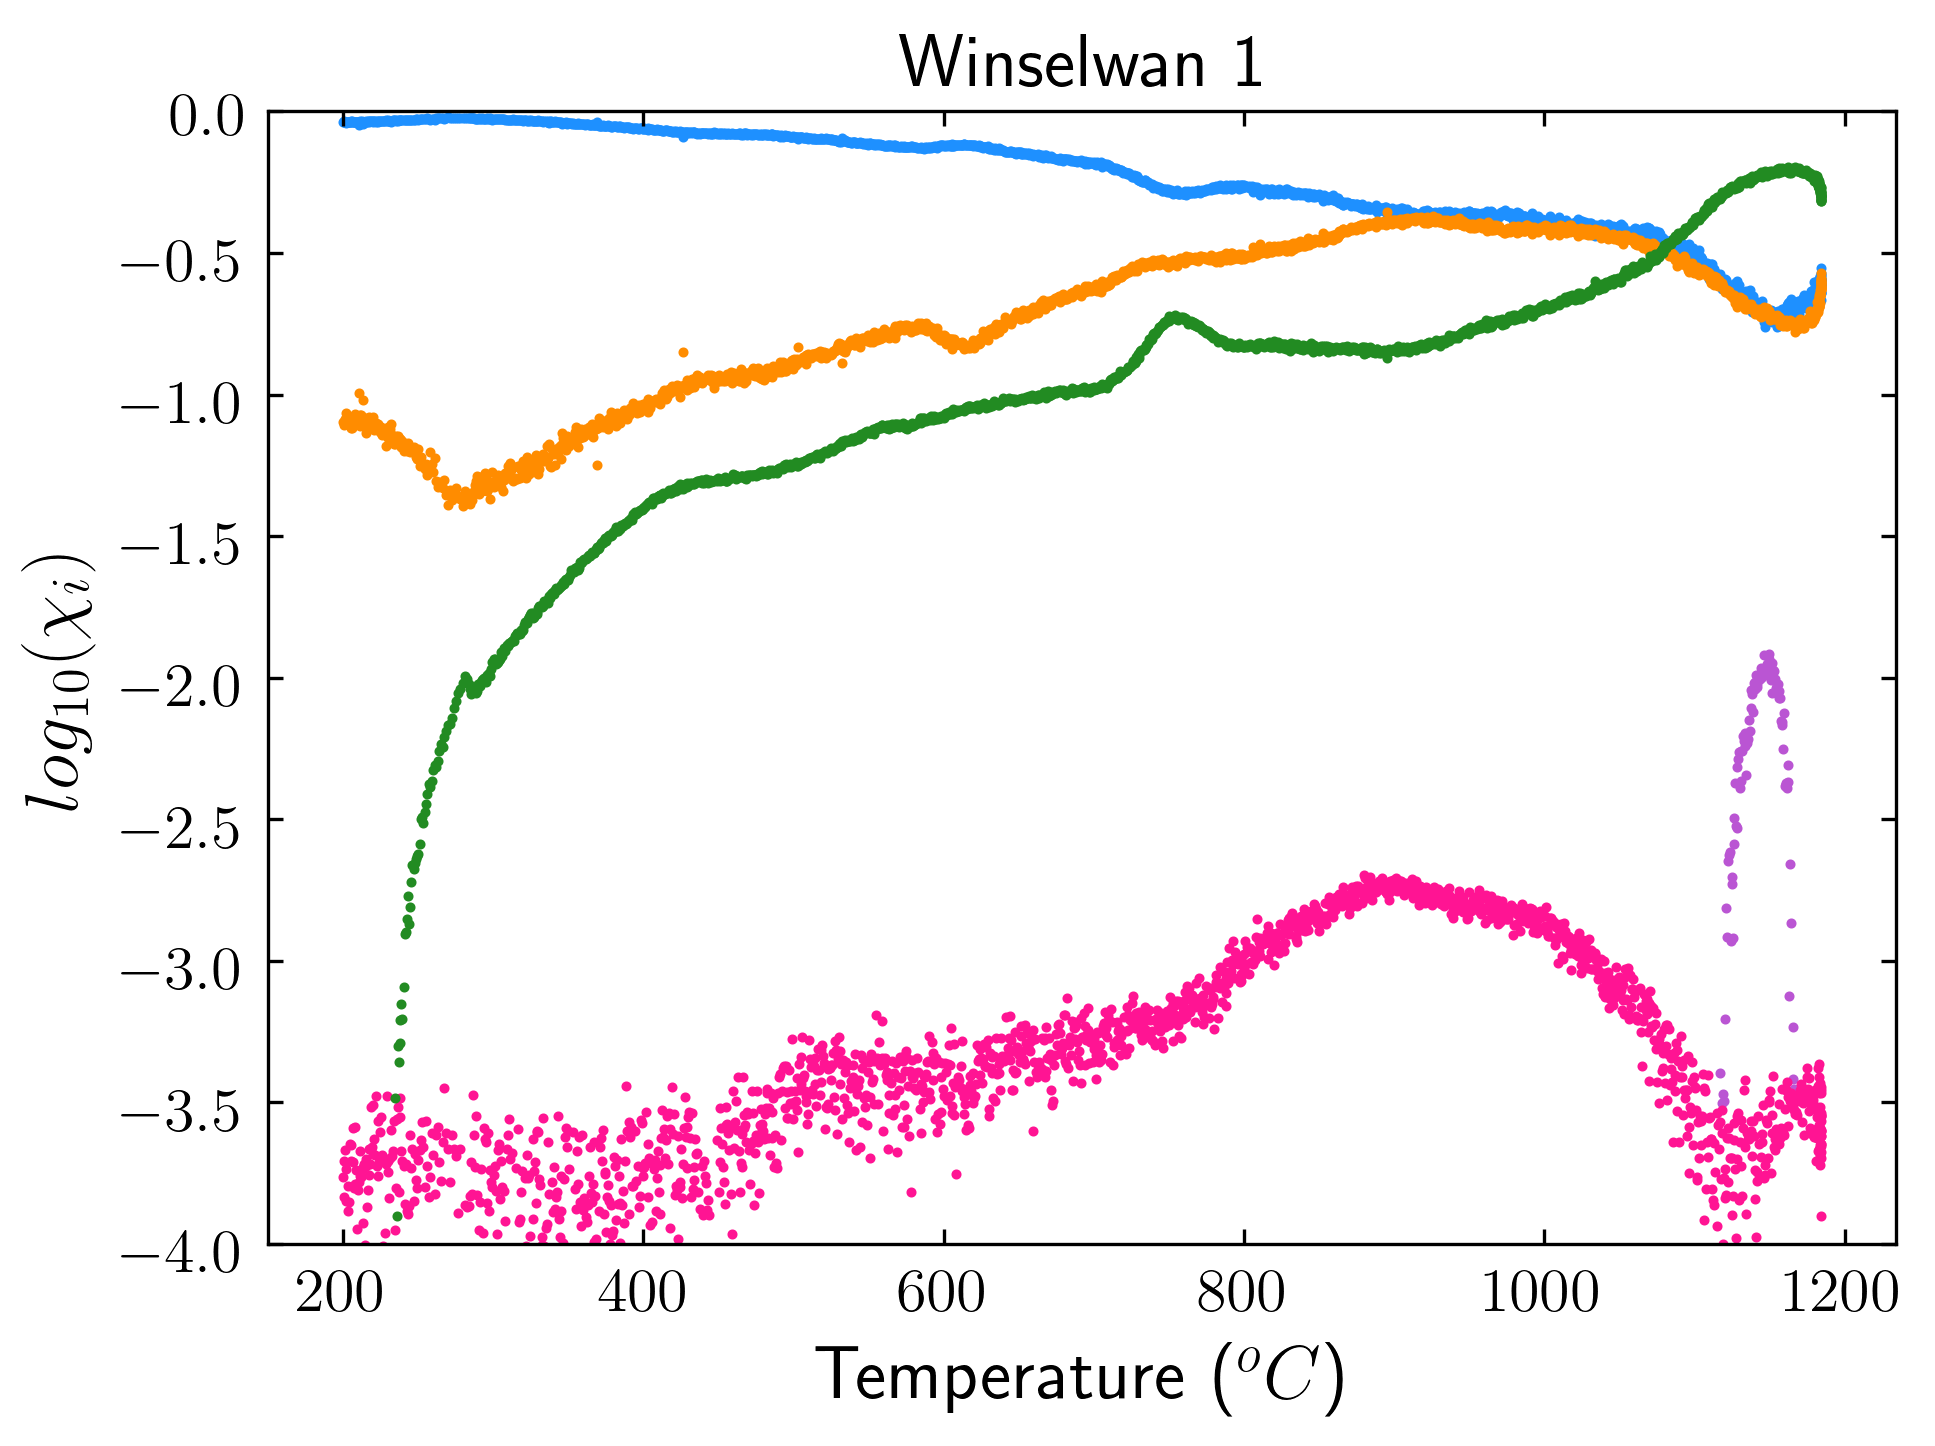

/Users/maggiethompson/.pyenv/versions/anaconda3-5.2.0/lib/python3.6/site-packages/ipykernel_launcher.py:36: RuntimeWarning: divide by zero encountered in log10


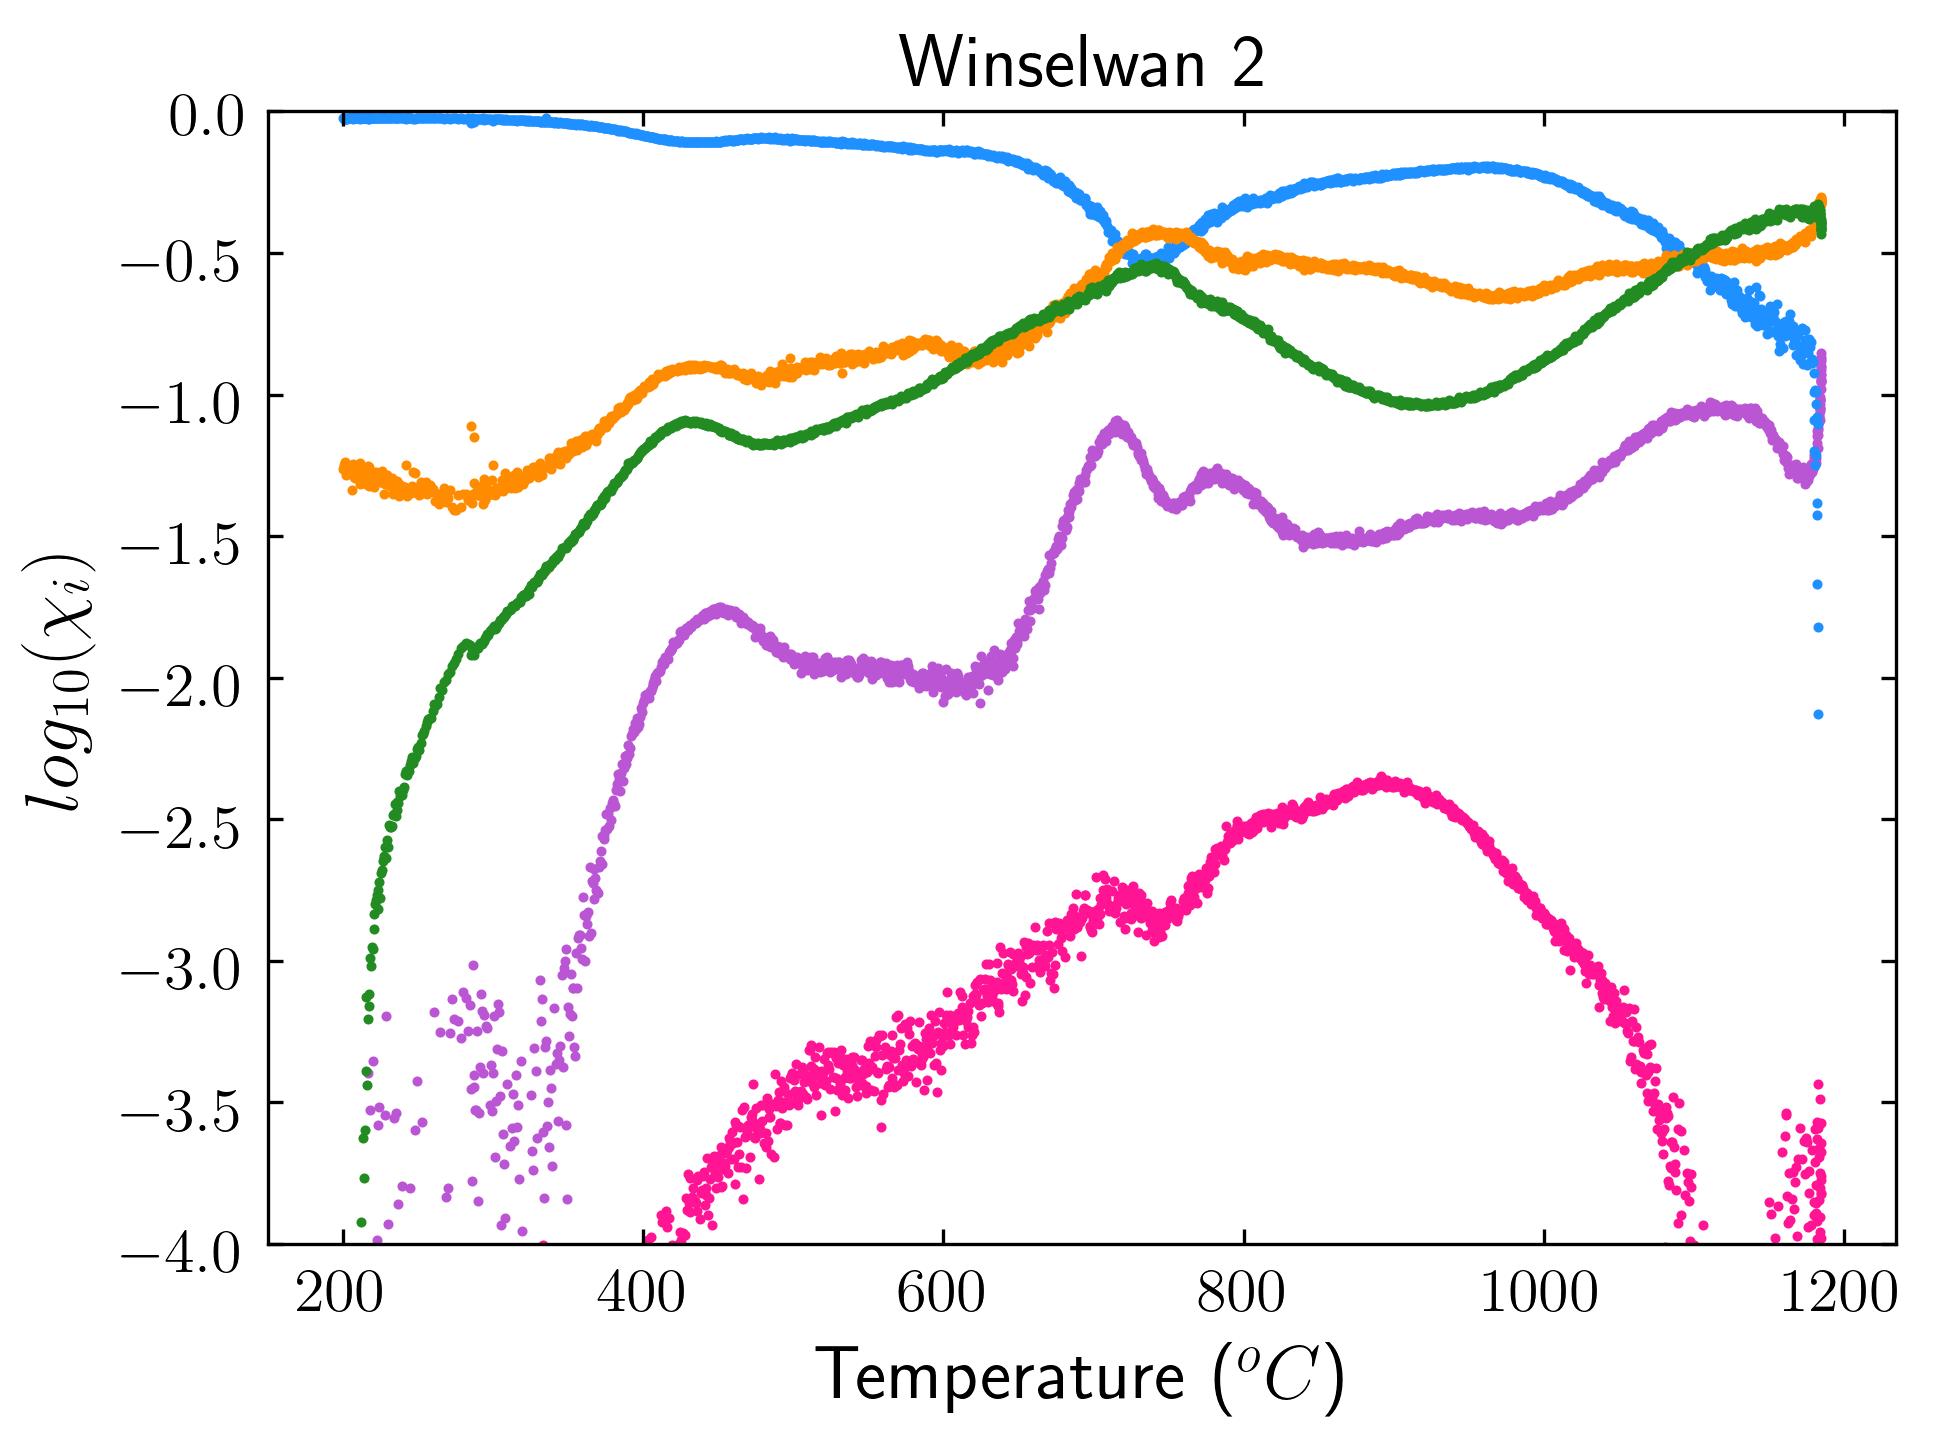

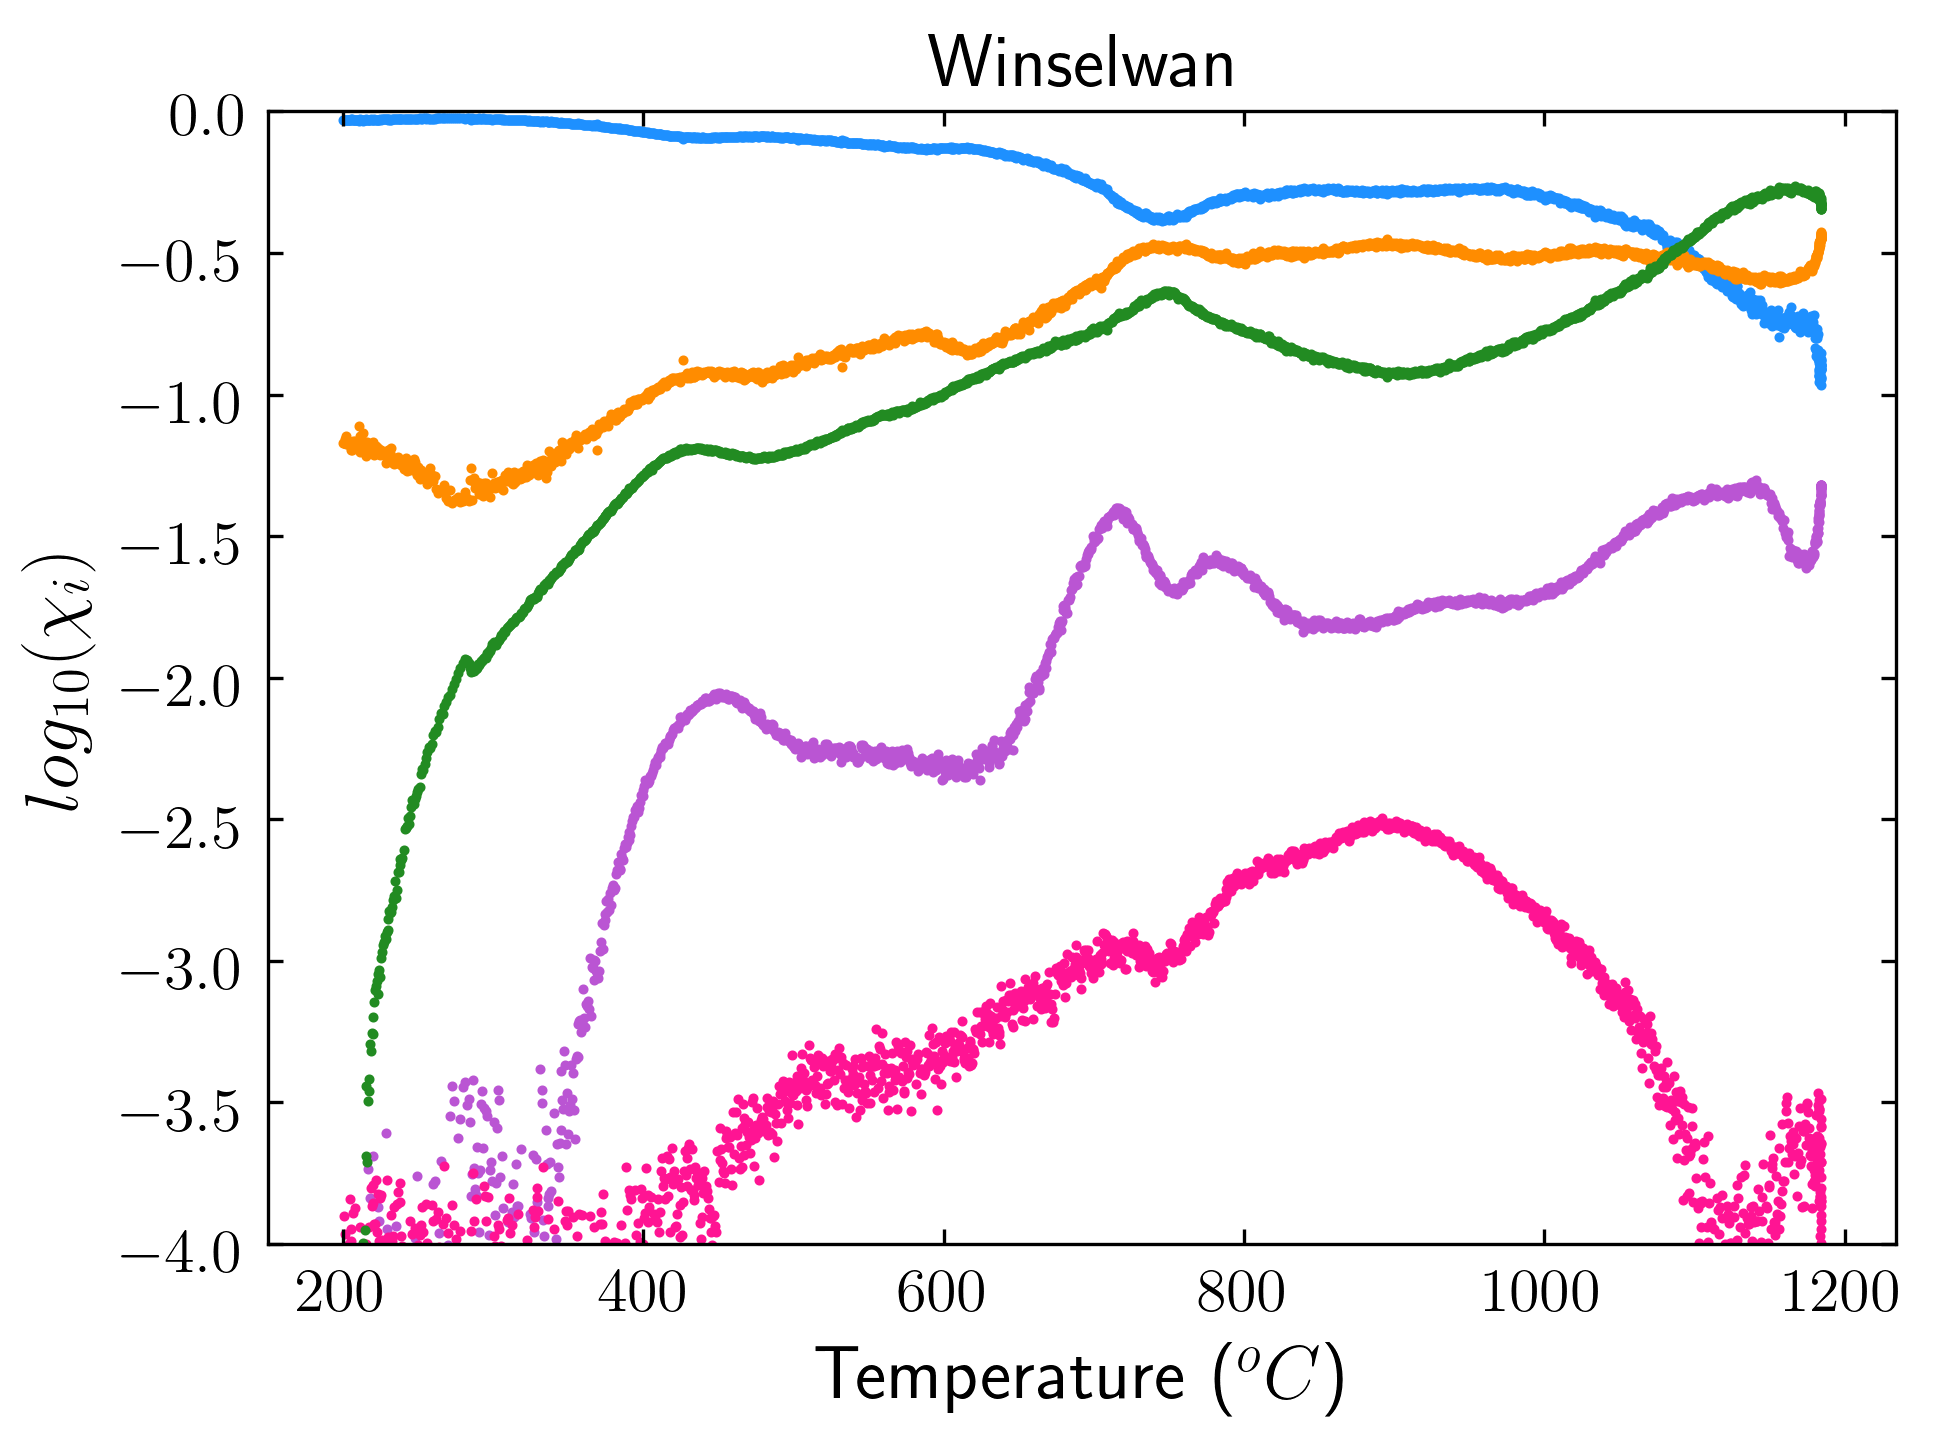

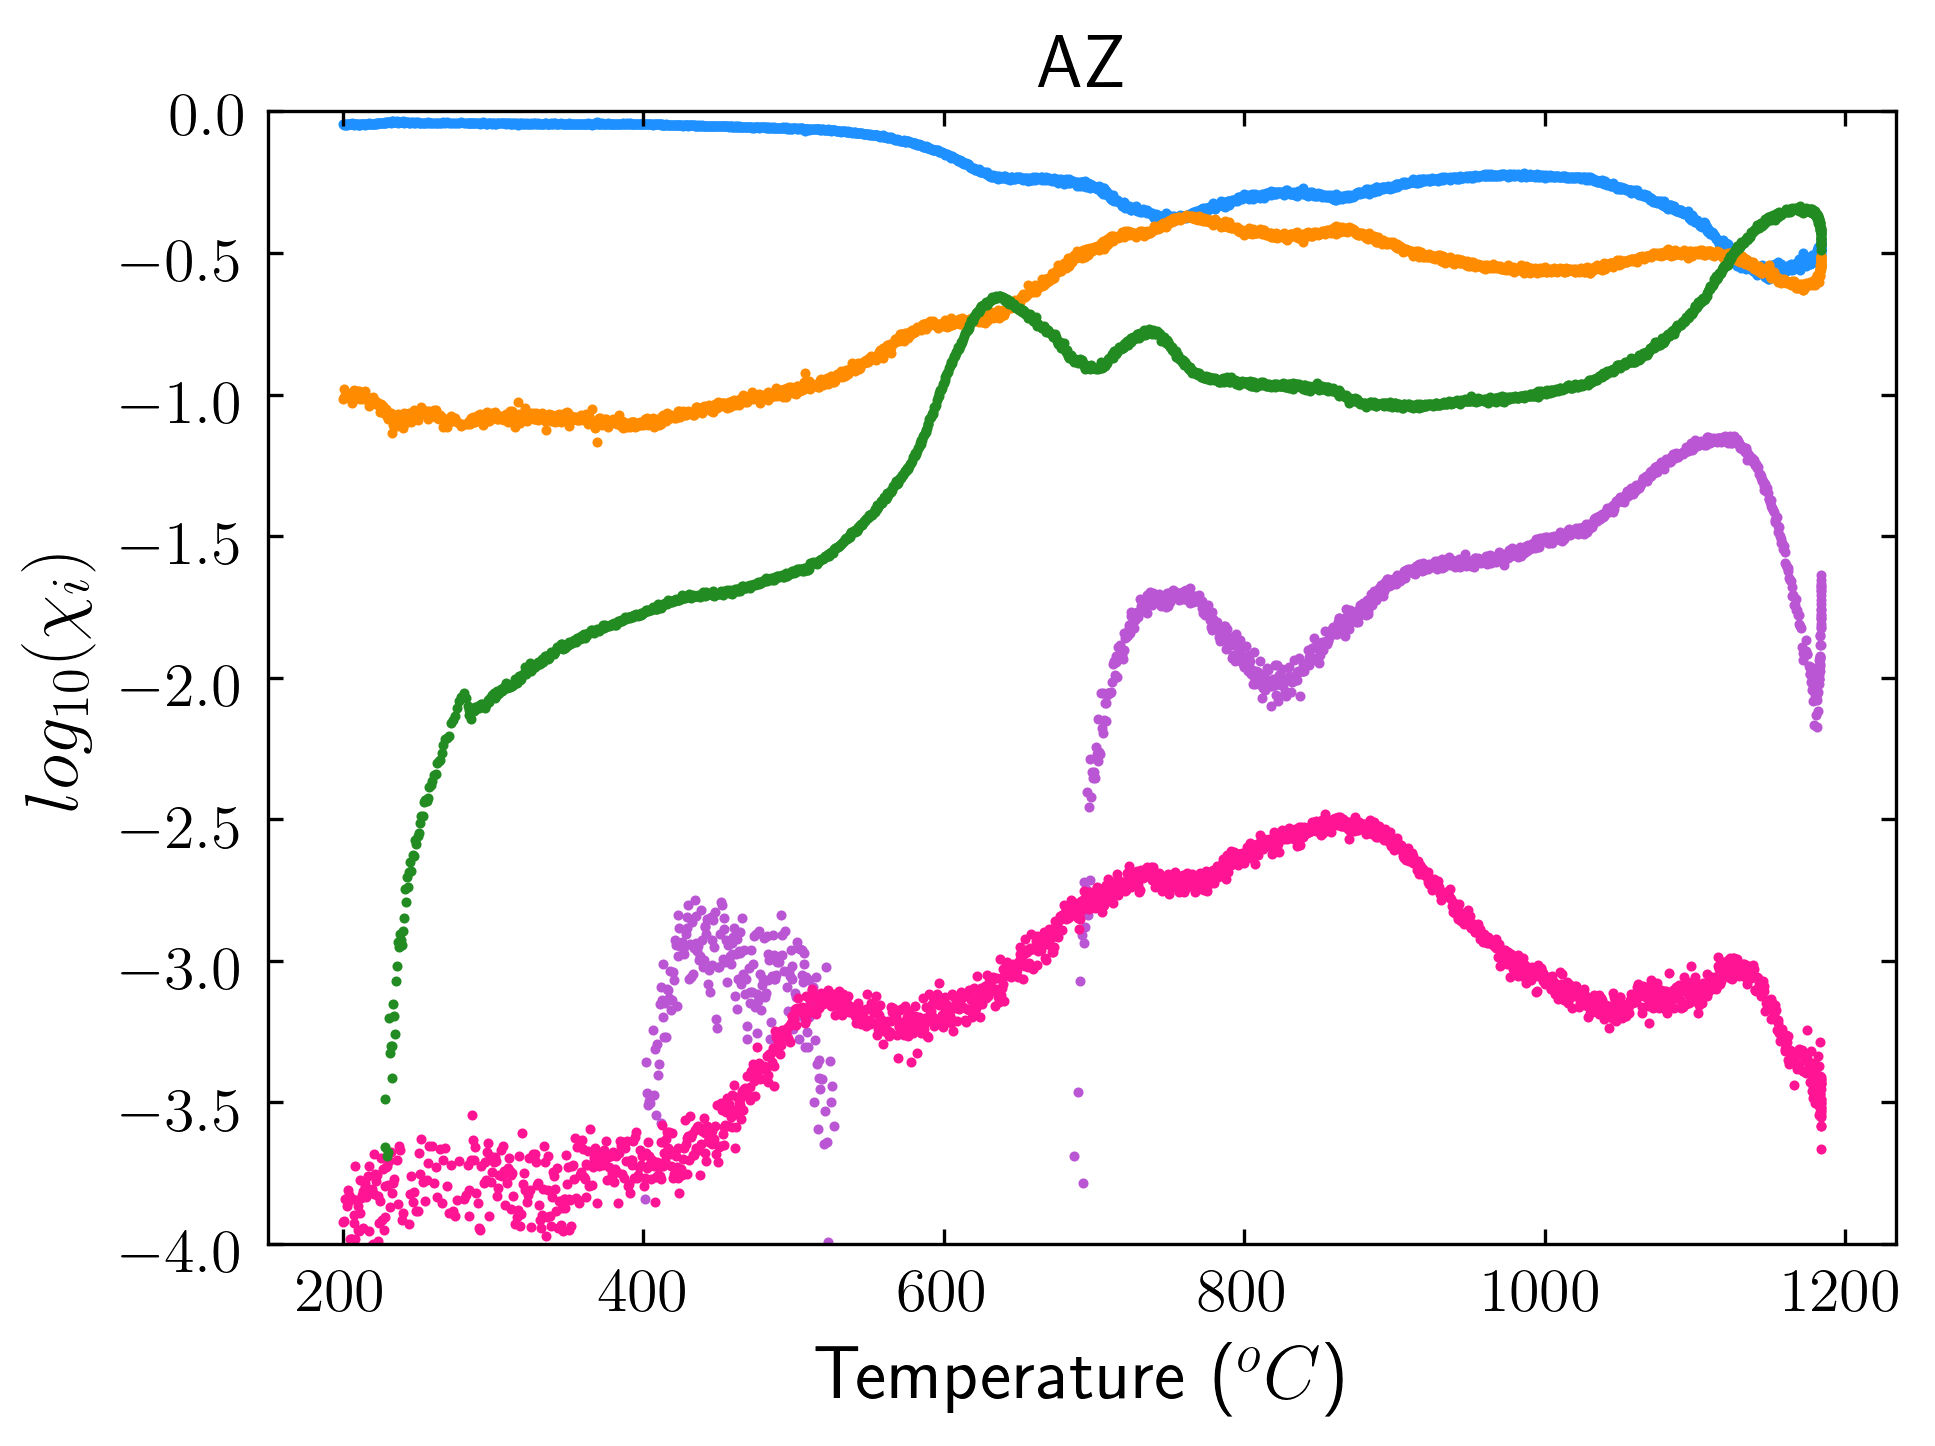

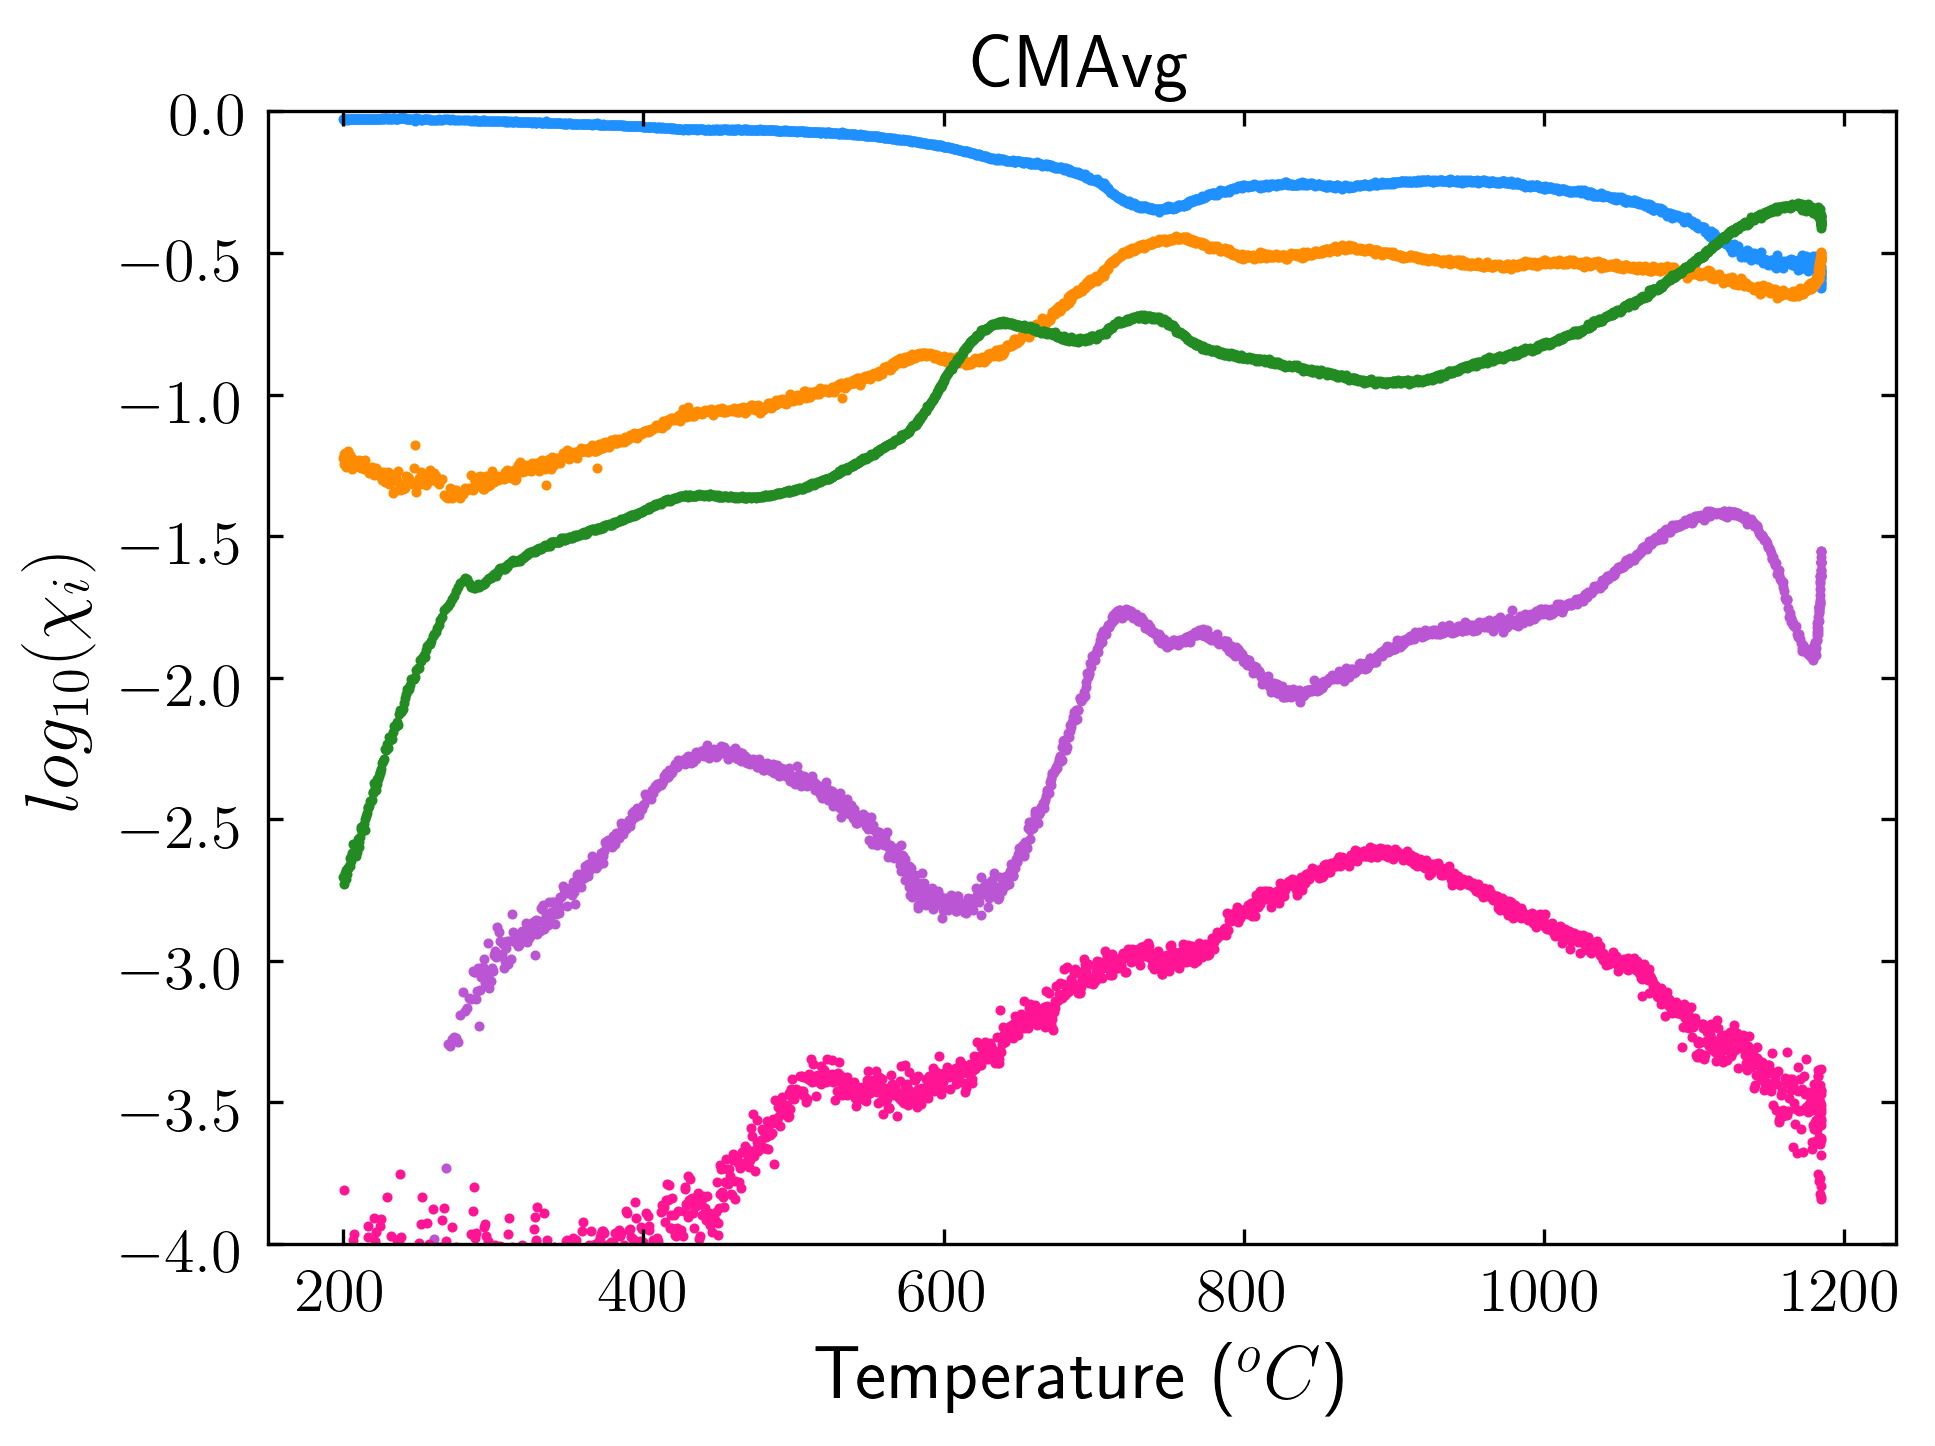

In [218]:
#NIST fragments, Original method (no adding fragments back):
#NIST Fragments:
plotlogmolefrac_prettyOG(M_X_og, 'Murchison', 'Murchison_logX_og.jpg')
plotlogmolefrac_prettyOG(W1_X_og, 'Winselwan 1', 'Winselwan1_logX_og.jpg')
plotlogmolefrac_prettyOG(W2_X_og, 'Winselwan 2', 'Winselwan2_logX_og.jpg')


plotlogmolefrac_prettyOG((W1_X_og+W2_Xinterp_og)/2, 'Winselwan', 'Winselwan_logX_og.jpg')
plotlogmolefrac_prettyOG(AZ_X_og, 'AZ', 'AZ_logX_og.jpg')
plotlogmolefrac_prettyOG(((M_X_og)+((W1_Xinterp_og+W2_Xinterp2_og)/2)+(AZ_Xinterp_og))/3, 'CMAvg', 'CMAvglogX_Corrected_og.jpg')


In [277]:
M_X_up2.to_csv('SupplementFig6_B.txt')

M_X_up.to_csv('SupplementFig6_A.txt')

/Users/maggiethompson/.pyenv/versions/anaconda3-5.2.0/lib/python3.6/site-packages/ipykernel_launcher.py:104: RuntimeWarning: divide by zero encountered in log10
/Users/maggiethompson/.pyenv/versions/anaconda3-5.2.0/lib/python3.6/site-packages/ipykernel_launcher.py:105: RuntimeWarning: divide by zero encountered in log10
/Users/maggiethompson/.pyenv/versions/anaconda3-5.2.0/lib/python3.6/site-packages/ipykernel_launcher.py:106: RuntimeWarning: divide by zero encountered in log10
/Users/maggiethompson/.pyenv/versions/anaconda3-5.2.0/lib/python3.6/site-packages/ipykernel_launcher.py:107: RuntimeWarning: divide by zero encountered in log10
/Users/maggiethompson/.pyenv/versions/anaconda3-5.2.0/lib/python3.6/site-packages/ipykernel_launcher.py:111: RuntimeWarning: divide by zero encountered in log10
/Users/maggiethompson/.pyenv/versions/anaconda3-5.2.0/lib/python3.6/site-packages/ipykernel_launcher.py:112: RuntimeWarning: divide by zero encountered in log10
/Users/maggiethompson/.pyenv/versi

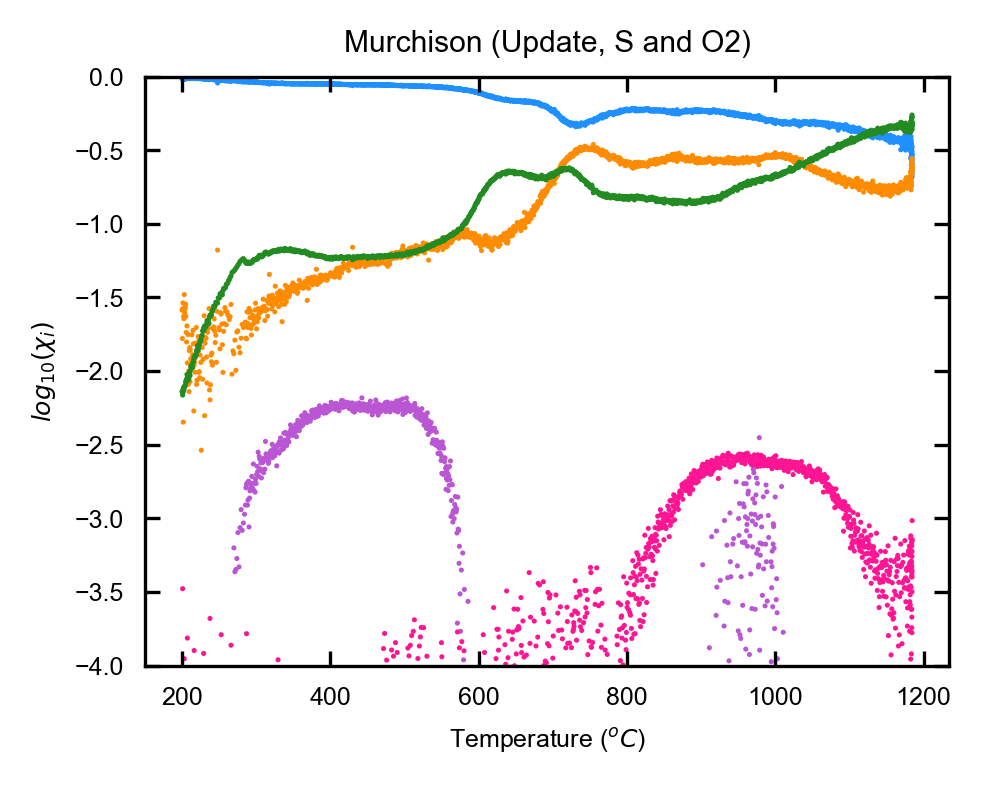

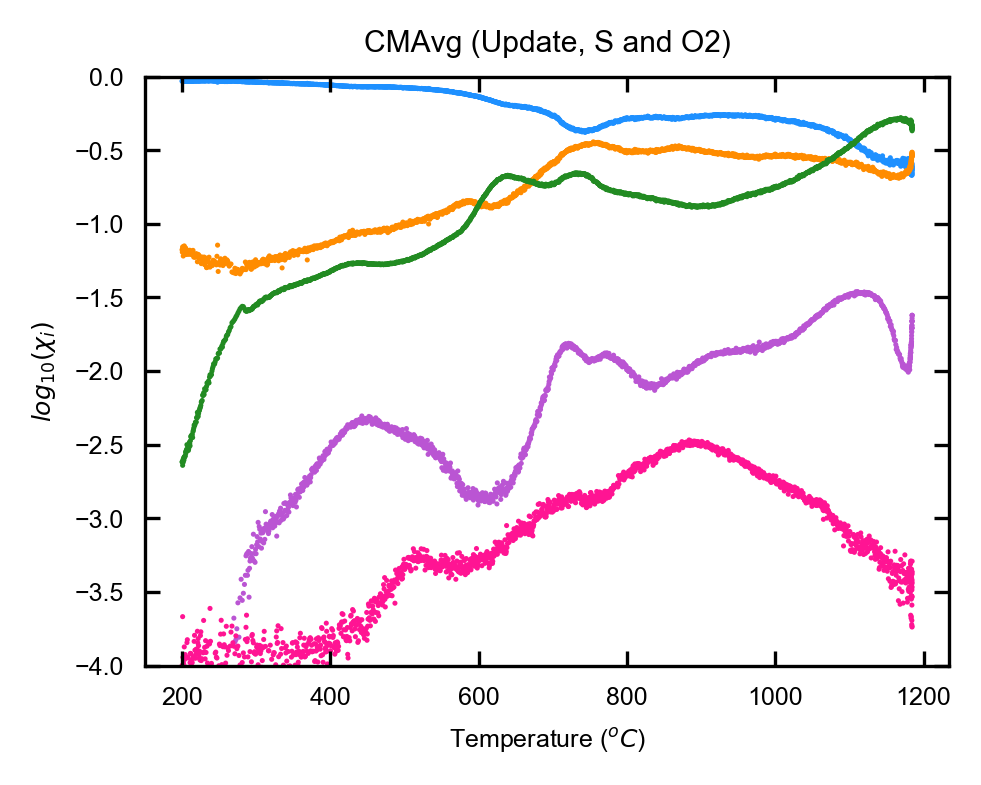

In [414]:
#NIST Fragments:
plotlogmolefrac_prettyV2(M_X_up2, 'Murchison (Update, S and O2)', 'Murchison_logX_updated_SO2.jpg')
#plotlogmolefrac_prettyV2(W1_X_up2, 'Winselwan 1 (Update, S and O2)', 'Winselwan1_logX_updated_SO2.jpg')
#plotlogmolefrac_prettyV2(W2_X_up2, 'Winselwan 2 (Update, S and O2)', 'Winselwan2_logX_updated_SO2.jpg')


#plotlogmolefrac_prettyOG((W1_X_up2+W2_Xinterp_up2)/2, 'Winselwan (Update, No Atm)', 'Winselwan_logX_updated_noatm.jpg')
#plotlogmolefrac_prettyV2(AZ_X_up2, 'AZ (Update, S and O2)', 'AZ_logX_updated_SO2.jpg')
plotlogmolefrac_prettyV2(((M_X_up2)+((W1_Xinterp_up2+W2_Xinterp2_up2)/2)+(AZ_Xinterp_up2))/3, 'CMAvg (Update, S and O2)', 'CMAvglogX_Corrected_updated_SO2.jpg')


In [418]:
def plotlogmolefraccum(file, title, title2):
    fig, ax = plt.subplots()
    plt.scatter(file.T_interp_C, np.log10(np.cumsum(file.H2)), marker='o',s=1.5, edgecolors='none', color='mediumorchid', label=r'H$_2$')
    plt.scatter(file.T_interp_C, np.log10(np.cumsum(file.C)), marker='o', s=1.5, edgecolors='none', color='lime', label=r'C corrected')
    plt.scatter(file.T_interp_C, np.log10(np.cumsum(file.N)), marker='o', s=1.5, edgecolors='none', color='navy', label=r'N corrected')
    plt.scatter(file.T_interp_C, np.log10(np.cumsum(file.CH4)), marker='o', s=1.5, edgecolors='none', color='red', label=r'CH$_4$ corrected')
    plt.scatter(file.T_interp_C, np.log10(np.cumsum(file.O)), marker='o',s=1.5, edgecolors='none', color='yellow', label=r'O corrected')
    plt.scatter(file.T_interp_C, np.log10(np.cumsum(file.H2O)), marker='o', s=1.5, edgecolors='none', color='dodgerblue', label=r'H$_2$O')
    plt.scatter(file.T_interp_C, np.log10(np.cumsum(file.N2)), marker='o', s=1.5, edgecolors='none', color='magenta', label=r'N2')
    plt.scatter(file.T_interp_C, np.log10(np.cumsum(file.CO)), marker='o', s=1.5, edgecolors='none', color='darkorange', label=r'CO')
    #plt.scatter(file.T_interp_C, np.log10(np.cumsum(file.S_O2)), marker='o', alpha=0.5, s=2, color='gold', label=r'S or O$_2$')
    plt.scatter(file.T_interp_C, np.log10(np.cumsum(file.O2)), marker='o', alpha=0.5, s=1.5, edgecolors='none', color='goldenrod', label=r'O$_2$')
    plt.scatter(file.T_interp_C, np.log10(np.cumsum(file.S)), marker='o', alpha=0.5, s=1.5, edgecolors='none', color='gold', label=r'S')

    plt.scatter(file.T_interp_C, np.log10(np.cumsum(file.H2S)), marker='o', s=1.5, edgecolors='none', color='deeppink', label=r'H$_2$S')
    plt.scatter(file.T_interp_C, np.log10(np.cumsum(file.Ar)), marker='o', s=1.5, edgecolors='none', color='purple', label=r'NaOH')
    plt.scatter(file.T_interp_C, np.log10(np.cumsum(file.CO2)), marker='o', s=1.5, edgecolors='none', color='forestgreen', label=r'CO$_2$')
    #plt.yscale('log')
    ax.tick_params(which='both', top=True, right=True)
    plt.ylim(-4, 4)
    plt.xlim(150, 1250)
    plt.xlabel(r'Temperature ($^oC$)')
    plt.ylabel(r'$log_{10}(\chi_{i})$')
    plt.title(title)
    #plt.legend(fontsize='small', loc=4)
    #plt.savefig(title2, dpi=1000)
    plt.show()
    
def plotlogmolefraccum_og(file, title, title2):
    fig, ax = plt.subplots()
    plt.scatter(file.T_interp_C, np.log10(np.cumsum(file.H2)), marker='o',s=1.5, edgecolors='none', color='mediumorchid', label=r'H$_2$')
    plt.scatter(file.T_interp_C, np.log10(np.cumsum(file.C)), marker='o', s=1.5, edgecolors='none', color='lime', label=r'C corrected')
    plt.scatter(file.T_interp_C, np.log10(np.cumsum(file.N)), marker='o', s=1.5, edgecolors='none', color='navy', label=r'N corrected')
    plt.scatter(file.T_interp_C, np.log10(np.cumsum(file.CH4)), marker='o', s=1.5, edgecolors='none',color='red', label=r'CH$_4$ corrected')
    #plt.scatter(file.T_interp_C, np.log10(np.cumsum(file.O)), marker='o', s=2, color='yellow', label=r'O corrected')
    plt.scatter(file.T_interp_C, np.log10(np.cumsum(file.H2O)), marker='o', s=1.5, edgecolors='none', color='dodgerblue', label=r'H$_2$O')
    plt.scatter(file.T_interp_C, np.log10(np.cumsum(file.N2)), marker='o', s=1.5, edgecolors='none', color='magenta', label=r'N2')
    plt.scatter(file.T_interp_C, np.log10(np.cumsum(file.CO)), marker='o', s=1.5, edgecolors='none', color='darkorange', label=r'CO')
    plt.scatter(file.T_interp_C, np.log10(np.cumsum(file.S_O2)), marker='o', alpha=0.5,s=1.5, edgecolors='none', color='gold', label=r'S or O$_2$')
    #plt.scatter(file.T_interp_C, np.log10(np.cumsum(file.O2)), marker='o', alpha=0.5, s=2, color='goldenrod', label=r'O$_2$')
    #plt.scatter(file.T_interp_C, np.log10(np.cumsum(file.S)), marker='o', alpha=0.5, s=2, color='gold', label=r'S')

    plt.scatter(file.T_interp_C, np.log10(np.cumsum(file.H2S)), marker='o',s=1.5, edgecolors='none', color='deeppink', label=r'H$_2$S')
    plt.scatter(file.T_interp_C, np.log10(np.cumsum(file.NaOH)), marker='o', s=1.5, edgecolors='none', color='purple', label=r'NaOH')
    plt.scatter(file.T_interp_C, np.log10(np.cumsum(file.CO2)), marker='o', s=1.5, edgecolors='none', color='forestgreen', label=r'CO$_2$')
    #plt.yscale('log')
    ax.tick_params(which='both', top=True, right=True)
    plt.ylim(-4, 4)
    plt.xlim(150, 1250)
    plt.xlabel(r'Temperature ($^oC$)')
    plt.ylabel(r'$log_{10}(\chi_{i})$')
    plt.title(title)
    #plt.legend(fontsize='small', loc=4)
    plt.savefig(title2, dpi=1000)
    plt.show()
    

In [28]:
M_X_up.to_csv('SupplementFig7_A.txt')
W_X_up.to_csv('SupplementFig7_B.txt')
AZ_X_up.to_csv('SupplementFig7_C.txt')
CMavg_X_up_interp = ((M_X_up)+((W1_Xinterp_up+W2_Xinterp2_up)/2)+(AZ_Xinterp_up))/3
CMavg_X_up_interp.to_csv('SupplementFig7_D.txt')

/Users/maggiethompson/.pyenv/versions/anaconda3-5.2.0/lib/python3.6/site-packages/ipykernel_launcher.py:31: RuntimeWarning: divide by zero encountered in log10
/Users/maggiethompson/.pyenv/versions/anaconda3-5.2.0/lib/python3.6/site-packages/ipykernel_launcher.py:32: RuntimeWarning: divide by zero encountered in log10
/Users/maggiethompson/.pyenv/versions/anaconda3-5.2.0/lib/python3.6/site-packages/ipykernel_launcher.py:33: RuntimeWarning: divide by zero encountered in log10
/Users/maggiethompson/.pyenv/versions/anaconda3-5.2.0/lib/python3.6/site-packages/ipykernel_launcher.py:34: RuntimeWarning: divide by zero encountered in log10
/Users/maggiethompson/.pyenv/versions/anaconda3-5.2.0/lib/python3.6/site-packages/ipykernel_launcher.py:37: RuntimeWarning: divide by zero encountered in log10
/Users/maggiethompson/.pyenv/versions/anaconda3-5.2.0/lib/python3.6/site-packages/ipykernel_launcher.py:39: RuntimeWarning: divide by zero encountered in log10
/Users/maggiethompson/.pyenv/versions/an

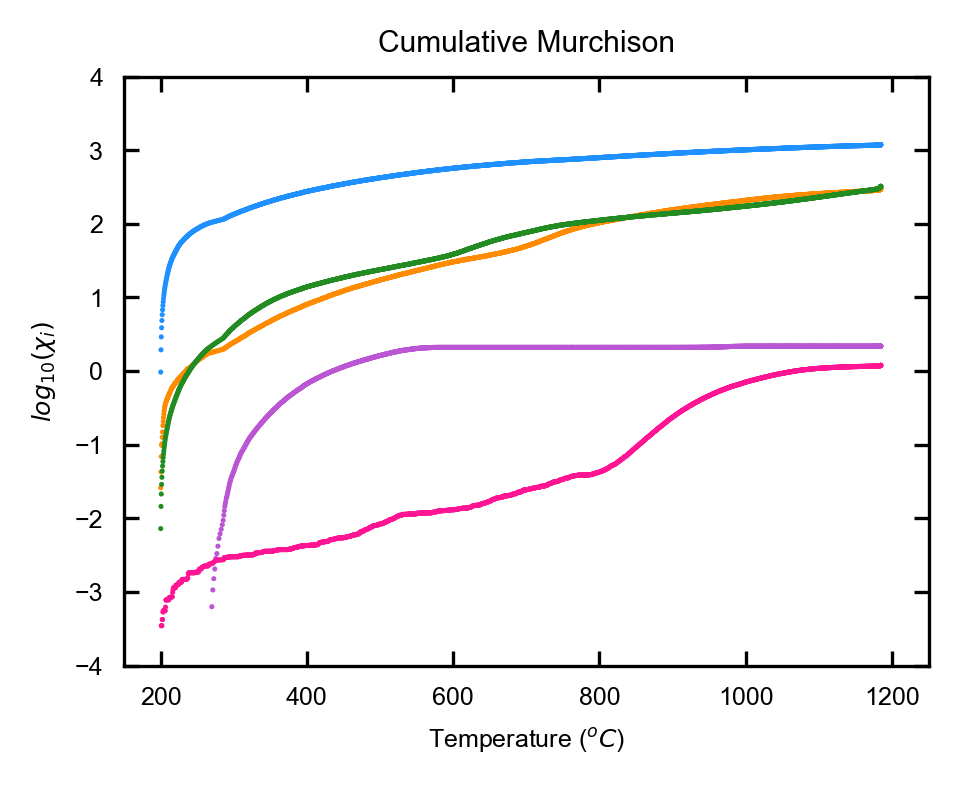

/Users/maggiethompson/.pyenv/versions/anaconda3-5.2.0/lib/python3.6/site-packages/ipykernel_launcher.py:45: RuntimeWarning: divide by zero encountered in log10


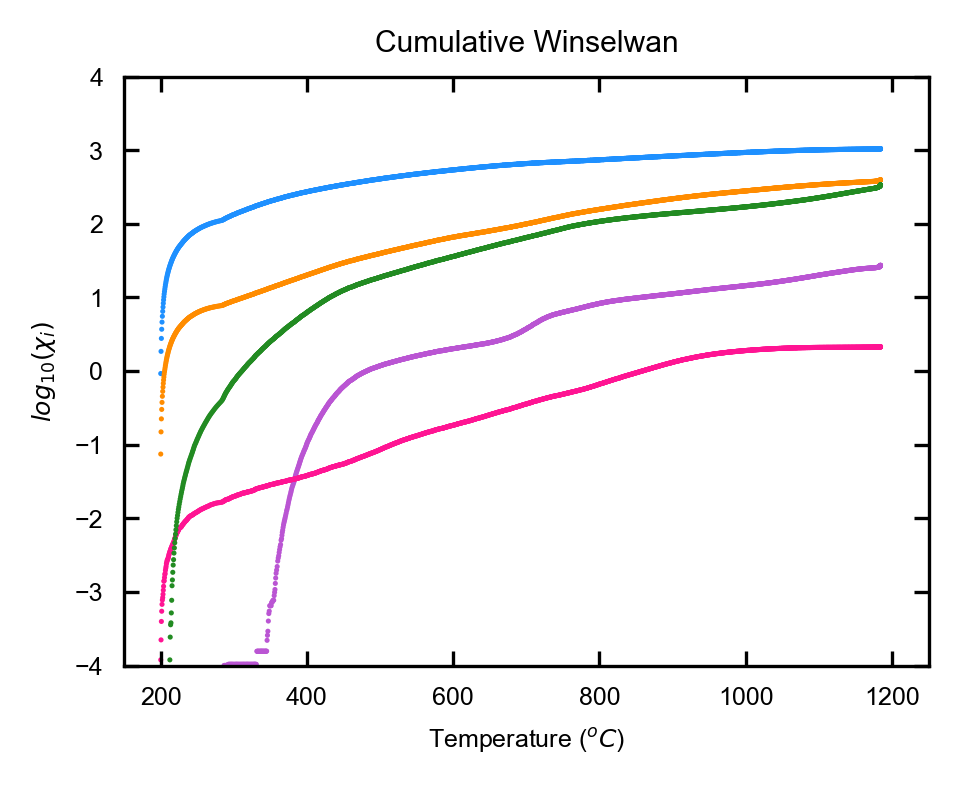

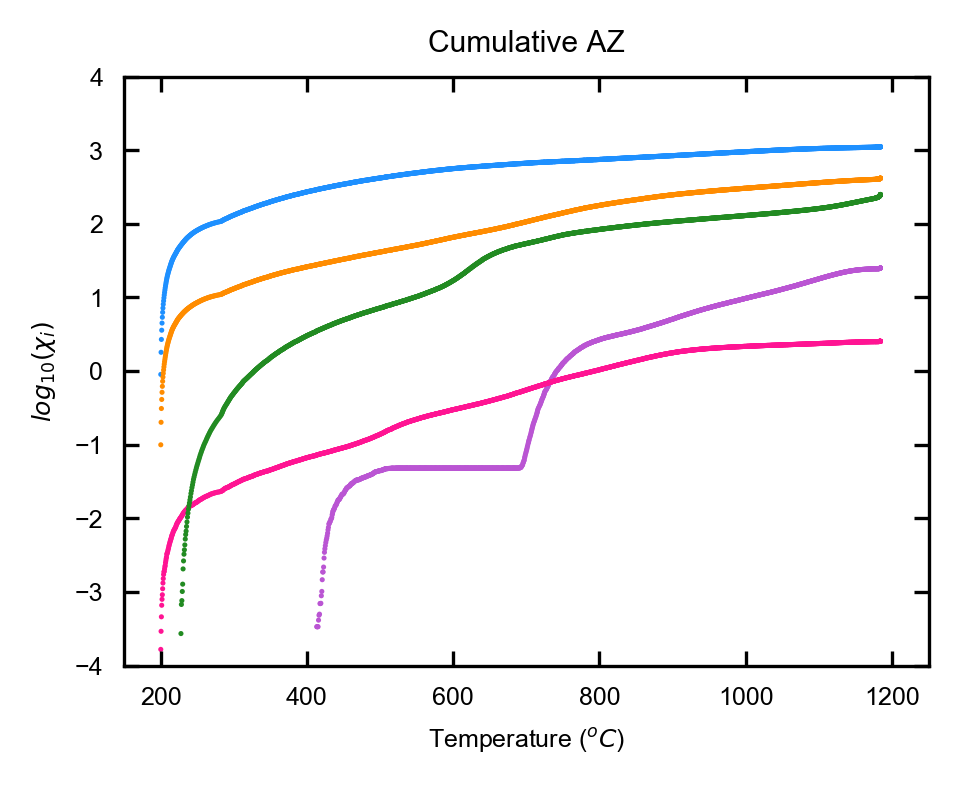

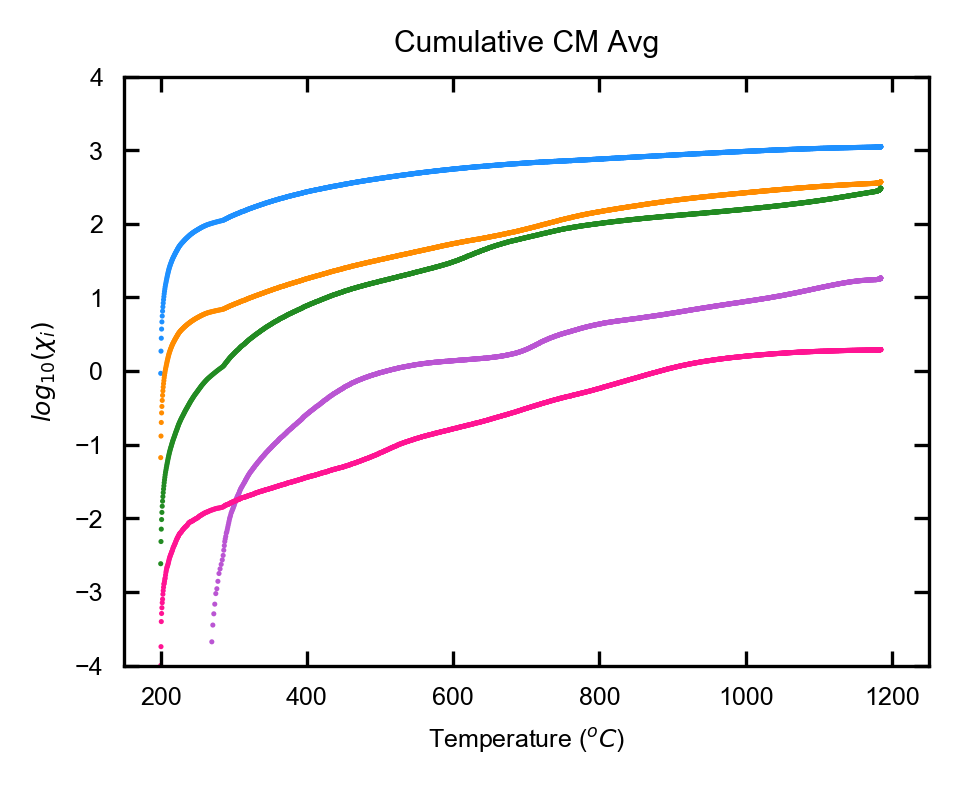

In [419]:
plotlogmolefraccum_og(M_X_up, 'Cumulative Murchison', 'Murchison_logXcum_update.jpg')
plotlogmolefraccum_og((W1_X_up+W2_Xinterp_up)/2, 'Cumulative Winselwan', 'W_logXcum_update.jpg')
plotlogmolefraccum_og(AZ_X_up, 'Cumulative AZ', 'AZ_logXcum_update.jpg')
plotlogmolefraccum_og(((M_X_up)+((W1_Xinterp_up+W2_Xinterp2_up)/2)+(AZ_Xinterp_up))/3, 'Cumulative CM Avg', 'CMAvg_logXcum_update.jpg')

#plotlogmolefraccum_og(M_X_rga, 'Cumulative Murchison (RGA)', 'Murchison_logXcum_update_rga.jpg')
#plotlogmolefraccum_og((W1_X_rga+W2_Xinterp_rga)/2, 'Cumulative Winselwan (RGA)', 'W_logXcum_update_rga.jpg')
#plotlogmolefraccum_og(AZ_X_rga, 'Cumulative AZ (RGA)', 'AZ_logXcum_update_rga.jpg')
#plotlogmolefraccum_og(((M_X_rga)+((W1_Xinterp_rga+W2_Xinterp2_rga)/2)+(AZ_Xinterp_rga))/3, 'Cumulative CM Avg (RGA)', 'CMAvg_logXcum_update_rga.jpg')



### Bulk Elemental Abundances

In [422]:
import matplotlib.ticker as plticker
def plotlogmolefrac_pretty_bulkabundX(file1, file2, file3, title, title2):
    fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, sharex=True)
    ax1.scatter(file1.T_interp_C, file1.C_tot/file1.O_tot, marker='o',s=1, edgecolors='none', color='dodgerblue', label=r'Murchison')
    ax1.scatter(file2.T_interp_C, file2.C_tot/file2.O_tot, marker='o', s=1, edgecolors='none', color='darkorchid', label=r'Winselwan')
    ax1.scatter(file3.T_interp_C, file3.C_tot/file3.O_tot, marker='o', s=1, edgecolors='none', color='darkorange', label=r'Aguas Zarcas')
    #ax1.set_ylim(0, 0.5)
    ax1.tick_params(which='both', top=True, right=True)
    ax1.yaxis.set_ticks(np.arange(0, 0.6, 0.25))

    ax2.scatter(file1.T_interp_C, file1.H_tot/file1.C_tot, marker='o',s=1, edgecolors='none', color='dodgerblue', label=r'Murchison')
    ax2.scatter(file2.T_interp_C, file2.H_tot/file2.C_tot, marker='o', s=1, edgecolors='none', color='darkorchid', label=r'Winselwan')
    ax2.scatter(file3.T_interp_C, file3.H_tot/file3.C_tot, marker='o', s=1, edgecolors='none', color='darkorange', label=r'Aguas Zarcas')
    ax2.set_ylim(-1,50)
    ax2.tick_params(which='both', top=True, right=True)
    ax2.yaxis.set_ticks(np.arange(0, 51, 25))
    
    ax3.scatter(file1.T_interp_C, file1.S_tot/file1.O_tot, marker='o',s=1, edgecolors='none', color='dodgerblue', label=r'Murchison')
    ax3.scatter(file2.T_interp_C, file2.S_tot/file2.O_tot, marker='o', s=1, edgecolors='none', color='darkorchid', label=r'Winselwan')
    ax3.scatter(file3.T_interp_C, file3.S_tot/file3.O_tot, marker='o', s=1, edgecolors='none', color='darkorange', label=r'Aguas Zarcas')
    #ax3.set_ylim(0.0,0.0051)
    ax3.set_ylabel(r'$\chi_{i}$')
    ax3.tick_params(which='both', top=True, right=True)
    ax3.yaxis.set_ticks(np.arange(0, 0.0051, 0.0025))

    ax4.scatter(file1.T_interp_C, file1.H_tot/file1.O_tot, marker='o',s=1, edgecolors='none', color='dodgerblue', label=r'Murchison')
    ax4.scatter(file2.T_interp_C, file2.H_tot/file2.O_tot, marker='o', s=1, edgecolors='none', color='darkorchid', label=r'Winselwan')
    ax4.scatter(file3.T_interp_C, file3.H_tot/file3.O_tot, marker='o', s=1, edgecolors='none', color='darkorange', label=r'Aguas Zarcas')
    #ax4.set_ylim(0,0.25)
    ax4.tick_params(which='both', top=True, right=True)
    ax4.yaxis.set_ticks(np.arange(0, 2.1, 1.0))

    plt.xlabel(r'Temperature ($^o$C)')
    plt.savefig(title2, dpi=1000)
    plt.show()

In [468]:
M_X_up.to_csv('Fig2_Murchison.csv')
W_X_up.to_csv('Fig2_Winselwan.csv')
AZ_X_up.to_csv('Fig2_AZ.csv')
 


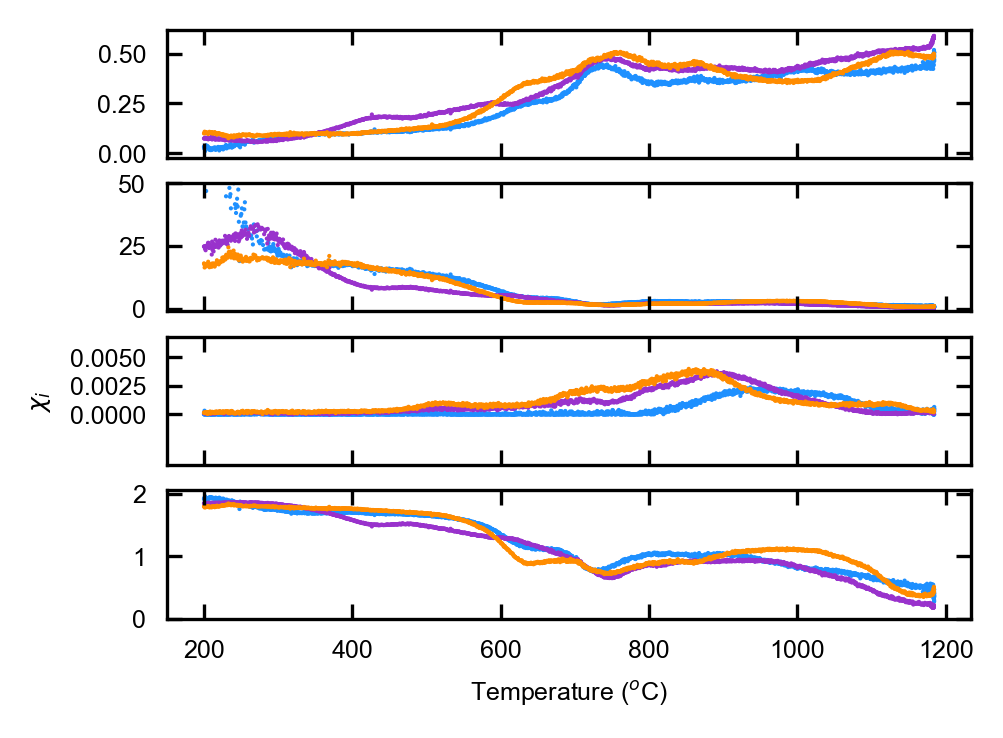

In [423]:
plotlogmolefrac_pretty_bulkabundX(M_X_up, ((W1_X_up+W2_Xinterp_up)/2), AZ_X_up, 'Trial', 'BulkAbunds_updated.jpg')




## Relative Abundances (Mole Fraction Summed over Temperature)

In [29]:
def calctotalX(file):
    total_X = np.sum(file.H2) + np.sum(file.C) + np.sum(file.N) + np.sum(file.CH4) + np.sum(file.H2O) + np.sum(file.CO) + np.sum(file.N2) + np.sum(file.S_O2) + np.sum(file.H2S) + np.sum(file.NaOH) + np.sum(file.CO2)
    H2 = np.sum(file.H2)/total_X
    C = np.sum(file.C)/total_X
    N = np.sum(file.N)/total_X
    CH4 = np.sum(file.CH4)/total_X
    H2O = np.sum(file.H2O)/total_X
    N2 = np.sum(file.N2)/total_X
    CO = np.sum(file.CO)/total_X
    S_O2 = np.sum(file.S_O2)/total_X
    H2S = np.sum(file.H2S)/total_X
    NaOH = np.sum(file.NaOH)/total_X
    CO2 = np.sum(file.CO2)/total_X
    TotH = np.sum(file.H_tot)/total_X
    TotC = np.sum(file.C_tot)/total_X
    TotO = np.sum(file.O_tot)/total_X
    TotN = np.sum(file.N_tot)/total_X
    TotS = np.sum(file.S_tot)/total_X
    TotHv2 = np.sum(file.H_totv2)/total_X
    TotCv2 = np.sum(file.C_totv2)/total_X
    TotOv2 = np.sum(file.O_totv2)/total_X
    TotNv2 = np.sum(file.N_totv2)/total_X
    TotSv2 = np.sum(file.S_totv2)/total_X
    d = {'TotalX': [total_X], 'H2': [H2], 'C': [C], 'N': [N], 'CH4': [CH4], 'H2O': [H2O], 'N2': [N2], 'CO': [CO], 'S_O2': [S_O2], 'H2S': [H2S], 'NaOH': [NaOH], 'CO2': [CO2], 'Total_H': [TotH], 'Total_C': [TotC], 'Total_O': [TotO], 'Total_N': [TotN], 'Total_S': [TotS], 'Total_Cv2': [TotCv2], 'Total_Hv2': [TotHv2], 'Total_Ov2': [TotOv2], 'Total_Sv2': [TotSv2], 'Total_Nv2': [TotNv2]}
    df = pd.DataFrame(data=d)
    return df


def calctotalX_lsq(file):
    total_X = np.sum(file.H2) + np.sum(file.C) + np.sum(file.N) + np.sum(file.CH4) + np.sum(file.O) + np.sum(file.H2O) + np.sum(file.CO) + np.sum(file.N2) + np.sum(file.S) + np.sum(file.O2) + np.sum(file.H2S) + np.sum(file.Ar) + np.sum(file.CO2)
    H2 = np.sum(file.H2)/total_X
    C = np.sum(file.C)/total_X
    N = np.sum(file.N)/total_X
    CH4 = np.sum(file.CH4)/total_X
    O = np.sum(file.O)/total_X
    H2O = np.sum(file.H2O)/total_X
    N2 = np.sum(file.N2)/total_X
    CO = np.sum(file.CO)/total_X
    S = np.sum(file.S)/total_X
    O2 = np.sum(file.O2)/total_X
    H2S = np.sum(file.H2S)/total_X
    Ar = np.sum(file.Ar)/total_X
    CO2 = np.sum(file.CO2)/total_X
    TotH = np.sum(file.H_tot)/total_X
    TotC = np.sum(file.C_tot)/total_X
    TotO = np.sum(file.O_tot)/total_X
    TotN = np.sum(file.N_tot)/total_X
    TotS = np.sum(file.S_tot)/total_X
    TotHv2 = np.sum(file.H_totv2)/total_X
    TotCv2 = np.sum(file.C_totv2)/total_X
    TotOv2 = np.sum(file.O_totv2)/total_X
    TotNv2 = np.sum(file.N_totv2)/total_X
    TotSv2 = np.sum(file.S_totv2)/total_X
    d = {'TotalX': [total_X], 'H2': [H2], 'C': [C], 'N': [N], 'CH4': [CH4], 'O':[O], 'H2O': [H2O], 'N2': [N2], 'CO': [CO], 'S': [S], 'O2':[O2], 'H2S': [H2S], 'Ar': [Ar], 'CO2': [CO2], 'Total_H': [TotH], 'Total_C': [TotC], 'Total_O': [TotO], 'Total_N': [TotN], 'Total_S': [TotS], 'Total_Cv2': [TotCv2], 'Total_Hv2': [TotHv2], 'Total_Ov2': [TotOv2], 'Total_Sv2': [TotSv2], 'Total_Nv2': [TotNv2]}
    df = pd.DataFrame(data=d)
    return df

In [30]:
## Relative Abundances using Partial Pressure instead of Mole Fraction

def calctotalP(file):
    total_P = file.H2 + file.C + file.N + file.CH4 + file.H2O + file.CO + file.N2 + file.S_O2 + file.H2S + file.KH_NaOH + file.CO2
    H2 = np.sum(file.H2)/np.sum(total_P)
    C = np.sum(file.C)/np.sum(total_P)
    N = np.sum(file.N)/np.sum(total_P)
    CH4 = np.sum(file.CH4)/np.sum(total_P)
    H2O = np.sum(file.H2O)/np.sum(total_P)
    N2 = np.sum(file.N2)/np.sum(total_P)
    CO = np.sum(file.CO)/np.sum(total_P)
    S_O2 = np.sum(file.S_O2)/np.sum(total_P)
    H2S = np.sum(file.H2S)/np.sum(total_P)
    NaOH = np.sum(file.KH_NaOH)/np.sum(total_P)
    CO2 = np.sum(file.CO2)/np.sum(total_P)
    H_tot = (2.0*file.H2) + (2.0*file.H2O) + (4.0*file.CH4)+(2.0*file.H2S)
    C_tot = (file.CO2) + (file.CH4) +(file.C)+(file.CO)
    O_tot = (2.0*file.CO2)+(file.CO)+(file.H2O)
    N_tot = file.N + (2*file.N2)
    S_tot = file.H2S + file.S_O2
    Norm = H_tot+C_tot+O_tot+N_tot+S_tot
    TotH = np.sum(H_tot)/np.sum(Norm)
    TotC = np.sum(C_tot)/np.sum(Norm)
    TotO = np.sum(O_tot)/np.sum(Norm)
    TotN = np.sum(N_tot)/np.sum(Norm)
    TotS = np.sum(S_tot)/np.sum(Norm)
    #TotHv2 = np.sum(file.H_totv2)/total_P
    #TotCv2 = np.sum(file.C_totv2)/total_P
    #TotOv2 = np.sum(file.O_totv2)/total_P
    #TotNv2 = np.sum(file.N_totv2)/total_P
    #TotSv2 = np.sum(file.S_totv2)/total_P
    d = {'TotalP': [np.sum(total_P)], 'H2': [H2], 'C': [C], 'N': [N], 'CH4': [CH4], 'H2O': [H2O], 'N2': [N2], 'CO': [CO], 'S_O2': [S_O2], 'H2S': [H2S], 'NaOH': [NaOH], 'CO2': [CO2], 'Total_H':[TotH], 'Total_C':[TotC], 'Total_O':[TotO], 'Total_N':[TotN], 'Total_S':[TotS]}
    df = pd.DataFrame(data=d)
    return df

def calctotalP_v2(file):
    total_P = np.sum(file.H2) + np.sum(file.C) + np.sum(file.N) + np.sum(file.CH4) + np.sum(file.H2O) + np.sum(file.CO) + np.sum(file.N2) + np.sum(file.S_O2) + np.sum(file.H2S) + np.sum(file.KH_NaOH) + np.sum(file.CO2)
    H2 = np.sum(file.H2)/total_P
    C = np.sum(file.C)/total_P
    N = np.sum(file.N)/total_P
    CH4 = np.sum(file.CH4)/total_P
    H2O = np.sum(file.H2O)/total_P
    N2 = np.sum(file.N2)/total_P
    CO = np.sum(file.CO)/total_P
    S_O2 = np.sum(file.S_O2)/total_P
    H2S = np.sum(file.H2S)/total_P
    NaOH = np.sum(file.KH_NaOH)/total_P
    CO2 = np.sum(file.CO2)/total_P
    H_tot = (2.0*file.H2) + (2.0*file.H2O) + (4.0*file.CH4)+(2.0*file.H2S)
    C_tot = (file.CO2) + (file.CH4) +(file.C)+(file.CO)
    O_tot = (2.0*file.CO2)+(file.CO)+(file.H2O)
    N_tot = file.N + (2.0*file.N2)
    S_tot = file.H2S + file.S_O2
    Norm = H_tot+C_tot+O_tot+N_tot+S_tot
    TotH = np.sum(H_tot)/np.sum(Norm)
    TotC = np.sum(C_tot)/np.sum(Norm)
    TotO = np.sum(O_tot)/np.sum(Norm)
    TotN = np.sum(N_tot)/np.sum(Norm)
    TotS = np.sum(S_tot)/np.sum(Norm)
    #TotHv2 = np.sum(file.H_totv2)/total_P
    #TotCv2 = np.sum(file.C_totv2)/total_P
    #TotOv2 = np.sum(file.O_totv2)/total_P
    #TotNv2 = np.sum(file.N_totv2)/total_P
    #TotSv2 = np.sum(file.S_totv2)/total_P
    d = {'TotalP': [total_P], 'H2': [H2], 'C': [C], 'N': [N], 'CH4': [CH4], 'H2O': [H2O], 'N2': [N2], 'CO': [CO], 'S_O2': [S_O2], 'H2S': [H2S], 'NaOH': [NaOH], 'CO2': [CO2], 'Total_H':[TotH], 'Total_C':[TotC], 'Total_O':[TotO], 'Total_N':[TotN], 'Total_S':[TotS]}
    df = pd.DataFrame(data=d)
    return df

In [31]:
M_Ptot = calctotalP(M_partialP_U)
W1_Ptot = calctotalP(W1_partialP_U)
W2_Ptot = calctotalP(W2_partialP_U)
AZ_Ptot = calctotalP(AZ_partialP_U)

W_Ptot = (W1_Ptot + W2_Ptot)/2.0


CMavg_Ptot = (M_Ptot + W_Ptot + AZ_Ptot)/3.0



In [36]:
#Calculate relative abundances summed over temperature, with mole fractions
M_Xtot_up = calctotalX(M_X_up)
W1_Xtot_up = calctotalX(W1_X_up)
W2_Xtot_up = calctotalX(W2_X_up)
W_Xtot_up = (W1_Xtot_up + W2_Xtot_up)/2.0
AZ_Xtot_up = calctotalX(AZ_X_up)

CMavg_Xtot_up = (M_Xtot_up + W_Xtot_up + AZ_Xtot_up)/3.0

#Using Least Squares Results (NIST fragments)
M_Xtot = calctotalX_lsq(M_X)
W1_Xtot = calctotalX_lsq(W1_X)
W2_Xtot = calctotalX_lsq(W2_X)
W_Xtot = (W1_Xtot + W2_Xtot)/2.0
AZ_Xtot = calctotalX_lsq(AZ_X)

CMavg_Xtot_lsq = (M_Xtot + W_Xtot + AZ_Xtot)/3.0



In [133]:
#Print Results
print('MURCHISON:')
display(M_Xtot_up*100)
print('H2S:', (M_Xtot_up.H2S)*100)
print('CO2:', (M_Xtot_up.CO2)*100)
print('Murchison Sum:', (M_Xtot_up.H2 + M_Xtot_up.C + M_Xtot_up.N + M_Xtot_up.CH4 + M_Xtot_up.H2O+M_Xtot_up.N2 + M_Xtot_up.CO + M_Xtot_up.S_O2 + M_Xtot_up.H2S+M_Xtot_up.NaOH+M_Xtot_up.CO2))
print('Murchison Elemental Sum:', (M_Xtot_up.Total_H + M_Xtot_up.Total_C + M_Xtot_up.Total_O + M_Xtot_up.Total_N + M_Xtot_up.Total_S))
print('')
print('WINSELWAN 1:')
display(W1_Xtot_up*100)
print('')
print('WINSELWAN 2:')
display(W2_Xtot_up*100)
print('WINSELWAN:')
display(W_Xtot_up*100)
print('H2S:', (W_Xtot_up.H2S)*100)
print('CO2:', (W_Xtot_up.CO2)*100)
print('Winselwan Sum:', (W_Xtot_up.H2 + W_Xtot_up.C + W_Xtot_up.N + W_Xtot_up.CH4 + W_Xtot_up.H2O+W_Xtot_up.N2 + W_Xtot_up.CO + W_Xtot_up.S_O2 + W_Xtot_up.H2S+W_Xtot_up.NaOH+W_Xtot_up.CO2))
print('Winselwan Elemental Sum:', (W_Xtot_up.Total_H + W_Xtot_up.Total_C + W_Xtot_up.Total_O + W_Xtot_up.Total_N + W_Xtot_up.Total_S))
print('')
print('AGUAS ZARCAS:')
display(AZ_Xtot_up*100)
print('H2S:', (AZ_Xtot_up.H2S)*100)
print('CO2:', (AZ_Xtot_up.CO2)*100) 
print('AZ Sum:', (AZ_Xtot_up.H2 + AZ_Xtot_up.C + AZ_Xtot_up.N + AZ_Xtot_up.CH4 + AZ_Xtot_up.H2O+AZ_Xtot_up.N2 + AZ_Xtot_up.CO + AZ_Xtot_up.S_O2 + AZ_Xtot_up.H2S+AZ_Xtot_up.NaOH+AZ_Xtot_up.CO2))
print('AZ Elemental Sum:', (AZ_Xtot_up.Total_H + AZ_Xtot_up.Total_C + AZ_Xtot_up.Total_O + AZ_Xtot_up.Total_N + AZ_Xtot_up.Total_S))
print('')
print('CM AVERAGE:')
display(((M_Xtot_up + W_Xtot_up + AZ_Xtot_up)/3.0)*100)
print('CO2:', ((M_Xtot_up.CO2 + W_Xtot_up.CO2 + AZ_Xtot_up.CO2)/3.0)*100)



MURCHISON:


TotalX        H2    C    N  CH4        H2O   N2         CO  S_O2  \
0  181500.0  0.120023  0.0  0.0  0.0  65.594908  0.0  16.393465   0.0   

        H2S    ...        Total_H    Total_C    Total_O  Total_N   Total_S  \
0  0.065797    ...      46.067804  12.286077  41.622152      0.0  0.023967   

   Total_Cv2  Total_Hv2  Total_Ov2  Total_Sv2  Total_Nv2  
0  12.286077  46.067804  41.622152   0.023967        0.0  

[1 rows x 22 columns]

H2S: 0    0.065797
Name: H2S, dtype: float64
CO2: 0    17.825807
Name: CO2, dtype: float64
Murchison Sum: 0    1.0
dtype: float64
Murchison Elemental Sum: 0    1.0
dtype: float64

WINSELWAN 1:


TotalX        H2    C    N  CH4        H2O   N2         CO  S_O2  \
0  181400.0  0.026251  0.0  0.0  0.0  58.058393  0.0  22.633878   0.0   

        H2S    ...       Total_H   Total_C    Total_O  Total_N   Total_S  \
0  0.085529    ...      41.53443  15.35009  43.083667      0.0  0.031813   

   Total_Cv2  Total_Hv2  Total_Ov2  Total_Sv2  Total_Nv2  
0   15.35009   41.53443  43.083667   0.031813        0.0  

[1 rows x 22 columns]


WINSELWAN 2:


TotalX        H2    C    N  CH4        H2O   N2         CO  S_O2  \
0  180400.0  3.002489  0.0  0.0  0.0  57.688986  0.0  21.146945   0.0   

        H2S    ...        Total_H    Total_C   Total_O  Total_N   Total_S  \
0  0.150977    ...      43.521354  14.562973  41.85981      0.0  0.055863   

   Total_Cv2  Total_Hv2  Total_Ov2  Total_Sv2  Total_Nv2  
0  14.562973  43.521354   41.85981   0.055863        0.0  

[1 rows x 22 columns]

WINSELWAN:


TotalX       H2    C    N  CH4        H2O   N2         CO  S_O2  \
0  180900.0  1.51437  0.0  0.0  0.0  57.873689  0.0  21.890412   0.0   

        H2S    ...        Total_H    Total_C    Total_O  Total_N   Total_S  \
0  0.118253    ...      42.527892  14.956531  42.471739      0.0  0.043838   

   Total_Cv2  Total_Hv2  Total_Ov2  Total_Sv2  Total_Nv2  
0  14.956531  42.527892  42.471739   0.043838        0.0  

[1 rows x 22 columns]

H2S: 0    0.118253
Name: H2S, dtype: float64
CO2: 0    18.603276
Name: CO2, dtype: float64
Winselwan Sum: 0    1.0
dtype: float64
Winselwan Elemental Sum: 0    1.0
dtype: float64

AGUAS ZARCAS:


TotalX       H2    C    N  CH4        H2O   N2         CO  S_O2  \
0  181300.0  1.38811  0.0  0.0  0.0  61.612724  0.0  23.028366   0.0   

        H2S    ...        Total_H    Total_C   Total_O  Total_N   Total_S  \
0  0.139913    ...      45.394735  13.656365  40.89665      0.0  0.052251   

   Total_Cv2  Total_Hv2  Total_Ov2  Total_Sv2  Total_Nv2  
0  13.656365  45.394735   40.89665   0.052251        0.0  

[1 rows x 22 columns]

H2S: 0    0.139913
Name: H2S, dtype: float64
CO2: 0    13.830888
Name: CO2, dtype: float64
AZ Sum: 0    1.0
dtype: float64
AZ Elemental Sum: 0    1.0
dtype: float64

CM AVERAGE:


TotalX        H2    C    N  CH4        H2O   N2         CO  S_O2  \
0  181233.333333  1.007501  0.0  0.0  0.0  61.693774  0.0  20.437414   0.0   

        H2S    ...        Total_H    Total_C    Total_O  Total_N   Total_S  \
0  0.107988    ...      44.663477  13.632991  41.663513      0.0  0.040019   

   Total_Cv2  Total_Hv2  Total_Ov2  Total_Sv2  Total_Nv2  
0  13.632991  44.663477  41.663513   0.040019        0.0  

[1 rows x 22 columns]

CO2: 0    16.753324
Name: CO2, dtype: float64


In [173]:
print('MURCHISON:')
display(M_Ptot*100)
print('Murchison Sum:', (M_Ptot.H2 + M_Ptot.C + M_Ptot.N + M_Ptot.CH4 + M_Ptot.H2O+M_Ptot.N2 + M_Ptot.CO + M_Ptot.S_O2 + M_Ptot.H2S+M_Ptot.NaOH+M_Ptot.CO2))
print('Murchison Elemental Sum:', (M_Ptot.Total_H + M_Ptot.Total_C + M_Ptot.Total_O + M_Ptot.Total_N + M_Ptot.Total_S))
print('')
print('WINSELWAN 1:')
display(W1_Ptot*100)
print('')
print('WINSELWAN 2:')
display(W2_Ptot*100)
print('')
print('Winselwan:')
display(W_Ptot*100)
print('Winselwan Sum:', (W_Ptot.H2 + W_Ptot.C + W_Ptot.N + W_Ptot.CH4 + W_Ptot.H2O+W_Ptot.N2 + W_Ptot.CO + W_Ptot.S_O2 + W_Ptot.H2S+W_Ptot.NaOH+W_Ptot.CO2))
print('Winselwan Elemental Sum:', (W_Ptot.Total_H + W_Ptot.Total_C + W_Ptot.Total_O + W_Ptot.Total_N + W_Ptot.Total_S))
print('')
print('AZ:')
display(AZ_Ptot*100)
print('AZ Sum:', (AZ_Ptot.H2 + AZ_Ptot.C + AZ_Ptot.N + AZ_Ptot.CH4 + AZ_Ptot.H2O+AZ_Ptot.N2 + AZ_Ptot.CO +AZ_Ptot.S_O2 + AZ_Ptot.H2S+AZ_Ptot.NaOH+AZ_Ptot.CO2))
print('AZ Elemental Sum:', (AZ_Ptot.Total_H + AZ_Ptot.Total_C + AZ_Ptot.Total_O + AZ_Ptot.Total_N + AZ_Ptot.Total_S))
print('')
print('CM Avg:')
display(CMavg_Ptot*100)
print('CM Avg Sum:', (CMavg_Ptot.H2 + CMavg_Ptot.C + CMavg_Ptot.N + CMavg_Ptot.CH4 + CMavg_Ptot.H2O+CMavg_Ptot.N2 + CMavg_Ptot.CO +CMavg_Ptot.S_O2 + CMavg_Ptot.H2S+CMavg_Ptot.NaOH+CMavg_Ptot.CO2))
print('CM Avg Elemental Sum:', (CMavg_Ptot.Total_H + CMavg_Ptot.Total_C + CMavg_Ptot.Total_O + CMavg_Ptot.Total_N + CMavg_Ptot.Total_S))
print('')


MURCHISON:


TotalP        H2    C    N  CH4        H2O   N2         CO  S_O2  \
0  0.498719  0.204708  0.0  0.0  0.0  71.619328  0.0  13.452175   0.0   

        H2S  NaOH        CO2    Total_H   Total_C    Total_O  Total_N  \
0  0.053823   0.0  14.669967  50.204006  9.821134  39.956063      0.0   

    Total_S  
0  0.018797

Murchison Sum: 0    1.0
dtype: float64
Murchison Elemental Sum: 0    1.0
dtype: float64

WINSELWAN 1:


TotalP        H2    C    N  CH4        H2O   N2         CO  S_O2  \
0  0.487694  0.037091  0.0  0.0  0.0  58.643626  0.0  21.134229   0.0   

        H2S  NaOH        CO2    Total_H    Total_C    Total_O  Total_N  \
0  0.076677   0.0  20.108377  42.145876  14.791379  43.035246      0.0   

   Total_S  
0   0.0275


WINSELWAN 2:


TotalP        H2    C    N  CH4        H2O   N2         CO  S_O2  \
0  0.570865  2.498959  0.0  0.0  0.0  63.953248  0.0  18.656255   0.0   

        H2S  NaOH        CO2    Total_H    Total_C    Total_O  Total_N  \
0  0.140017   0.0  14.751521  47.762933  11.980779  40.206075      0.0   

    Total_S  
0  0.050213


Winselwan:


TotalP        H2    C    N  CH4        H2O   N2         CO  S_O2  \
0  0.52928  1.268025  0.0  0.0  0.0  61.298437  0.0  19.895242   0.0   

        H2S  NaOH        CO2    Total_H    Total_C    Total_O  Total_N  \
0  0.108347   0.0  17.429949  44.954404  13.386079  41.620661      0.0   

    Total_S  
0  0.038856

Winselwan Sum: 0    1.0
dtype: float64
Winselwan Elemental Sum: 0    1.0
dtype: float64

AZ:


TotalP        H2    C    N  CH4        H2O   N2         CO  S_O2  \
0  0.692675  1.380764  0.0  0.0  0.0  65.020461  0.0  20.504886   0.0   

        H2S  NaOH        CO2    Total_H    Total_C    Total_O  Total_N  \
0  0.112266   0.0  12.981624  47.831757  12.040554  40.087322      0.0   

    Total_S  
0  0.040367

AZ Sum: 0    1.0
dtype: float64
AZ Elemental Sum: 0    1.0
dtype: float64

CM Avg:


TotalP        H2    C    N  CH4        H2O   N2         CO  S_O2  \
0  0.573558  0.951166  0.0  0.0  0.0  65.979408  0.0  17.950768   0.0   

        H2S  NaOH       CO2    Total_H    Total_C    Total_O  Total_N  \
0  0.091478   0.0  15.02718  47.663389  11.749256  40.554682      0.0   

    Total_S  
0  0.032673

CM Avg Sum: 0    1.0
dtype: float64
CM Avg Elemental Sum: 0    1.0
dtype: float64



## Uncertainties & Reproducibility 

### Uncertainties

In [33]:
#Using a Student t-distribution to calculate the 95% confidence interval 
def std(val1, val2, mean):
    s1=(val1-mean)**2
    s2=(val2-mean)**2
    vsum = s1+s2
    STD = np.sqrt(vsum)
    return STD

def std_3(val1, val2, val3):
    mean = (val1+val2+val3)/3.0
    s1=(val1-mean)**2
    s2=(val2-mean)**2
    s3=(val3-mean)**2
    vsum = s1+s2+s3
    STD = np.sqrt(vsum/3.0)
    return STD

def ConfidenceInterval95(val1, val2, mean):
    interval = (12.706*std(val1, val2, mean))/(np.sqrt(2.0))
    int_up = mean + interval
    int_down = mean - interval
    return interval, int_down.values, int_up.values

def ConfidenceInterval95_3(val1, val2, val3, mean):
    interval = (4.303*std_3(val1, val2, val3))/(np.sqrt(3.0))
    int_up = mean + interval
    int_down = mean - interval
    return interval, int_down.values, int_up.values

In [34]:
#Winselwan Uncertainties
W_interval_up = []
for i in ['H2', 'C', 'N', 'CH4', 'H2O', 'CO', 'N2', 'S_O2', 'H2S', 'CO2', 'Total_H', 'Total_C', 'Total_O', 'Total_N', 'Total_S']:
    confidenceint_up = ConfidenceInterval95(W1_Xtot_up[i], W2_Xtot_up[i], W_Xtot_up[i])
    W_interval_up.append(np.concatenate(confidenceint_up))
W_int_up = pd.DataFrame(data=W_interval_up)
W_int_up = W_int_up.T
W_int_up.columns=['H2', 'C', 'N', 'CH4', 'H2O', 'CO', 'N2', 'S_O2', 'H2S', 'CO2', 'Total_H', 'Total_C', 'Total_O', 'Total_N', 'Total_S']

print('Winselwan 95% Confidence Interval:')
print(W_int_up*100)
display(W1_Xtot_up*100)
print(W1_Xtot_up.CO2*100)
display(W2_Xtot_up*100)
print(W2_Xtot_up.CO2*100)

CMAvg_interval_up = []
for i in ['H2', 'C', 'N', 'CH4', 'H2O', 'CO', 'N2', 'S_O2', 'H2S', 'CO2', 'Total_H', 'Total_C', 'Total_O', 'Total_N', 'Total_S']:
    confidenceint_upCMAvg = ConfidenceInterval95_3(M_Xtot_up[i], W_Xtot_up[i], AZ_Xtot_up[i], CMavg_Xtot_up[i])
    CMAvg_interval_up.append(np.concatenate(confidenceint_upCMAvg))
CMAvg_int_up = pd.DataFrame(data=CMAvg_interval_up)
CMAvg_int_up = CMAvg_int_up.T
CMAvg_int_up.columns=['H2', 'C', 'N', 'CH4', 'H2O', 'CO', 'N2', 'S_O2', 'H2S', 'CO2', 'Total_H', 'Total_C', 'Total_O', 'Total_N', 'Total_S']

display(CMavg_Xtot_up)
print('')
print('CM Average 95% Confidence Interval:')
print(CMAvg_int_up*100)

Winselwan 95% Confidence Interval:
          H2    C    N  CH4        H2O         CO   N2  S_O2       H2S  \
0  18.908039  0.0  0.0  0.0   2.346848   9.446481  0.0   0.0  0.415793   
1 -17.393669  0.0  0.0  0.0  55.526842  12.443931  0.0   0.0 -0.297540   
2  20.422408  0.0  0.0  0.0  60.220537  31.336892  0.0   0.0  0.534046   

         CO2    Total_H    Total_C    Total_O  Total_N   Total_S  
0   7.530503  12.622933   5.000559   7.775166      0.0  0.152792  
1  11.072773  29.904959   9.955972  34.696573      0.0 -0.108954  
2  26.133779  55.150825  19.957091  50.246905      0.0  0.196630  


TotalX        H2    C    N  CH4        H2O   N2         CO  S_O2  \
0  181400.0  0.026251  0.0  0.0  0.0  58.058393  0.0  22.633878   0.0   

        H2S    ...       Total_H   Total_C    Total_O  Total_N   Total_S  \
0  0.085529    ...      41.53443  15.35009  43.083667      0.0  0.031813   

   Total_Cv2  Total_Hv2  Total_Ov2  Total_Sv2  Total_Nv2  
0   15.35009   41.53443  43.083667   0.031813        0.0  

[1 rows x 22 columns]

0    19.195949
Name: CO2, dtype: float64


TotalX        H2    C    N  CH4        H2O   N2         CO  S_O2  \
0  180400.0  3.002489  0.0  0.0  0.0  57.688986  0.0  21.146945   0.0   

        H2S    ...        Total_H    Total_C   Total_O  Total_N   Total_S  \
0  0.150977    ...      43.521354  14.562973  41.85981      0.0  0.055863   

   Total_Cv2  Total_Hv2  Total_Ov2  Total_Sv2  Total_Nv2  
0  14.562973  43.521354   41.85981   0.055863        0.0  

[1 rows x 22 columns]

0    18.010603
Name: CO2, dtype: float64


TotalX        H2    C    N  CH4       H2O   N2        CO  S_O2  \
0  1812.333333  0.010075  0.0  0.0  0.0  0.616938  0.0  0.204374   0.0   

       H2S    ...       Total_H  Total_C   Total_O  Total_N  Total_S  \
0  0.00108    ...      0.446635  0.13633  0.416635      0.0   0.0004   

   Total_Cv2  Total_Hv2  Total_Ov2  Total_Sv2  Total_Nv2  
0    0.13633   0.446635   0.416635     0.0004        0.0  

[1 rows x 22 columns]


CM Average 95% Confidence Interval:
         H2    C    N  CH4        H2O         CO   N2  S_O2       H2S  \
0  1.564276  0.0  0.0  0.0   7.832362   7.197118  0.0   0.0  0.077303   
1 -0.556775  0.0  0.0  0.0  53.861412  13.240296  0.0   0.0  0.030685   
2  2.571777  0.0  0.0  0.0  69.526136  27.634532  0.0   0.0  0.185291   

         CO2    Total_H    Total_C    Total_O  Total_N   Total_S  
0   5.194025   3.813168   2.708757   1.599149      0.0  0.029461  
1  11.559299  40.850309  10.924234  40.064364      0.0  0.010558  
2  21.947348  48.476645  16.341748  43.262663      0.0  0.069479  


In [35]:
#Relative Abundances determined using pressures
W_interval_P = []
for i in ['H2', 'C', 'N', 'CH4', 'H2O', 'CO', 'N2', 'S_O2', 'H2S', 'CO2', 'Total_H', 'Total_C', 'Total_O', 'Total_N', 'Total_S']:
    confidenceint_P = ConfidenceInterval95(W1_Ptot[i], W2_Ptot[i], W_Ptot[i])
    W_interval_P.append(np.concatenate(confidenceint_P))
W_int_P = pd.DataFrame(data=W_interval_P)
W_int_P = W_int_P.T
W_int_P.columns=['H2', 'C', 'N', 'CH4', 'H2O', 'CO', 'N2', 'S_O2', 'H2S', 'CO2', 'Total_H', 'Total_C', 'Total_O', 'Total_N', 'Total_S']

print('Winselwan 95% Confidence Interval:')
print(W_int_P*100)
display('Winselwan 1:', W1_Ptot*100)
print(W1_Ptot.CO2*100)
display('Winselwan 2:', W2_Ptot*100)
print(W2_Ptot.CO2*100)

#Average Uncertainties for all three samples 
CMAvg_interval_P = []
for i in ['H2', 'C', 'N', 'CH4', 'H2O', 'CO', 'N2', 'S_O2', 'H2S', 'CO2', 'Total_H', 'Total_C', 'Total_O', 'Total_N', 'Total_S']:
    confidenceint_PCMAvg = ConfidenceInterval95_3(M_Ptot[i], W_Ptot[i], AZ_Ptot[i], CMavg_Ptot[i])
    CMAvg_interval_P.append(np.concatenate(confidenceint_PCMAvg))
CMAvg_int_P = pd.DataFrame(data=CMAvg_interval_P)
CMAvg_int_P = CMAvg_int_P.T
CMAvg_int_P.columns=['H2', 'C', 'N', 'CH4', 'H2O', 'CO', 'N2', 'S_O2', 'H2S', 'CO2', 'Total_H', 'Total_C', 'Total_O', 'Total_N', 'Total_S']

display('CM Average:', CMavg_Ptot)
print('')
print('CM Average 95% Confidence Interval:')
print(CMAvg_int_P*100)

Winselwan 95% Confidence Interval:
          H2    C    N  CH4        H2O         CO   N2  S_O2       H2S  \
0  15.640248  0.0  0.0  0.0  33.732026  15.742565  0.0   0.0  0.402398   
1 -14.372223  0.0  0.0  0.0  27.566411   4.152677  0.0   0.0 -0.294051   
2  16.908273  0.0  0.0  0.0  95.030463  35.637807  0.0   0.0  0.510744   

         CO2    Total_H    Total_C    Total_O  Total_N   Total_S  
0  34.032107  35.685165  17.855742  17.973722      0.0  0.144299  
1 -16.602158   9.269239  -4.469664  23.646939      0.0 -0.105442  
2  51.462056  80.639569  31.241821  59.594382      0.0  0.183155  


'Winselwan 1:'

TotalP        H2    C    N  CH4        H2O   N2         CO  S_O2  \
0  0.487694  0.037091  0.0  0.0  0.0  58.643626  0.0  21.134229   0.0   

        H2S  NaOH        CO2    Total_H    Total_C    Total_O  Total_N  \
0  0.076677   0.0  20.108377  42.145876  14.791379  43.035246      0.0   

   Total_S  
0   0.0275

0    20.108377
Name: CO2, dtype: float64


'Winselwan 2:'

TotalP        H2    C    N  CH4        H2O   N2         CO  S_O2  \
0  0.570865  2.498959  0.0  0.0  0.0  63.953248  0.0  18.656255   0.0   

        H2S  NaOH        CO2    Total_H    Total_C    Total_O  Total_N  \
0  0.140017   0.0  14.751521  47.762933  11.980779  40.206075      0.0   

    Total_S  
0  0.050213

0    14.751521
Name: CO2, dtype: float64


'CM Average:'

TotalP        H2    C    N  CH4       H2O   N2        CO  S_O2       H2S  \
0  0.005736  0.009512  0.0  0.0  0.0  0.659794  0.0  0.179508   0.0  0.000915   

   NaOH       CO2   Total_H   Total_C   Total_O  Total_N   Total_S  
0   0.0  0.150272  0.476634  0.117493  0.405547      0.0  0.000327


CM Average 95% Confidence Interval:
         H2    C    N  CH4        H2O         CO   N2  S_O2       H2S  \
0  1.316272  0.0  0.0  0.0  10.602407   7.926796  0.0   0.0  0.066269   
1 -0.365107  0.0  0.0  0.0  55.377001  10.023972  0.0   0.0  0.025210   
2  2.267438  0.0  0.0  0.0  76.581816  25.877563  0.0   0.0  0.157747   

         CO2    Total_H    Total_C    Total_O  Total_N   Total_S  
0   4.555041   5.332496   3.651695   1.877323      0.0  0.024425  
1  10.472139  42.330893   8.097561  38.677359      0.0  0.008248  
2  19.582221  52.995885  15.400950  42.432005      0.0  0.057098  


In [45]:
#Print Results
print('CM Average 95% Confidence Interval:')
print(CMAvg_int_up)
print('')
print('Mean:', CMavg_Xtot_up.H2)
print('STD:', std_3(M_Xtot_up.H2, AZ_Xtot_up.H2, W_Xtot_up.H2))
print('Murchison:', M_Xtot_up.H2)
print('AZ:', AZ_Xtot_up.H2)
print('Winselwan 1:', W1_Xtot_up.H2)
print('Winselwan 2:', W2_Xtot_up.H2)
print('')
print('Mean:', CMavg_Xtot_up.CO)
print('STD:', std_3(M_Xtot_up.CO, AZ_Xtot_up.CO, W_Xtot_up.CO))
print('Murchison:', M_Xtot_up.CO)
print('AZ:', AZ_Xtot_up.CO)
print('Winselwan 1:', W1_Xtot_up.CO)
print('Winselwan 2:', W2_Xtot_up.CO)
print('')
print('Mean:', CMavg_Xtot_up.H2O)
print('STD:', std_3(M_Xtot_up.H2O, AZ_Xtot_up.H2O, W_Xtot_up.H2O))
print('Murchison:', M_Xtot_up.H2O)
print('AZ:', AZ_Xtot_up.H2O)
print('Winselwan 1:', W1_Xtot_up.H2O)
print('Winselwan 2:', W2_Xtot_up.H2O)
print('')
print('Mean:', CMavg_Xtot_up.CO2)
print('STD:', std_3(M_Xtot_up.CO2, AZ_Xtot_up.CO2, W_Xtot_up.CO2))
print('Murchison:', M_Xtot_up.CO2)
print('AZ:', AZ_Xtot_up.CO2)
print('Winselwan 1:', W1_Xtot_up.CO2)
print('Winselwan 2:', W2_Xtot_up.CO2)
print('')
print('Mean:', CMavg_Xtot_up.CH4)
print('STD:', std_3(M_Xtot_up.CH4, AZ_Xtot_up.CH4, W_Xtot_up.CH4))
print('Murchison:', M_Xtot_up.CH4)
print('AZ:', AZ_Xtot_up.CH4)
print('Winselwan:', W_Xtot_up.CH4)
print('')
print('Mean:', CMavg_Xtot_up.H2S)
print('STD:', std_3(M_Xtot_up.H2S, AZ_Xtot_up.H2S, W_Xtot_up.H2S))
print('Murchison:', M_Xtot_up.H2S)
print('AZ:', AZ_Xtot_up.H2S)
print('Winselwan 1:', W1_Xtot_up.H2S)
print('Winselwan 2:', W2_Xtot_up.H2S)

CM Average 95% Confidence Interval:
         H2    C    N  CH4       H2O        CO   N2  S_O2       H2S       CO2  \
0  0.015643  0.0  0.0  0.0  0.078324  0.071971  0.0   0.0  0.000773  0.051940   
1 -0.005568  0.0  0.0  0.0  0.538614  0.132403  0.0   0.0  0.000307  0.115593   
2  0.025718  0.0  0.0  0.0  0.695261  0.276345  0.0   0.0  0.001853  0.219473   

    Total_H   Total_C   Total_O  Total_N   Total_S  
0  0.038132  0.027088  0.015991      0.0  0.000295  
1  0.408503  0.109242  0.400644      0.0  0.000106  
2  0.484766  0.163417  0.432627      0.0  0.000695  

Mean: 0    0.010075
Name: H2, dtype: float64
STD: 0    0.006297
Name: H2, dtype: float64
Murchison: 0    0.0012
Name: H2, dtype: float64
AZ: 0    0.013881
Name: H2, dtype: float64
Winselwan 1: 0    0.000263
Name: H2, dtype: float64
Winselwan 2: 0    0.030025
Name: H2, dtype: float64

Mean: 0    0.204374
Name: CO, dtype: float64
STD: 0    0.02897
Name: CO, dtype: float64
Murchison: 0    0.163935
Name: CO, dtype: float64
AZ:

In [157]:
#Print results, in terms of Partial pressures 
print('CM Average 95% Confidence Interval:')
print(CMAvg_int_P)
print('')
print('Mean:', CMavg_Ptot.H2)
print('STD:', std_3(M_Ptot.H2, AZ_Ptot.H2, W_Ptot.H2))
print('Murchison:', M_Ptot.H2)
print('AZ:', AZ_Ptot.H2)
print('Winselwan 1:', W1_Ptot.H2)
print('Winselwan 2:', W2_Ptot.H2)
print('')
print('Mean:', CMavg_Ptot.CO)
print('STD:', std_3(M_Ptot.CO, AZ_Ptot.CO, W_Ptot.CO))
print('Murchison:', M_Ptot.CO)
print('AZ:', AZ_Ptot.CO)
print('Winselwan 1:', W1_Ptot.CO)
print('Winselwan 2:', W2_Ptot.CO)
print('')
print('Mean:', CMavg_Ptot.H2O)
print('STD:', std_3(M_Ptot.H2O, AZ_Ptot.H2O, W_Ptot.H2O))
print('Murchison:', M_Ptot.H2O)
print('AZ:', AZ_Ptot.H2O)
print('Winselwan 1:', W1_Ptot.H2O)
print('Winselwan 2:', W2_Ptot.H2O)
print('')
print('Mean:', CMavg_Ptot.CO2)
print('STD:', std_3(M_Ptot.CO2, AZ_Ptot.CO2, W_Ptot.CO2))
print('Murchison:', M_Ptot.CO2)
print('AZ:', AZ_Ptot.CO2)
print('Winselwan 1:', W1_Ptot.CO2)
print('Winselwan 2:', W2_Ptot.CO2)
print('')
print('Mean:', CMavg_Ptot.CH4)
print('STD:', std_3(M_Ptot.CH4, AZ_Ptot.CH4, W_Ptot.CH4))
print('Murchison:', M_Ptot.CH4)
print('AZ:', AZ_Ptot.CH4)
print('Winselwan:', W_Ptot.CH4)
print('')
print('Mean:', CMavg_Ptot.H2S)
print('STD:', std_3(M_Ptot.H2S, AZ_Ptot.H2S, W_Ptot.H2S))
print('Murchison:', M_Ptot.H2S)
print('AZ:', AZ_Ptot.H2S)
print('Winselwan 1:', W1_Ptot.H2S)
print('Winselwan 2:', W2_Ptot.H2S)

CM Average 95% Confidence Interval:
         H2    C    N  CH4       H2O        CO   N2  S_O2       H2S       CO2  \
0  0.013163  0.0  0.0  0.0  0.106024  0.079268  0.0   0.0  0.000663  0.045550   
1 -0.003651  0.0  0.0  0.0  0.553770  0.100240  0.0   0.0  0.000252  0.104721   
2  0.022674  0.0  0.0  0.0  0.765818  0.258776  0.0   0.0  0.001577  0.195822   

    Total_H   Total_C   Total_O  Total_N   Total_S  
0  0.053325  0.036517  0.018773      0.0  0.000244  
1  0.423309  0.080976  0.386774      0.0  0.000082  
2  0.529959  0.154010  0.424320      0.0  0.000571  

Mean: 0    0.009512
Name: H2, dtype: float64
STD: 0    0.005298
Name: H2, dtype: float64
Murchison: 0    0.002047
Name: H2, dtype: float64
AZ: 0    0.013808
Name: H2, dtype: float64
Winselwan 1: 0    0.000371
Name: H2, dtype: float64
Winselwan 2: 0    0.02499
Name: H2, dtype: float64

Mean: 0    0.179508
Name: CO, dtype: float64
STD: 0    0.031907
Name: CO, dtype: float64
Murchison: 0    0.134522
Name: CO, dtype: float64
A

In [48]:
#Checking Winselwan Reproducibility
print('')
print('Mean Winselwan:', W_Xtot_up.H2)
print('STD:', std(W1_Xtot_up.H2, W2_Xtot_up.H2, W_Xtot_up.H2))
print('Winselwan 1:', W1_Xtot_up.H2)
print('Winselwan 2:', W2_Xtot_up.H2)
print('')
print('Mean Winselwan:', W_Xtot_up.CO)
print('STD:', std(W1_Xtot_up.CO, W2_Xtot_up.CO, W_Xtot_up.CO))
print('Winselwan 1:', W1_Xtot_up.CO)
print('Winselwan 2:', W2_Xtot_up.CO)
print('')
print('Mean Winselwan:', W_Xtot_up.H2O)
print('STD:', std(W1_Xtot_up.H2O, W2_Xtot_up.H2O, W_Xtot_up.H2O))
print('Winselwan 1:', W1_Xtot_up.H2O)
print('Winselwan 2:', W2_Xtot_up.H2O)
print('')
print('Mean Winselwan:', W_Xtot_up.CO2)
print('STD:', std(W1_Xtot_up.CO2, W2_Xtot_up.CO2, W_Xtot_up.CO2))
print('Winselwan 1:', W1_Xtot_up.CO2)
print('Winselwan 2:', W2_Xtot_up.CO2)
print('')
print('Mean Winselwan:', W_Xtot_up.H2S)
print('STD:', std(W1_Xtot_up.H2S, W2_Xtot_up.H2S, W_Xtot_up.H2S))
print('Winselwan 1:', W1_Xtot_up.H2S)
print('Winselwan 2:', W2_Xtot_up.H2S)


Mean Winselwan: 0    0.015144
Name: H2, dtype: float64
STD: 0    0.021045
Name: H2, dtype: float64
Winselwan 1: 0    0.000263
Name: H2, dtype: float64
Winselwan 2: 0    0.030025
Name: H2, dtype: float64

Mean Winselwan: 0    0.218904
Name: CO, dtype: float64
STD: 0    0.010514
Name: CO, dtype: float64
Winselwan 1: 0    0.226339
Name: CO, dtype: float64
Winselwan 2: 0    0.211469
Name: CO, dtype: float64

Mean Winselwan: 0    0.578737
Name: H2O, dtype: float64
STD: 0    0.002612
Name: H2O, dtype: float64
Winselwan 1: 0    0.580584
Name: H2O, dtype: float64
Winselwan 2: 0    0.57689
Name: H2O, dtype: float64

Mean Winselwan: 0    0.186033
Name: CO2, dtype: float64
STD: 0    0.008382
Name: CO2, dtype: float64
Winselwan 1: 0    0.191959
Name: CO2, dtype: float64
Winselwan 2: 0    0.180106
Name: CO2, dtype: float64

Mean Winselwan: 0    0.001183
Name: H2S, dtype: float64
STD: 0    0.000463
Name: H2S, dtype: float64
Winselwan 1: 0    0.000855
Name: H2S, dtype: float64
Winselwan 2: 0    0.00

In [50]:
for i in ['H2', 'C', 'N', 'CH4', 'H2O', 'CO', 'N2', 'S_O2', 'H2S', 'CO2', 'Total_H', 'Total_C', 'Total_O', 'Total_N', 'Total_S']:
    print(i, W1_Xtot_up[i]*100, W2_Xtot_up[i]*100, 'Difference:', (W2_Xtot_up[i]-W1_Xtot_up[i])*100)

H2 0    0.026251
Name: H2, dtype: float64 0    3.002489
Name: H2, dtype: float64 Difference: 0    2.976238
Name: H2, dtype: float64
C 0    0.0
Name: C, dtype: float64 0    0.0
Name: C, dtype: float64 Difference: 0    0.0
Name: C, dtype: float64
N 0    0.0
Name: N, dtype: float64 0    0.0
Name: N, dtype: float64 Difference: 0    0.0
Name: N, dtype: float64
CH4 0    0.0
Name: CH4, dtype: float64 0    0.0
Name: CH4, dtype: float64 Difference: 0    0.0
Name: CH4, dtype: float64
H2O 0    58.058393
Name: H2O, dtype: float64 0    57.688986
Name: H2O, dtype: float64 Difference: 0   -0.369408
Name: H2O, dtype: float64
CO 0    22.633878
Name: CO, dtype: float64 0    21.146945
Name: CO, dtype: float64 Difference: 0   -1.486932
Name: CO, dtype: float64
N2 0    0.0
Name: N2, dtype: float64 0    0.0
Name: N2, dtype: float64 Difference: 0    0.0
Name: N2, dtype: float64
S_O2 0    0.0
Name: S_O2, dtype: float64 0    0.0
Name: S_O2, dtype: float64 Difference: 0    0.0
Name: S_O2, dtype: float64
H2S 0  

In [176]:
for i in ['H2', 'C', 'N', 'CH4', 'H2O', 'CO', 'N2', 'S_O2', 'H2S', 'CO2', 'Total_H', 'Total_C', 'Total_O', 'Total_N', 'Total_S']:
    print(i, W1_Ptot[i]*100, W2_Ptot[i]*100, 'Difference:', (W2_Ptot[i]-W1_Ptot[i])*100)

H2 0    0.037091
Name: H2, dtype: float64 0    2.498959
Name: H2, dtype: float64 Difference: 0    2.461868
Name: H2, dtype: float64
C 0    0.0
Name: C, dtype: float64 0    0.0
Name: C, dtype: float64 Difference: 0    0.0
Name: C, dtype: float64
N 0    0.0
Name: N, dtype: float64 0    0.0
Name: N, dtype: float64 Difference: 0    0.0
Name: N, dtype: float64
CH4 0    0.0
Name: CH4, dtype: float64 0    0.0
Name: CH4, dtype: float64 Difference: 0    0.0
Name: CH4, dtype: float64
H2O 0    58.643626
Name: H2O, dtype: float64 0    63.953248
Name: H2O, dtype: float64 Difference: 0    5.309622
Name: H2O, dtype: float64
CO 0    21.134229
Name: CO, dtype: float64 0    18.656255
Name: CO, dtype: float64 Difference: 0   -2.477973
Name: CO, dtype: float64
N2 0    0.0
Name: N2, dtype: float64 0    0.0
Name: N2, dtype: float64 Difference: 0    0.0
Name: N2, dtype: float64
S_O2 0    0.0
Name: S_O2, dtype: float64 0    0.0
Name: S_O2, dtype: float64 Difference: 0    0.0
Name: S_O2, dtype: float64
H2S 0  

In [ ]:
#Least Squares
W_interval_lsq = []
for i in ['H2', 'C', 'N', 'CH4', 'O', 'H2O', 'CO', 'N2', 'S', 'O2', 'H2S', 'CO2', 'Total_H', 'Total_C', 'Total_O', 'Total_N', 'Total_S']:
    confidenceint_lsq = ConfidenceInterval95(W1_Xtot[i], W2_Xtot[i], W_Xtot[i])
    W_interval_lsq.append(np.concatenate(confidenceint_lsq))
W_int_lsq = pd.DataFrame(data=W_interval_lsq)
W_int_lsq = W_int_lsq.T
W_int_lsq.columns=['H2', 'C', 'N', 'CH4', 'O', 'H2O', 'CO', 'N2', 'S', 'O2', 'H2S', 'CO2', 'Total_H', 'Total_C', 'Total_O', 'Total_N', 'Total_S']

print('Winselwan 95% Confidence Interval:')
print(W_int_lsq*100)
display(W1_Xtot*100)
print(W1_Xtot.CO2*100)
display(W2_Xtot*100)
print(W2_Xtot.CO2*100)

CMAvg_interval_lsq = []
for i in ['H2', 'C', 'N', 'CH4', 'O', 'H2O', 'CO', 'N2', 'S', 'O2', 'H2S', 'CO2', 'Total_H', 'Total_C', 'Total_O', 'Total_N', 'Total_S']:
    confidenceint_lsqCMAvg = ConfidenceInterval95_3(M_Xtot[i], W_Xtot[i], AZ_Xtot[i], CMavg_Xtot_lsq[i])
    CMAvg_interval_lsq.append(np.concatenate(confidenceint_lsqCMAvg))
CMAvg_int_lsq = pd.DataFrame(data=CMAvg_interval_lsq)
CMAvg_int_lsq = CMAvg_int_lsq.T
CMAvg_int_lsq.columns=['H2', 'C', 'N', 'CH4', 'O', 'H2O', 'CO', 'N2', 'S', 'O2', 'H2S', 'CO2', 'Total_H', 'Total_C', 'Total_O', 'Total_N', 'Total_S']

display(CMavg_Xtot_lsq)
print('')
print('CM Average 95% Confidence Interval:')
print(CMAvg_int_lsq*100)

### Plots

In [433]:
def reproducplots_prettylog_OG(file1, file2, file3, file2err, label1, label2, label3, color1, color2, color3, filename):
    fig, ax = plt.subplots()
    x1 = [0,1,2,3,4]
    squad = [r'2 (H$_2$)', '18 (H$_2$O)', '28 (CO)', '34 (H$_2$S)', '44 (CO$_2$)']
    plt.plot([file1.H2*100, file1.H2O*100, file1.CO*100, file1.H2S*100, file1.CO2*100], 'o', markersize=2.5, color=color1, alpha=0.7, label=label1)
    plt.plot([file2.H2*100, file2.H2O*100, file2.CO*100, file2.H2S*100, file2.CO2*100], 'o', markersize=2.5, color=color2, alpha=0.7, label=label2)
    plt.errorbar(y=[file3.H2*100, file3.H2O*100, file3.CO*100, file3.H2S*100, file3.CO2*100], x=x1, yerr=[file2err['H2'][0]*100, file2err['H2O'][0]*100, file2err['CO'][0]*100, file2err['H2S'][0]*100, file2err['CO2'][0]*100], fmt='o', markersize=2.5, color=color3, alpha=0.7, label=label3)
    plt.legend(loc=8, fontsize='small')
    ax.set_xticks(x1)
    ax.set_xticklabels(squad, minor=False, rotation=30)
    ax.tick_params(top=True, right=True)
    #plt.ylim(1E-5,1.0)
    plt.yscale('log', nonposy='clip')
    plt.ylabel(r'Relative Abundance (%)')
    plt.savefig(filename, dpi=1000)
    plt.show()
    
def reproducplots_pretty2witherrorslog_OG(file1, file2, file3, file4, file2err, avgerr, label1, label2, label3, label4, color1, color2, color3, color4, filename):
    fig, ax = plt.subplots()
    x1 = [0,1,2,3,4]
    squad = [r'2 (H$_2$)','18 (H$_2$O)', '28 (CO)', '34 (H$_2$S)', '44 (CO$_2$)']
    plt.plot([file1.H2*100, file1.H2O*100, file1.CO*100, file1.H2S*100, file1.CO2*100], 'o', linestyle='solid', linewidth=1, markersize=2.5, color=color1, alpha=0.7, label=label1)
    plt.errorbar(y=[file2.H2*100, file2.H2O*100, file2.CO*100, file2.H2S*100, file2.CO2*100], linestyle='solid', linewidth=1, x=x1, yerr=[file2err['H2'][0]*100, file2err['H2O'][0]*100, file2err['CO'][0]*100, file2err['H2S'][0]*100, file2err['CO2'][0]*100], fmt='o', markersize=2.5, color=color2, alpha=0.7, label=label2)
    plt.plot([file3.H2*100, file3.H2O*100, file3.CO*100, file3.H2S*100, file3.CO2*100], 'o', linestyle='solid', linewidth=1, markersize=2.5, color=color3, alpha=0.7, label=label3)
    line4 = plt.errorbar(y=[file4.H2*100, file4.H2O*100, file4.CO*100, file4.H2S*100, file4.CO2*100], linestyle='solid', linewidth=1, x=x1, yerr=[avgerr['H2'][0]*100, avgerr['H2O'][0]*100, avgerr['CO'][0]*100, avgerr['H2S'][0]*100, avgerr['CO2'][0]*100], fmt='o', markersize=2.5, color=color4, alpha=0.7, label=label4)    
    line4[-1][0].set_linestyle('--')
    plt.legend(loc=2)
    ax.set_xticks(x1)
    ax.set_xticklabels(squad, minor=False, rotation=30)
    ax.tick_params(top=True, right=True)
    plt.yscale('log', nonposy='clip')
    plt.ylim(1E-3, 200)
    plt.ylabel(r'Relative Abundance (%)')
    plt.legend(loc=8, fontsize='small')
    plt.savefig(filename, dpi=1000)
    plt.show()

In [476]:
W1_Ptot.to_csv('Fig5_W1.csv')
W2_Ptot.to_csv('Fig5_W2.csv')
W_Ptot.to_csv('Fig5_Wavg.csv')
W_int_P.to_csv('Fig5_Wuncertainty.csv')

M_Ptot.to_csv('Fig4_Murchison.csv')
W_Ptot.to_csv('Fig4_Winselwanavg.csv')
AZ_Ptot.to_csv('Fig4_AZ.csv')
CMavg_Ptot.to_csv('Fig4_CMavg.csv')
W_int_P.to_csv('Fig4_Winselwan_uncertainty.csv')
CMAvg_int_P.to_csv('Fig4_CMavg_uncertainty.csv')

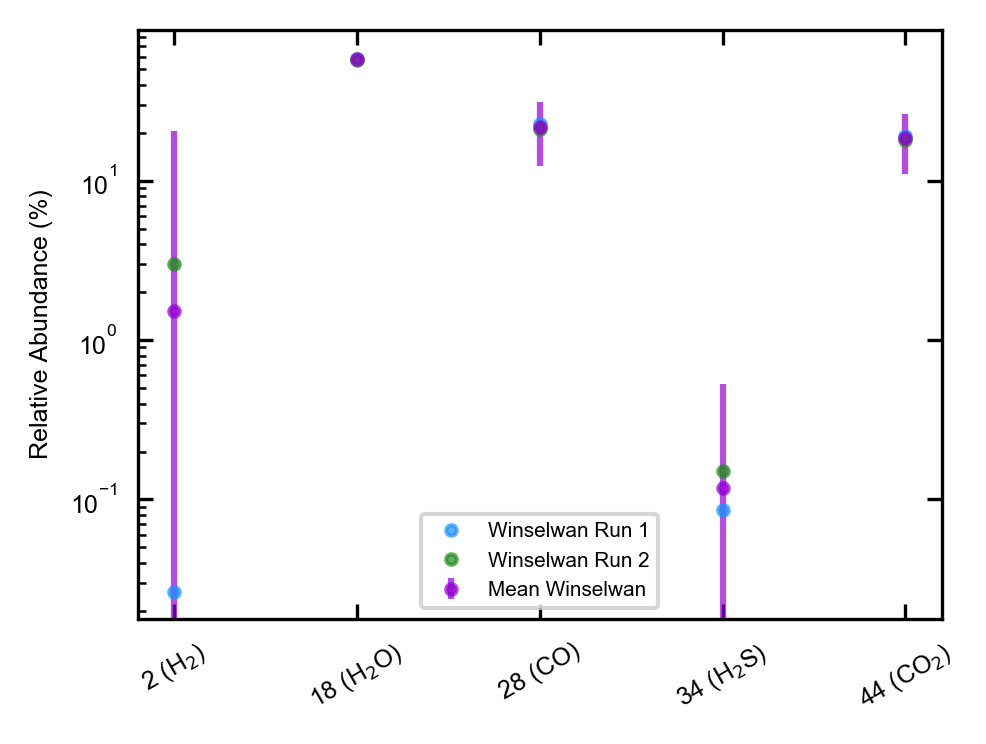

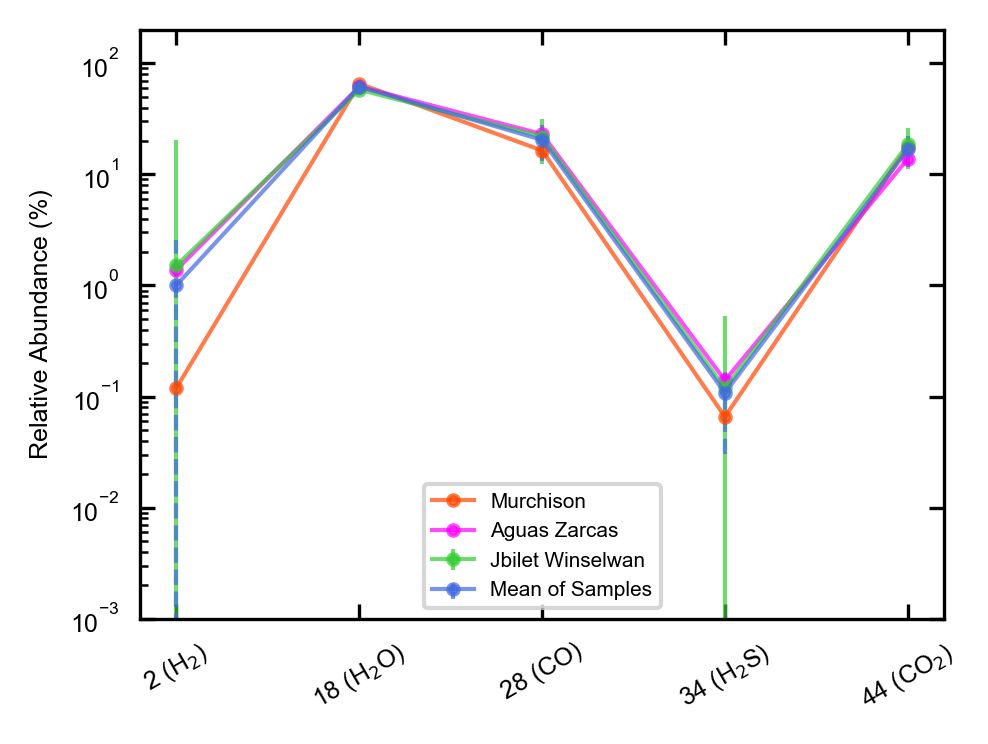

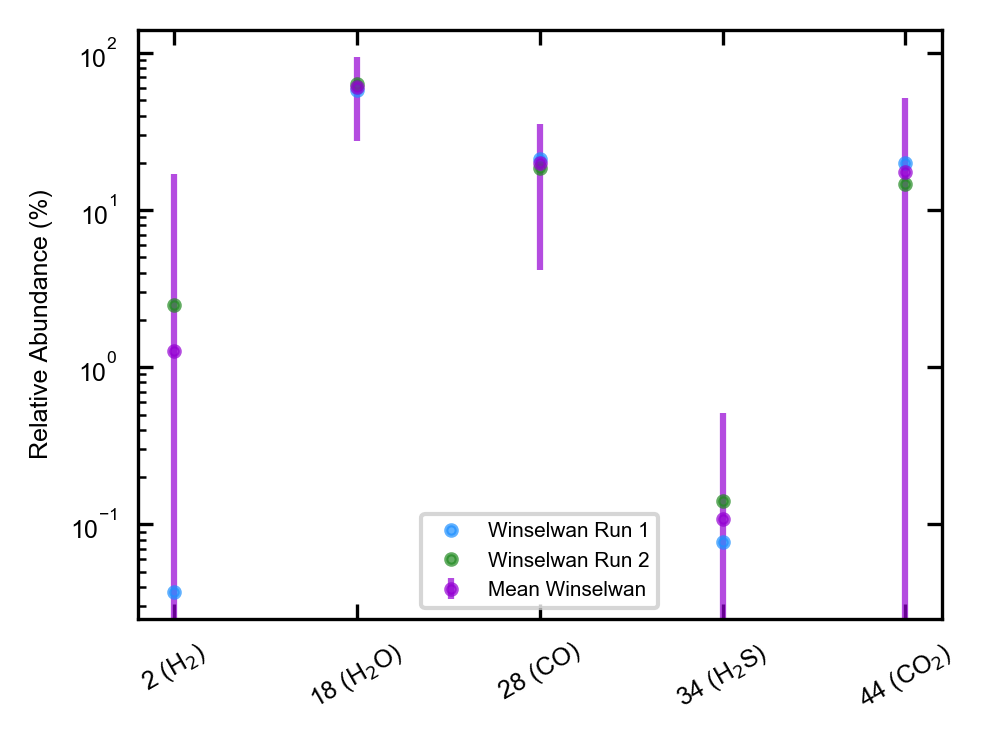

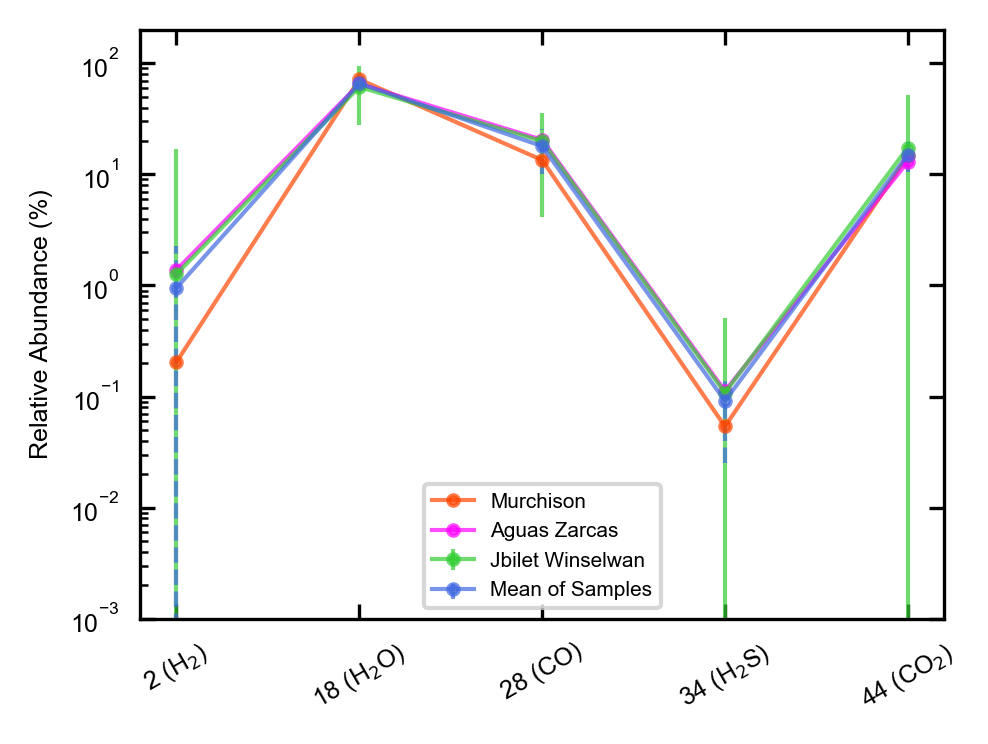

In [434]:
#Updated results (added ion fragments back, NIST fragments)
reproducplots_prettylog_OG(W1_Xtot_up, W2_Xtot_up, W_Xtot_up, W_int_up, 'Winselwan Run 1', 'Winselwan Run 2', 'Mean Winselwan', 'dodgerblue', 'forestgreen', 'darkviolet', 'Winselwan_Reproduce_update.pdf')
reproducplots_pretty2witherrorslog_OG(M_Xtot_up, W_Xtot_up, AZ_Xtot_up, CMavg_Xtot_up, W_int_up, CMAvg_int_up, 'Murchison', 'Jbilet Winselwan', 'Aguas Zarcas', 'Mean of Samples', 'orangered', 'limegreen', 'magenta', 'royalblue', 'CMReproduce_update.pdf')

#Updated Results (partial pressures)
reproducplots_prettylog_OG(W1_Ptot, W2_Ptot, W_Ptot, W_int_P, 'Winselwan Run 1', 'Winselwan Run 2', 'Mean Winselwan', 'dodgerblue', 'forestgreen', 'darkviolet', 'Winselwan_Reproduce_updateP.pdf')
reproducplots_pretty2witherrorslog_OG(M_Ptot, W_Ptot, AZ_Ptot, CMavg_Ptot, W_int_P, CMAvg_int_P, 'Murchison', 'Jbilet Winselwan', 'Aguas Zarcas', 'Mean of Samples', 'orangered', 'limegreen', 'magenta', 'royalblue', 'CMReproduce_updateP.pdf')



## Abundance Ratios

In [46]:
#Updated Mole Fraction Abundance Ratios (adding ion fragments back, NIST fragments):
#Carbon-to-Oxygen:
print('Carbon-to-Oxygen')
print('Murchison:', M_Xtot_up.Total_C/M_Xtot_up.Total_O)
print('Winselwan:', W_Xtot_up.Total_C/W_Xtot_up.Total_O)
print('Aguas Zarcas:', AZ_Xtot_up.Total_C/AZ_Xtot_up.Total_O)
print('Mean C/O:', ((M_Xtot_up.Total_C/M_Xtot_up.Total_O)+(W_Xtot_up.Total_C/W_Xtot_up.Total_O)+(AZ_Xtot_up.Total_C/AZ_Xtot_up.Total_O))/3.0)
Mean_CO = ((M_Xtot_up.Total_C/M_Xtot_up.Total_O)+(W_Xtot_up.Total_C/W_Xtot_up.Total_O)+(AZ_Xtot_up.Total_C/AZ_Xtot_up.Total_O))/3.0
print('95% Confidence C/O:', ConfidenceInterval95_3(M_Xtot_up.Total_C/M_Xtot_up.Total_O, W_Xtot_up.Total_C/W_Xtot_up.Total_O, AZ_Xtot_up.Total_C/AZ_Xtot_up.Total_O, Mean_CO))
print('STD C/O:', std_3(M_Xtot_up.Total_C/M_Xtot_up.Total_O, W_Xtot_up.Total_C/W_Xtot_up.Total_O, AZ_Xtot_up.Total_C/AZ_Xtot_up.Total_O))

print('     ')
#Hydrogen-to-Carbon:
print('Hydrogen-to-Carbon:')
print('Murchison:', M_Xtot_up.Total_H/M_Xtot_up.Total_C)
print('Winselwan:', W_Xtot_up.Total_H/W_Xtot_up.Total_C)
print('Aguas Zarcas:', AZ_Xtot_up.Total_H/AZ_Xtot_up.Total_C)
print('Mean H/C:', ((M_Xtot_up.Total_H/M_Xtot_up.Total_C)+(W_Xtot_up.Total_H/W_Xtot_up.Total_C)+(AZ_Xtot_up.Total_H/AZ_Xtot_up.Total_C))/3.0)
Mean_HC = ((M_Xtot_up.Total_H/M_Xtot_up.Total_C)+(W_Xtot_up.Total_H/W_Xtot_up.Total_C)+(AZ_Xtot_up.Total_H/AZ_Xtot_up.Total_C))/3.0
print('95% Confidence H/C:', ConfidenceInterval95_3(M_Xtot_up.Total_H/M_Xtot_up.Total_C, W_Xtot_up.Total_H/W_Xtot_up.Total_C, AZ_Xtot_up.Total_H/AZ_Xtot_up.Total_C, Mean_HC))
print('STD H/C:', std_3(M_Xtot_up.Total_H/M_Xtot_up.Total_C, W_Xtot_up.Total_H/W_Xtot_up.Total_C, AZ_Xtot_up.Total_H/AZ_Xtot_up.Total_C))

print('    ')
print('Sulfur-to-Oxygen:')
#Sulfur-to-Oxygen:
print('Murchison:', M_Xtot_up.Total_S/M_Xtot_up.Total_O)
print('Winselwan:', W_Xtot_up.Total_S/W_Xtot_up.Total_O)
print('Aguas Zarcas:', AZ_Xtot_up.Total_S/AZ_Xtot_up.Total_O)
print('Mean S/O:', ((M_Xtot_up.Total_S/M_Xtot_up.Total_O)+(W_Xtot_up.Total_S/W_Xtot_up.Total_O)+(AZ_Xtot_up.Total_S/AZ_Xtot_up.Total_O))/3.0)
Mean_SO = ((M_Xtot_up.Total_S/M_Xtot_up.Total_O)+(W_Xtot_up.Total_S/W_Xtot_up.Total_O)+(AZ_Xtot_up.Total_S/AZ_Xtot_up.Total_O))/3.0 
print('95% Confidence S/O:', ConfidenceInterval95_3(M_Xtot_up.Total_S/M_Xtot_up.Total_O, W_Xtot_up.Total_S/W_Xtot_up.Total_O, AZ_Xtot_up.Total_S/AZ_Xtot_up.Total_O, Mean_SO))
print('STD S/O:', std_3(M_Xtot_up.Total_S/M_Xtot_up.Total_O, W_Xtot_up.Total_S/W_Xtot_up.Total_O, AZ_Xtot_up.Total_S/AZ_Xtot_up.Total_O))

print('   ')
#Hydrogen-to-Oxygen:
print('Hydrogen-to-Oxygen')
print('Murchison:', M_Xtot_up.Total_H/M_Xtot_up.Total_O)
print('Winselwan:', W_Xtot_up.Total_H/W_Xtot_up.Total_O)
print('Aguas Zarcas:', AZ_Xtot_up.Total_H/AZ_Xtot_up.Total_O)
print('Mean H/O:', ((M_Xtot_up.Total_H/M_Xtot_up.Total_O)+(W_Xtot_up.Total_H/W_Xtot_up.Total_O)+(AZ_Xtot_up.Total_H/AZ_Xtot_up.Total_O))/3.0)
Mean_HO = ((M_Xtot_up.Total_H/M_Xtot_up.Total_O)+(W_Xtot_up.Total_H/W_Xtot_up.Total_O)+(AZ_Xtot_up.Total_H/AZ_Xtot_up.Total_O))/3.0
print('95% Confidence H/O:', ConfidenceInterval95_3(M_Xtot_up.Total_H/M_Xtot_up.Total_O, W_Xtot_up.Total_H/W_Xtot_up.Total_O, AZ_Xtot_up.Total_H/AZ_Xtot_up.Total_O, Mean_HO))
print('STD H/O:', std_3(M_Xtot_up.Total_H/M_Xtot_up.Total_O, W_Xtot_up.Total_H/W_Xtot_up.Total_O, AZ_Xtot_up.Total_H/AZ_Xtot_up.Total_O))


Carbon-to-Oxygen
Murchison: 0    0.295181
dtype: float64
Winselwan: 0    0.352153
dtype: float64
Aguas Zarcas: 0    0.333924
dtype: float64
Mean C/O: 0    0.327086
dtype: float64
95% Confidence C/O: (0    0.059017
dtype: float64, array([0.26806861]), array([0.38610311]))
STD C/O: 0    0.023756
dtype: float64
     
Hydrogen-to-Carbon:
Murchison: 0    3.749594
dtype: float64
Winselwan: 0    2.843433
dtype: float64
Aguas Zarcas: 0    3.324072
dtype: float64
Mean H/C: 0    3.3057
dtype: float64
95% Confidence H/C: (0    0.91962
dtype: float64, array([2.38607987]), array([4.22531918]))
STD H/C: 0    0.370167
dtype: float64
    
Sulfur-to-Oxygen:
Murchison: 0    0.000576
dtype: float64
Winselwan: 0    0.001032
dtype: float64
Aguas Zarcas: 0    0.001278
dtype: float64
Mean S/O: 0    0.000962
dtype: float64
95% Confidence S/O: (0    0.000722
dtype: float64, array([0.00023944]), array([0.0016843]))
STD S/O: 0    0.000291
dtype: float64
   
Hydrogen-to-Oxygen
Murchison: 0    1.10681
dtype: float

In [156]:
#Updated Relative Abundance Ratios (partial pressures):
#Carbon-to-Oxygen:
print('Carbon-to-Oxygen')
print('Murchison:', M_Ptot.Total_C/M_Ptot.Total_O)
print('Winselwan:', W_Ptot.Total_C/W_Ptot.Total_O)
print('Aguas Zarcas:', AZ_Ptot.Total_C/AZ_Ptot.Total_O)
print('Mean C/O:', ((M_Ptot.Total_C/M_Ptot.Total_O)+(W_Ptot.Total_C/W_Ptot.Total_O)+(AZ_Ptot.Total_C/AZ_Ptot.Total_O))/3.0)
Mean_CO = ((M_Ptot.Total_C/M_Ptot.Total_O)+(W_Ptot.Total_C/W_Ptot.Total_O)+(AZ_Ptot.Total_C/AZ_Ptot.Total_O))/3.0
print('95% Confidence C/O:', ConfidenceInterval95_3(M_Ptot.Total_C/M_Ptot.Total_O, W_Ptot.Total_C/W_Ptot.Total_O, AZ_Ptot.Total_C/AZ_Ptot.Total_O, Mean_CO))
print('STD C/O:', std_3(M_Ptot.Total_C/M_Ptot.Total_O, W_Ptot.Total_C/W_Ptot.Total_O, AZ_Ptot.Total_C/AZ_Ptot.Total_O))

print('     ')
#Hydrogen-to-Carbon:
print('Hydrogen-to-Carbon:')
print('Murchison:', M_Ptot.Total_H/M_Ptot.Total_C)
print('Winselwan:', W_Ptot.Total_H/W_Ptot.Total_C)
print('Aguas Zarcas:', AZ_Ptot.Total_H/AZ_Ptot.Total_C)
print('Mean H/C:', ((M_Ptot.Total_H/M_Ptot.Total_C)+(W_Ptot.Total_H/W_Ptot.Total_C)+(AZ_Ptot.Total_H/AZ_Ptot.Total_C))/3.0)
Mean_HC = ((M_Ptot.Total_H/M_Ptot.Total_C)+(W_Ptot.Total_H/W_Ptot.Total_C)+(AZ_Ptot.Total_H/AZ_Ptot.Total_C))/3.0
print('95% Confidence H/C:', ConfidenceInterval95_3(M_Ptot.Total_H/M_Ptot.Total_C, W_Ptot.Total_H/W_Ptot.Total_C, AZ_Ptot.Total_H/AZ_Ptot.Total_C, Mean_HC))
print('STD H/C:', std_3(M_Ptot.Total_H/M_Ptot.Total_C, W_Ptot.Total_H/W_Ptot.Total_C, AZ_Ptot.Total_H/AZ_Ptot.Total_C))

print('    ')
print('Sulfur-to-Oxygen:')
#Sulfur-to-Oxygen:
print('Murchison:', M_Ptot.Total_S/M_Ptot.Total_O)
print('Winselwan:', W_Ptot.Total_S/W_Ptot.Total_O)
print('Aguas Zarcas:', AZ_Ptot.Total_S/AZ_Ptot.Total_O)
print('Mean S/O:', ((M_Ptot.Total_S/M_Ptot.Total_O)+(W_Ptot.Total_S/W_Ptot.Total_O)+(AZ_Ptot.Total_S/AZ_Ptot.Total_O))/3.0)
Mean_SO = ((M_Ptot.Total_S/M_Ptot.Total_O)+(W_Ptot.Total_S/W_Ptot.Total_O)+(AZ_Ptot.Total_S/AZ_Ptot.Total_O))/3.0 
print('95% Confidence S/O:', ConfidenceInterval95_3(M_Ptot.Total_S/M_Ptot.Total_O, W_Ptot.Total_S/W_Ptot.Total_O, AZ_Ptot.Total_S/AZ_Ptot.Total_O, Mean_SO))
print('STD S/O:', std_3(M_Ptot.Total_S/M_Ptot.Total_O, W_Ptot.Total_S/W_Ptot.Total_O, AZ_Ptot.Total_S/AZ_Ptot.Total_O))

print('   ')
#Hydrogen-to-Oxygen:
print('Hydrogen-to-Oxygen')
print('Murchison:', M_Ptot.Total_H/M_Ptot.Total_O)
print('Winselwan:', W_Ptot.Total_H/W_Ptot.Total_O)
print('Aguas Zarcas:', AZ_Ptot.Total_H/AZ_Ptot.Total_O)
print('Mean H/O:', ((M_Ptot.Total_H/M_Ptot.Total_O)+(W_Ptot.Total_H/W_Ptot.Total_O)+(AZ_Ptot.Total_H/AZ_Ptot.Total_O))/3.0)
Mean_HO = ((M_Ptot.Total_H/M_Ptot.Total_O)+(W_Ptot.Total_H/W_Ptot.Total_O)+(AZ_Ptot.Total_H/AZ_Ptot.Total_O))/3.0
print('95% Confidence H/O:', ConfidenceInterval95_3(M_Ptot.Total_H/M_Ptot.Total_O, W_Ptot.Total_H/W_Ptot.Total_O, AZ_Ptot.Total_H/AZ_Ptot.Total_O, Mean_HO))
print('STD H/O:', std_3(M_Ptot.Total_H/M_Ptot.Total_O, W_Ptot.Total_H/W_Ptot.Total_O, AZ_Ptot.Total_H/AZ_Ptot.Total_O))


Carbon-to-Oxygen
Murchison: 0    0.245798
dtype: float64
Winselwan: 0    0.321621
dtype: float64
Aguas Zarcas: 0    0.300358
dtype: float64
Mean C/O: 0    0.289259
dtype: float64
95% Confidence C/O: (0    0.079335
dtype: float64, array([0.2099246]), array([0.36859374]))
STD C/O: 0    0.031934
dtype: float64
     
Hydrogen-to-Carbon:
Murchison: 0    5.111834
dtype: float64
Winselwan: 0    3.358295
dtype: float64
Aguas Zarcas: 0    3.972554
dtype: float64
Mean H/C: 0    4.147561
dtype: float64
95% Confidence H/C: (0    1.804862
dtype: float64, array([2.34269904]), array([5.95242328]))
STD H/C: 0    0.726496
dtype: float64
    
Sulfur-to-Oxygen:
Murchison: 0    0.00047
dtype: float64
Winselwan: 0    0.000934
dtype: float64
Aguas Zarcas: 0    0.001007
dtype: float64
Mean S/O: 0    0.000804
dtype: float64
95% Confidence S/O: (0    0.00059
dtype: float64, array([0.00021357]), array([0.00139376]))
STD S/O: 0    0.000238
dtype: float64
   
Hydrogen-to-Oxygen
Murchison: 0    1.25648
dtype: floa

In [ ]:
#Updated Mole Fraction Abundance Ratios (Least Squares):
#Carbon-to-Oxygen:
print('Carbon-to-Oxygen')
print('Murchison:', M_Xtot.Total_C/M_Xtot.Total_O)
print('Winselwan:', W_Xtot.Total_C/W_Xtot.Total_O)
print('Aguas Zarcas:', AZ_Xtot.Total_C/AZ_Xtot.Total_O)
print('Mean C/O:', ((M_Xtot.Total_C/M_Xtot.Total_O)+(W_Xtot.Total_C/W_Xtot.Total_O)+(AZ_Xtot.Total_C/AZ_Xtot.Total_O))/3.0)
Mean_CO = ((M_Xtot.Total_C/M_Xtot.Total_O)+(W_Xtot.Total_C/W_Xtot.Total_O)+(AZ_Xtot.Total_C/AZ_Xtot.Total_O))/3.0
print('95% Confidence C/O:', ConfidenceInterval95_3(M_Xtot.Total_C/M_Xtot.Total_O, W_Xtot.Total_C/W_Xtot.Total_O, AZ_Xtot.Total_C/AZ_Xtot.Total_O, Mean_CO))
print('STD C/O:', std_3(M_Xtot.Total_C/M_Xtot.Total_O, W_Xtot.Total_C/W_Xtot.Total_O, AZ_Xtot.Total_C/AZ_Xtot.Total_O))

print('     ')
#Hydrogen-to-Carbon:
print('Hydrogen-to-Carbon:')
print('Murchison:', M_Xtot.Total_H/M_Xtot.Total_C)
print('Winselwan:', W_Xtot.Total_H/W_Xtot.Total_C)
print('Aguas Zarcas:', AZ_Xtot.Total_H/AZ_Xtot.Total_C)
print('Mean H/C:', ((M_Xtot.Total_H/M_Xtot.Total_C)+(W_Xtot.Total_H/W_Xtot.Total_C)+(AZ_Xtot.Total_H/AZ_Xtot.Total_C))/3.0)
Mean_HC = ((M_Xtot.Total_H/M_Xtot.Total_C)+(W_Xtot.Total_H/W_Xtot.Total_C)+(AZ_Xtot.Total_H/AZ_Xtot.Total_C))/3.0
print('95% Confidence H/C:', ConfidenceInterval95_3(M_Xtot.Total_H/M_Xtot.Total_C, W_Xtot.Total_H/W_Xtot.Total_C, AZ_Xtot.Total_H/AZ_Xtot.Total_C, Mean_HC))
print('STD H/C:', std_3(M_Xtot.Total_H/M_Xtot.Total_C, W_Xtot.Total_H/W_Xtot.Total_C, AZ_Xtot.Total_H/AZ_Xtot.Total_C))

print('    ')
print('Sulfur-to-Oxygen:')
#Sulfur-to-Oxygen:
print('Murchison:', M_Xtot.Total_S/M_Xtot.Total_O)
print('Winselwan:', W_Xtot.Total_S/W_Xtot.Total_O)
print('Aguas Zarcas:', AZ_Xtot.Total_S/AZ_Xtot.Total_O)
print('Mean S/O:', ((M_Xtot.Total_S/M_Xtot.Total_O)+(W_Xtot.Total_S/W_Xtot.Total_O)+(AZ_Xtot.Total_S/AZ_Xtot.Total_O))/3.0)
Mean_SO = ((M_Xtot.Total_S/M_Xtot.Total_O)+(W_Xtot.Total_S/W_Xtot.Total_O)+(AZ_Xtot.Total_S/AZ_Xtot.Total_O))/3.0 
print('95% Confidence S/O:', ConfidenceInterval95_3(M_Xtot.Total_S/M_Xtot.Total_O, W_Xtot.Total_S/W_Xtot.Total_O, AZ_Xtot.Total_S/AZ_Xtot.Total_O, Mean_SO))
print('STD S/O:', std_3(M_Xtot.Total_S/M_Xtot.Total_O, W_Xtot.Total_S/W_Xtot.Total_O, AZ_Xtot.Total_S/AZ_Xtot.Total_O))

print('   ')
#Hydrogen-to-Oxygen:
print('Hydrogen-to-Oxygen')
print('Murchison:', M_Xtot.Total_H/M_Xtot.Total_O)
print('Winselwan:', W_Xtot.Total_H/W_Xtot.Total_O)
print('Aguas Zarcas:', AZ_Xtot.Total_H/AZ_Xtot.Total_O)
print('Mean H/O:', ((M_Xtot.Total_H/M_Xtot.Total_O)+(W_Xtot.Total_H/W_Xtot.Total_O)+(AZ_Xtot.Total_H/AZ_Xtot.Total_O))/3.0)
Mean_HO = ((M_Xtot.Total_H/M_Xtot.Total_O)+(W_Xtot.Total_H/W_Xtot.Total_O)+(AZ_Xtot.Total_H/AZ_Xtot.Total_O))/3.0
print('95% Confidence H/O:', ConfidenceInterval95_3(M_Xtot.Total_H/M_Xtot.Total_O, W_Xtot.Total_H/W_Xtot.Total_O, AZ_Xtot.Total_H/AZ_Xtot.Total_O, Mean_HO))
print('STD H/O:', std_3(M_Xtot.Total_H/M_Xtot.Total_O, W_Xtot.Total_H/W_Xtot.Total_O, AZ_Xtot.Total_H/AZ_Xtot.Total_O))


## Mass Loss

In [182]:
#First calculate Mass Fraction:

#Calculate average molar mass of the mixture 
def calctotalX_MM(file):
    H2 = np.sum(file.H2)
    C = np.sum(file.C)
    N = np.sum(file.N)
    CH4 = np.sum(file.CH4)
    H2O = np.sum(file.H2O)
    N2 = np.sum(file.N2)
    CO = np.sum(file.CO)
    S_O2 = np.sum(file.S_O2) 
    #O2 = np.sum(file.O2)
    H2S = np.sum(file.H2S)
    NaOH = np.sum(file.NaOH)
    CO2 = np.sum(file.CO2)
    total_XMM = (2.0*H2) + (12.0*C) + (14.0*N) + (16.0*CH4) + (18.0*H2O) + (28.0*CO) + (28.0*N2) + (32.0*S_O2) + (34.0*H2S) + (40.0*NaOH) + (44.0*CO2)
    return total_XMM

def calctotalX_MM_lsq(file):
    H2 = np.sum(file.H2)
    C = np.sum(file.C)
    N = np.sum(file.N)
    CH4 = np.sum(file.CH4)
    O = np.sum(file.O)
    H2O = np.sum(file.H2O)
    N2 = np.sum(file.N2)
    CO = np.sum(file.CO)
    S = np.sum(file.S) 
    O2 = np.sum(file.O2)
    H2S = np.sum(file.H2S)
    Ar = np.sum(file.Ar)
    CO2 = np.sum(file.CO2)
    total_XMM = (2.0*H2) + (12.0*C) + (14.0*N) + (16.0*CH4) + (16.0*O) + (18.0*H2O) + (28.0*CO) + (28.0*N2) + (32.0*S) +(32.0*O2) + (34.0*H2S) + (40.0*Ar) + (44.0*CO2)
    return total_XMM

#Function to calculate mass fraction
def wtpercent(X_i, M_i, totalXMM):
    w_i = (X_i * M_i)/totalXMM
    return w_i

#Compute mass fraction for all species 
def weightpercents(file):
    wtpt_TotH = 100*wtpercent(np.sum(file.H_tot), 1.0, calctotalX_MM(file))
    wtpt_TotHv2 = 100*wtpercent(np.sum(file.H_totv2), 1.0, calctotalX_MM(file))
    wtpt_H2 = 100*wtpercent(np.sum(file.H2), 2.0, calctotalX_MM(file))
    wtpt_C = 100*wtpercent(np.sum(file.C), 12.0, calctotalX_MM(file))
    wtpt_N = 100*wtpercent(np.sum(file.N), 14.0, calctotalX_MM(file))
    wtpt_CH4 = 100*wtpercent(np.sum(file.CH4), 16.0, calctotalX_MM(file))
    wtpt_H2O = 100*wtpercent(np.sum(file.H2O), 18.0, calctotalX_MM(file))
    wtpt_N2 = 100*wtpercent(np.sum(file.N2), 28.0, calctotalX_MM(file))
    wtpt_CO = 100*wtpercent(np.sum(file.CO), 28.0, calctotalX_MM(file))
    wtpt_S_O2 = 100*wtpercent(np.sum(file.S_O2), 32.0, calctotalX_MM(file)) 
    wtpt_H2S = 100*wtpercent(np.sum(file.H2S), 34.0, calctotalX_MM(file))
    wtpt_NaOH = 100*wtpercent(np.sum(file.NaOH), 40.0, calctotalX_MM(file))
    wtpt_CO2 = 100*wtpercent(np.sum(file.CO2), 44.0, calctotalX_MM(file))
    wtpt_TotC = 100*wtpercent(np.sum(file.C_tot), 12.0, calctotalX_MM(file))
    wtpt_TotCv2 = 100*wtpercent(np.sum(file.C_totv2), 12.0, calctotalX_MM(file))
    wtpt_TotO = 100*wtpercent(np.sum(file.O_tot), 16.0, calctotalX_MM(file))
    wtpt_TotOv2 = 100*wtpercent(np.sum(file.O_totv2), 16.0, calctotalX_MM(file))
    wtpt_TotN = 100*wtpercent(np.sum(file.N_tot), 14.0, calctotalX_MM(file))
    wtpt_TotS = 100*wtpercent(np.sum(file.S_tot), 32.0, calctotalX_MM(file))
    wtpt_TotSv2 = 100*wtpercent(np.sum(file.S_totv2), 32.0, calctotalX_MM(file))
    d = {'H2': [wtpt_H2], 'C': [wtpt_C], 'N': [wtpt_N], 'CH4': [wtpt_CH4], 'H2O': [wtpt_H2O], 'N2': [wtpt_N2], 'CO': [wtpt_CO], 'S_O2': [wtpt_S_O2], 'H2S': [wtpt_H2S], 'NaOH': [wtpt_NaOH], 'CO2': [wtpt_CO2], 'Total_H': [wtpt_TotH], 'Total_C': [wtpt_TotC], 'Total_O': [wtpt_TotO], 'Total_N': [wtpt_TotN], 'Total_S': [wtpt_TotS], 'Total_Cv2': [wtpt_TotCv2], 'Total_Hv2': [wtpt_TotHv2], 'Total_Ov2': [wtpt_TotOv2], 'Total_Sv2': [wtpt_TotSv2]}
    df = pd.DataFrame(data=d)
    return df

def weightpercents_lsq(file):
    wtpt_TotH = 100*wtpercent(np.sum(file.H_tot), 1.0, calctotalX_MM_lsq(file))
    wtpt_TotHv2 = 100*wtpercent(np.sum(file.H_totv2), 1.0, calctotalX_MM_lsq(file))
    wtpt_H2 = 100*wtpercent(np.sum(file.H2), 2.0, calctotalX_MM_lsq(file))
    wtpt_C = 100*wtpercent(np.sum(file.C), 12.0, calctotalX_MM_lsq(file))
    wtpt_N = 100*wtpercent(np.sum(file.N), 14.0, calctotalX_MM_lsq(file))
    wtpt_CH4 = 100*wtpercent(np.sum(file.CH4), 16.0, calctotalX_MM_lsq(file))
    wtpt_O = 100*wtpercent(np.sum(file.O), 16.0, calctotalX_MM_lsq(file))
    wtpt_H2O = 100*wtpercent(np.sum(file.H2O), 18.0, calctotalX_MM_lsq(file))
    wtpt_N2 = 100*wtpercent(np.sum(file.N2), 28.0, calctotalX_MM_lsq(file))
    wtpt_CO = 100*wtpercent(np.sum(file.CO), 28.0, calctotalX_MM_lsq(file))
    wtpt_S = 100*wtpercent(np.sum(file.S), 32.0, calctotalX_MM_lsq(file)) 
    wtpt_O2 = 100*wtpercent(np.sum(file.O2), 32.0, calctotalX_MM_lsq(file)) 
    wtpt_H2S = 100*wtpercent(np.sum(file.H2S), 34.0, calctotalX_MM_lsq(file))
    wtpt_Ar = 100*wtpercent(np.sum(file.Ar), 40.0, calctotalX_MM_lsq(file))
    wtpt_CO2 = 100*wtpercent(np.sum(file.CO2), 44.0, calctotalX_MM_lsq(file))
    wtpt_TotC = 100*wtpercent(np.sum(file.C_tot), 12.0, calctotalX_MM_lsq(file))
    wtpt_TotCv2 = 100*wtpercent(np.sum(file.C_totv2), 12.0, calctotalX_MM_lsq(file))
    wtpt_TotO = 100*wtpercent(np.sum(file.O_tot), 16.0, calctotalX_MM_lsq(file))
    wtpt_TotOv2 = 100*wtpercent(np.sum(file.O_totv2), 16.0, calctotalX_MM_lsq(file))
    wtpt_TotN = 100*wtpercent(np.sum(file.N_tot), 14.0, calctotalX_MM_lsq(file))
    wtpt_TotS = 100*wtpercent(np.sum(file.S_tot), 32.0, calctotalX_MM_lsq(file))
    wtpt_TotSv2 = 100*wtpercent(np.sum(file.S_totv2), 32.0, calctotalX_MM_lsq(file))
    d = {'H2': [wtpt_H2], 'C': [wtpt_C], 'N': [wtpt_N], 'CH4': [wtpt_CH4], 'O':[wtpt_O], 'H2O': [wtpt_H2O], 'N2': [wtpt_N2], 'CO': [wtpt_CO], 'S': [wtpt_S], 'O2':[wtpt_O2], 'H2S': [wtpt_H2S], 'Ar': [wtpt_Ar], 'CO2': [wtpt_CO2], 'Total_H': [wtpt_TotH], 'Total_C': [wtpt_TotC], 'Total_O': [wtpt_TotO], 'Total_N': [wtpt_TotN], 'Total_S': [wtpt_TotS], 'Total_Cv2': [wtpt_TotCv2], 'Total_Hv2': [wtpt_TotHv2], 'Total_Ov2': [wtpt_TotOv2], 'Total_Sv2': [wtpt_TotSv2]}
    df = pd.DataFrame(data=d)
    return df


In [183]:

M_wtpt_up = weightpercents(M_X_up)
W1_wtpt_up = weightpercents(W1_X_up)
W2_wtpt_up = weightpercents(W2_X_up)
AZ_wtpt_up = weightpercents(AZ_X_up)
W_wtpt_mean_up = (W1_wtpt_up + W2_wtpt_up)/2.0

print(np.sum(M_wtpt_up))
print(W_wtpt_mean_up.CO2)
print(AZ_wtpt_up.CO2)

H2            0.009893
C             0.000000
N             0.000000
CH4           0.000000
H2O          48.658144
N2            0.000000
CO           18.916539
S_O2          0.000000
H2S           0.092193
NaOH          0.000000
CO2          32.323232
Total_H       1.898499
Total_C       6.075855
Total_O      27.444632
Total_N       0.000000
Total_S       0.031606
Total_Cv2     6.075855
Total_Hv2     1.898499
Total_Ov2    27.444632
Total_Sv2     0.031606
dtype: float64
0    32.994325
Name: CO2, dtype: float64
0    25.678513
Name: CO2, dtype: float64


In [184]:
#Mass of gas (g):
M_070819 = 5.0E-4
#M_071319 = 5.0E-4
#M_071619 = 5.0E-4

W2_071419 = 7.0E-4
W1_071819 = 4.0E-4
W_avg = (W1_071819+W2_071419)/2.0
print(W_avg)
W_avg_std = std(W1_071819, W2_071419, W_avg)
print(W_avg_std)

AZ_071919 = 8.0E-4

#Initial Sample Mass (mg):
M_070819_init = 3.1 

W2_071419_init = 3.1
W1_071819_init = 3.1
W_avg_init = (W2_071419_init + W1_071819_init)/2.0
W_avg_init_std = std(W2_071419_init, W1_071819_init, W_avg_init)
AZ_071919_init = 3.2

def masslost(file, totalmass):
    M_H_tot = (file['Total_H'].item()/100) * totalmass
    M_H2 = (file['H2'].item()/100) * totalmass
    M_C = (file['C'].item()/100) * totalmass
    M_N = (file['N'].item()/100) * totalmass
    M_CH4 = (file['CH4'].item()/100) * totalmass
    M_H2O = (file['H2O'].item()/100) * totalmass
    M_N2 = (file['N2'].item()/100) * totalmass
    M_CO = (file['CO'].item()/100) * totalmass
    #M_S = (file['S'].item()/100) * totalmass
    M_S_O2 = (file['S_O2'].item()/100) * totalmass
    M_H2S = (file['H2S'].item()/100) * totalmass
    M_NaOH = (file['NaOH'].item()/100) * totalmass
    M_CO2 = (file['CO2'].item()/100) * totalmass
    M_C_tot = (file['Total_C'].item()/100) * totalmass
    M_O_tot = (file['Total_O'].item()/100) * totalmass
    M_N_tot = (file['Total_N'].item()/100) * totalmass
    M_S_tot = (file['Total_S'].item()/100) * totalmass
    d = {'H2': [M_H2], 'C': [M_C], 'N': [M_N], 'CH4': [M_CH4], 'H2O': [M_H2O], 'N2': [M_N2], 'CO':[M_CO], 'S_O2': [M_S_O2], 'H2S': [M_H2S], 'NaOH': [M_NaOH], 'CO2': [M_CO2], 'Total_H': [M_H_tot], 'Total_C': [M_C_tot], 'Total_O': [M_O_tot], 'Total_N': [M_N_tot], 'Total_S': [M_S_tot]}
    df = pd.DataFrame(data=d)
    return df

def masslost_lsq(file, totalmass):
    M_H_tot = (file['Total_H'].item()/100) * totalmass
    M_H2 = (file['H2'].item()/100) * totalmass
    M_C = (file['C'].item()/100) * totalmass
    M_N = (file['N'].item()/100) * totalmass
    M_CH4 = (file['CH4'].item()/100) * totalmass
    M_O = (file['O'].item()/100) * totalmass
    M_H2O = (file['H2O'].item()/100) * totalmass
    M_N2 = (file['N2'].item()/100) * totalmass
    M_CO = (file['CO'].item()/100) * totalmass
    M_S = (file['S'].item()/100) * totalmass
    M_O2 = (file['O2'].item()/100) * totalmass
    M_H2S = (file['H2S'].item()/100) * totalmass
    M_Ar = (file['Ar'].item()/100) * totalmass
    M_CO2 = (file['CO2'].item()/100) * totalmass
    M_C_tot = (file['Total_C'].item()/100) * totalmass
    M_O_tot = (file['Total_O'].item()/100) * totalmass
    M_N_tot = (file['Total_N'].item()/100) * totalmass
    M_S_tot = (file['Total_S'].item()/100) * totalmass
    d = {'H2': [M_H2], 'C': [M_C], 'N': [M_N], 'CH4': [M_CH4], 'O':[M_O], 'H2O': [M_H2O], 'N2': [M_N2], 'CO':[M_CO], 'S': [M_S], 'O2':[M_O2], 'H2S': [M_H2S], 'Ar': [M_Ar], 'CO2': [M_CO2], 'Total_H': [M_H_tot], 'Total_C': [M_C_tot], 'Total_O': [M_O_tot], 'Total_N': [M_N_tot], 'Total_S': [M_S_tot]}
    df = pd.DataFrame(data=d)
    return df

0.00055
0.00021213203435596425


In [186]:


M_masslost_up = masslost(M_wtpt_up, M_070819)
W1_masslost_up = masslost(W1_wtpt_up, W1_071819)
W2_masslost_up = masslost(W2_wtpt_up, W2_071419)
W_masslost_avg_up = (W1_masslost_up + W2_masslost_up)/2.0
AZ_masslost_up = masslost(AZ_wtpt_up, AZ_071919)


In [187]:
print('Murchison:')
display((M_masslost_up/(M_070819_init*0.001))*100)

print('Winselwan:')
display((W_masslost_avg_up/(W_avg_init*0.001))*100)

print('AZ:')
display((AZ_masslost_up/(AZ_071919_init*0.001))*100)

Murchison:


H2    C    N  CH4       H2O   N2        CO  S_O2      H2S  NaOH  \
0  0.001596  0.0  0.0  0.0  7.848088  0.0  3.051055   0.0  0.01487   0.0   

        CO2  Total_H   Total_C   Total_O  Total_N   Total_S  
0  5.213424  0.30621  0.979977  4.426554      0.0  0.005098

Winselwan:


H2    C    N  CH4       H2O   N2       CO  S_O2       H2S  NaOH  \
0  0.027987  0.0  0.0  0.0  7.485222  0.0  4.36484   0.0  0.031236   0.0   

        CO2   Total_H   Total_C   Total_O  Total_N   Total_S  
0  5.832651  0.307934  1.280973  4.866934      0.0  0.010891

AZ:


H2    C    N  CH4        H2O   N2        CO  S_O2       H2S  NaOH  \
0  0.029286  0.0  0.0  0.0  11.699035  0.0  6.801869   0.0  0.050181   0.0   

        CO2   Total_H   Total_C   Total_O  Total_N   Total_S  
0  6.419628  0.478864  1.728715  6.902634      0.0  0.017638

In [ ]:
#In units of mg/g, normalized to initial sample mass, LEAST SQUARES
print('Murchison:')
display((M_masslost*1E3)/(M_070819_init*0.001))

print('Winselwan:')
display((W_masslost_avg*1E3)/(W_avg_init*0.001))

print('Aguas Zarcas:')
display((AZ_masslost*1E3)/(AZ_071919_init*0.001))

## Initial Atomic Abundances

In [99]:
#Bulk CM Chondrite Mass Fractions to Mole Fractions: (For Table 3)
#g/g
CM_H = 14/1000
CM_C = 22/1000
CM_N = 1.52/1000
CM_O = 432/1000
CM_S = 33/1000

CM_sum = 14+22+1.52+432+33

CM_H_norm = 14/CM_sum
CM_C_norm = 22/CM_sum
CM_N_norm = 1.52/CM_sum
CM_O_norm = 432/CM_sum
CM_S_norm = 33/CM_sum
print(CM_H_norm)

CM_Mavg = 1/((CM_H/1.0)+(CM_C/12.0)+(CM_N/14.0)+(CM_O/16.0)+(CM_S/32.0))

CM_H_X = (CM_H * CM_Mavg)/1.0
CM_C_X = (CM_C * CM_Mavg)/12.0
CM_N_X = (CM_N * CM_Mavg)/14.0
CM_O_X = (CM_O * CM_Mavg)/16.0
CM_S_X = (CM_S * CM_Mavg)/32.0

print(CM_H_X*100)
print(CM_C_X*100)
print(CM_N_X*100)
print(CM_O_X*100)
print(CM_S_X*100)

print(CM_H_X+CM_C_X+CM_N_X+CM_O_X+CM_S_X)

print('')

print('C/O:', CM_C_X/CM_O_X)
print('H/C:', CM_H_X/CM_C_X)
print('S/O:', CM_S_X/CM_O_X)
print('H/O:', CM_H_X/CM_O_X)
print('')
CM_Mavgnorm = 1/((CM_H_norm/1.0)+(CM_C_norm/12.0)+(CM_N_norm/14.0)+(CM_O_norm/16.0)+(CM_S_norm/32.0))

CM_H_Xnorm = (CM_H_norm * CM_Mavgnorm)/1.0
CM_C_Xnorm = (CM_C_norm * CM_Mavgnorm)/12.0
CM_N_Xnorm = (CM_N_norm * CM_Mavgnorm)/14.0
CM_O_Xnorm = (CM_O_norm * CM_Mavgnorm)/16.0
CM_S_Xnorm = (CM_S_norm * CM_Mavgnorm)/32.0

print('')
print(CM_H_Xnorm)
print(CM_C_Xnorm)
print(CM_N_Xnorm)
print(CM_O_Xnorm)
print(CM_S_Xnorm)

0.027859587678102364
31.837606548367575
4.169210381333849
0.24690388751795264
61.401098343280324
2.34518083950029
0.9999999999999999

C/O: 0.06790123456790123
H/C: 7.636363636363637
S/O: 0.03819444444444445
H/O: 0.5185185185185185


0.31837606548367575
0.04169210381333849
0.0024690388751795263
0.6140109834328032
0.023451808395002903


[ 4.23980696 36.31048033]
Std: 0.01758419977231415


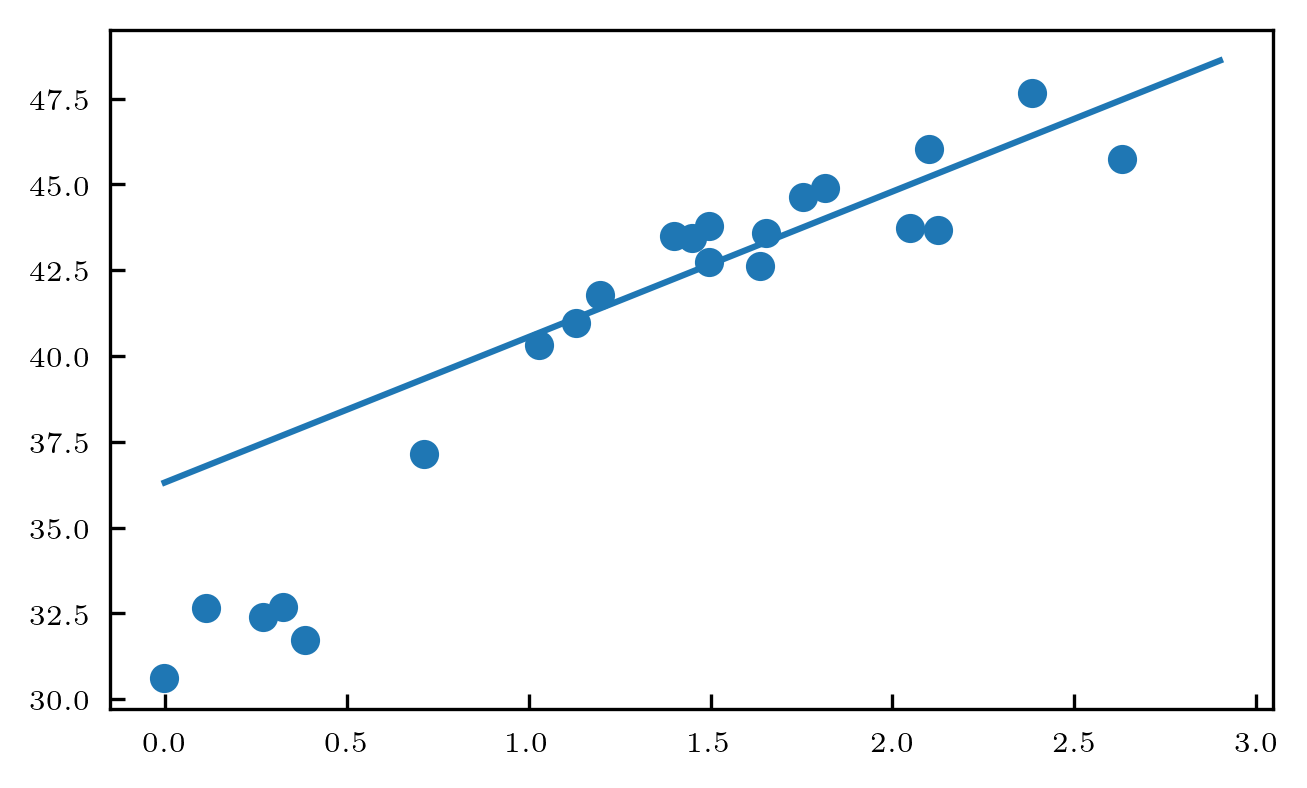

41.19742027727791
41.271973889840105
41.12286666471571
0.07455361256219817
0.07455361256219817


In [284]:
bulk = pd.read_csv('bulkH_Alexander2012.csv', skiprows=1, names=['Hwtpt', 'Hstdev', 'Cwtpt', 'Cstdev', 'Nwtpt', 'Nstdev'])
bulk['Hstdev'] = bulk.Hstdev.astype(float)
bulk['Cwtpt'] = bulk.Cwtpt.astype(float)
bulk['Nwtpt'] = bulk.Nwtpt.astype(float)

HandO = pd.read_csv('H_Odata_Larry.csv', skiprows=0, names=['Hwtpt', 'Owtpt'])
#print(HandO[0:17])
HandO_fit = np.polyfit(HandO.Hwtpt[0:17], HandO.Owtpt[0:17], 1)
print(HandO_fit)
#y=6.63186992x + 31.95312599

#print(bulk['Cwtpt'])
#print('Average H weight %:', np.mean(bulk_H.wtpt))
H_std_wtpt = np.sqrt(np.sum(bulk.Hstdev**2)/(len(bulk.Hstdev)))
print('Std:', np.sqrt(np.sum(bulk.Hstdev**2)/(len(bulk.Hstdev))))
C_std_wtpt = np.std(bulk.Cwtpt)
N_std_wtpt = np.std(bulk.Nwtpt)

x_arr = np.arange(0, 3, 0.1)
y_arr = np.arange(30, 50, 1)

plt.scatter(HandO.Hwtpt, HandO.Owtpt)
plt.plot(x_arr, (HandO_fit[0]*x_arr) + HandO_fit[1])
plt.show()

O_fit = HandO_fit[0]*np.mean(bulk.Hwtpt) + HandO_fit[1]
O_fitspreadup = (HandO_fit[0]*(np.mean(bulk.Hwtpt)+H_std)) + HandO_fit[1]
O_fitspreaddown = (HandO_fit[0]*(np.mean(bulk.Hwtpt)-H_std)) + HandO_fit[1]
O_std_wtpt = O_fitspreadup-O_fit
S_std_wtpt = 0.9
print(O_fit)
print(O_fitspreadup)
print(O_fitspreaddown)

print(O_fitspreadup-O_fit)
print(O_fit-O_fitspreaddown)

print('O:' O_fit)

In [290]:
CM_H = np.mean(bulk.Hwtpt)/100
CM_C = np.mean(bulk.Cwtpt)/100
CM_N = np.mean(bulk.Nwtpt)/100
CM_O = O_fit/100
CM_S = 3.3/100

CM_sum = (np.mean(bulk.Hwtpt))+(np.mean(bulk.Cwtpt))+(np.mean(bulk.Nwtpt))+(O_fit)+(3.3)

print('H (mg/g):', np.mean(bulk.Hwtpt)*10)
print('C (mg/g):', np.mean(bulk.Cwtpt)*10)
print('N (mg/g):', np.mean(bulk.Nwtpt)*10)
print('O (mg/g):', O_fit*10)
print('S (mg/g):', 3.3*10)

CM_H_norm = (np.mean(bulk.Hwtpt))/CM_sum
CM_C_norm = (np.mean(bulk.Cwtpt))/CM_sum
CM_N_norm = (np.mean(bulk.Nwtpt))/CM_sum
CM_O_norm = (O_fit)/CM_sum
CM_S_norm = (3.3)/CM_sum
print(CM_H_norm)

CM_Mavg = 1/((CM_H/1.0)+(CM_C/12.0)+(CM_N/14.0)+(CM_O/16.0)+(CM_S/32.0))

CM_H_X = (CM_H * CM_Mavg)/1.0
CM_C_X = (CM_C * CM_Mavg)/12.0
CM_N_X = (CM_N * CM_Mavg)/14.0
CM_O_X = (CM_O * CM_Mavg)/16.0
CM_S_X = (CM_S * CM_Mavg)/32.0

print('H:', CM_H_X*100)
print('C:', CM_C_X*100)
print('N:', CM_N_X*100)
print('O:', CM_O_X*100)
print('S:', CM_S_X*100)

print('C/O:', CM_C_X/CM_O_X)
print('H/C:', CM_H_X/CM_C_X)
print('S/O:', CM_S_X/CM_O_X)
print('H/O:', CM_H_X/CM_O_X)

print(CM_H_X+CM_C_X+CM_N_X+CM_O_X+CM_S_X)

H (mg/g): 11.526326530612245
C (mg/g): 19.516326530612254
N (mg/g): 0.9965306122448976
O (mg/g): 411.97420277277905
S (mg/g): 33.0
0.024163528442007514
H: 28.81329119729606
C: 4.06554506571384
N: 0.17793630112380152
O: 64.36532835689293
S: 2.5778990789733647
C/O: 0.06316358774977736
H/C: 7.08719021227648
S/O: 0.0400510514710564
H/O: 0.44765236087248866
0.9999999999999999


In [297]:
CM_H_std = (H_std_wtpt)/100
CM_C_std = (C_std_wtpt)/100
CM_N_std = (N_std_wtpt)/100
CM_O_std = (O_std_wtpt)/100
CM_S_std = (S_std_wtpt)/100

CM_Mavg_std = np.sqrt((CM_H_std**2)+(CM_C_std**2)+(CM_N_std**2)+(CM_O_std**2)+(CM_S_std**2))

CM_H_Xstd = np.sqrt(((CM_H_std/CM_H)**2) + ((CM_Mavg_std/CM_Mavg)**2))*CM_H_X
CM_C_Xstd = np.sqrt(((CM_C_std/CM_C)**2) + ((CM_Mavg_std/CM_Mavg)**2))*CM_C_X
CM_N_Xstd = np.sqrt(((CM_N_std/CM_N)**2) + ((CM_Mavg_std/CM_Mavg)**2))*CM_N_X
CM_O_Xstd = np.sqrt(((CM_O_std/CM_O)**2) + ((CM_Mavg_std/CM_Mavg)**2))*CM_O_X
CM_S_Xstd = np.sqrt(((CM_S_std/CM_S)**2) + ((CM_Mavg_std/CM_Mavg)**2))*CM_S_X
                                           
CM_CtoO_Xstd = np.sqrt(((CM_C_Xstd/CM_C_X)**2) + ((CM_O_Xstd/CM_O_X)**2))*(CM_C_X/CM_O_X)
CM_HtoC_Xstd = np.sqrt(((CM_H_Xstd/CM_H_X)**2) + ((CM_C_Xstd/CM_C_X)**2))*(CM_H_X/CM_C_X)
CM_StoO_Xstd = np.sqrt(((CM_S_Xstd/CM_S_X)**2) + ((CM_O_Xstd/CM_O_X)**2))*(CM_S_X/CM_O_X)
CM_HtoO_Xstd = np.sqrt(((CM_H_Xstd/CM_H_X)**2) + ((CM_O_Xstd/CM_O_X)**2))*(CM_H_X/CM_O_X)


print('H std (mg/g):', H_std_wtpt*10)
print('C std (mg/g):', C_std_wtpt*10)
print('N std (mg/g):', N_std_wtpt*10)
print('O std (mg/g):', O_std_wtpt*10)
print('S std (mg/g):', S_std_wtpt*10)
print('')

print('H std:', CM_H_Xstd*100)
print('C std:', CM_C_Xstd*100)
print('N std:', CM_N_Xstd*100)
print('O std:', CM_O_Xstd*100)
print('S std:', CM_S_Xstd*100)
print('')

print('C/O std:', CM_CtoO_Xstd)
print('H/C std:', CM_HtoC_Xstd)
print('S/O std:', CM_StoO_Xstd)
print('H/O std:', CM_HtoO_Xstd)

H std (mg/g): 0.1758419977231415
C std (mg/g): 3.238691278819302
N std (mg/g): 0.2802808432692231
O std (mg/g): 0.7455361256219817
S std (mg/g): 9.0

H std: 0.4397057151550636
C std: 0.67467002987668
N std: 0.05004581133956207
O std: 0.11907355464824051
S std: 0.7030640821531092

C/O std: 0.010482537227362084
H/C std: 1.1810691434165432
S/O std: 0.010923276156839572
H/O std: 0.006881419219690517


## Chemical Equilibrium Models

In [4]:
LS_murchison = pd.read_csv('Schaefer_Murchison_gas.csv', skiprows=1, names=['T_K', 'P', 'H2', 'C', 'N', 'CH4', 'H2O', 'CO', 'O2', 'H2S','NaOH', 'KH', 'CO2', 'N2', 'Fe', 'H', 'SO2', 'Ni', 'SiO', 'Na', 'OH', 'O', 'SO', 'S2', 'KCl', 'HF', 'NaCl', 'Co', 'K','CrO2', 'FeO', 'Mg', 'Mn', 'PO2', 'PO', 'index'])
LS_murchison['T_C'] = LS_murchison['T_K']-273.15
LS_CM = pd.read_csv('Schaefer_CMavg_gas.csv', skiprows=1, names=['T_K', 'P', 'H2', 'C', 'N', 'CH4', 'H2O', 'CO', 'O2', 'H2S','NaOH', 'KH', 'CO2', 'N2', 'Fe', 'H', 'SO2', 'Ni', 'SiO', 'Na', 'OH', 'O', 'SO', 'S2', 'KCl', 'HF', 'NaCl', 'Co', 'K','CrO2', 'FeO', 'Mg', 'Mn', 'PO2', 'PO', 'index'])
LS_CM['T_C'] = LS_CM['T_K']-273.15

### Recomputed Equilibrium Abundances

In [438]:
Murchison_recompute = pd.read_csv('redecisiononnatureastronomymanuscriptnatastron200129/Murch-exp-updated-gas.dat', sep='\s\s+|,', engine='python', skiprows=3, names=['T_K', 'P', 'H2', 'H2O', 'CO', 'H2S', 'CO2'])
Murchison_recompute['T_C'] = Murchison_recompute['T_K']-273.15
Winselwan_recompute = pd.read_csv('redecisiononnatureastronomymanuscriptnatastron200129/Winselwan-exp-updated-gas.dat', sep='\s\s+|,', engine='python', skiprows=3, names=['T_K', 'P', 'H2', 'H2O', 'CO', 'H2S', 'CO2'])
Winselwan_recompute['T_C'] = Winselwan_recompute['T_K']-273.15
AZ_recompute = pd.read_csv('redecisiononnatureastronomymanuscriptnatastron200129/AZ-exp-updated-gas.dat', skiprows=3, sep='\s\s+|,', engine='python', names=['T_K', 'P', 'H2', 'H2O', 'CO', 'H2S', 'CO2'])
AZ_recompute['T_C'] = AZ_recompute['T_K']-273.15


print(AZ_recompute['T_C'])
print(Winselwan_recompute['T_C'])



0      200.12
1      250.55
2      300.01
3      350.24
4      400.40
5      450.11
6      500.43
7      550.33
8      600.51
9      650.01
10     700.28
11     750.28
12     800.03
13     850.22
14     900.26
15     950.21
16    1000.47
17    1050.43
18    1050.43
19    1100.43
20    1150.09
21    1184.21
Name: T_C, dtype: float64
0      200.07
1      250.19
2      300.36
3      350.35
4      400.06
5      450.07
6      500.18
7      550.57
8      600.33
9      650.06
10     700.27
11     750.23
12     800.05
13     850.14
14     900.42
15     950.29
16    1000.11
17    1050.06
18    1100.00
19    1150.24
20    1184.27
Name: T_C, dtype: float64


In [435]:
def plotlogmolefrac_all(file1, file2, title, title2):
    fig, ax = plt.subplots()
    plt.scatter(file1.T_interp_C, np.log10(file1.H2), marker='o',s=1.5, edgecolors='none', color='mediumorchid', label=r'H$_2$')
    plt.scatter(file1.T_interp_C, np.log10(file1.C), marker='o', s=1.5, edgecolors='none', color='lime', label=r'C corrected')
    plt.scatter(file1.T_interp_C, np.log10(file1.N), marker='o', s=1.5, edgecolors='none', color='navy', label=r'N corrected')
    plt.scatter(file1.T_interp_C, np.log10(file1.CH4), marker='o', s=1.5, edgecolors='none', color='red', label=r'CH$_4$ corrected')
    #plt.scatter(file.T_interp_C, np.log10(file.O), marker='o', s=2, color='cyan', label=r'O corrected')

    plt.scatter(file1.T_interp_C, np.log10(file1.H2O), marker='o', s=1.5, edgecolors='none', color='dodgerblue', label=r'H$_2$O')
    plt.scatter(file1.T_interp_C, np.log10(file1.N2), marker='o', s=1.5, edgecolors='none', color='magenta', label=r'N2')
    plt.scatter(file1.T_interp_C, np.log10(file1.CO), marker='o', s=1.5, edgecolors='none', color='darkorange', label=r'CO')
    plt.scatter(file1.T_interp_C, np.log10(file1.S_O2), marker='o', alpha=0.5, s=1.5, edgecolors='none', color='gold', label=r'S or O$_2$')
    #plt.scatter(file.T_interp_C, np.log10(file.O2), marker='o', alpha=0.5, s=2, color='goldenrod', label=r'O$_2$')
    #plt.scatter(file.T_interp_C, np.log10(file.S), marker='o', alpha=0.5, s=2, color='gold', label=r'S')

    plt.scatter(file1.T_interp_C, np.log10(file1.H2S), marker='o', s=1.5, edgecolors='none', color='deeppink', label=r'H$_2$S')
    #plt.scatter(file.T_interp_C, np.log10(file.Ar), marker='o', s=2, color='darkviolet', label=r'Ar')
    plt.scatter(file1.T_interp_C, np.log10(file1.CO2), marker='o', s=1.5, edgecolors='none', color='forestgreen', label=r'CO$_2$')
    #plt.yscale('log')
    plt.plot(file2.T_C, np.log10(file2.H2), linestyle='dashed', linewidth=1, color='mediumorchid', label=r'H$_2$ Recompute')
    plt.plot(file2.T_C, np.log10(file2.H2O), linestyle='dashed', linewidth=1,  color='dodgerblue', label=r'H$_2$O Recompute')
    plt.plot(file2.T_C, np.log10(file2.CO), linestyle='dashed', linewidth=1, color='darkorange', label=r'CO')
    plt.plot(file2.T_C, np.log10(file2.H2S), linestyle='dashed', linewidth=1, color='deeppink', label=r'H$_2$S')
    plt.plot(file2.T_C, np.log10(file2.CO2), linestyle='dashed', linewidth=1, color='forestgreen', label=r'CO$_2$')
    ax.tick_params(which='both', top=True, right=True)
    plt.ylim(-4, 0)
    #plt.xlim(150, 1250)
    plt.xlabel(r'Temperature ($^oC$)')
    plt.ylabel(r'$log_{10}(\chi_{i})$')
    plt.title(title)
    #plt.legend(fontsize='small', loc=4)
    plt.savefig(title2, dpi=1000)
    plt.show()

In [478]:
LS_CM.to_csv('Fig3_A.csv')
LS_murchison.to_csv('Fig3_C.csv')
CM_recompute = (Murchison_recompute+AZ_recompute+Winselwan_recompute)/3
CM_recompute.to_csv('Fig3_B_dashed.csv')
M_X_up.to_csv('Fig3_D.csv')
Murchison_recompute.to_csv('Fig3_D_dashed.csv')

CM_avg_X = ((M_X_up)+((W1_Xinterp_up+W2_Xinterp2_up)/2)+(AZ_Xinterp_up))/3
CM_avg_X.to_csv('Fig3_B.csv')

LS_murchison.to_csv('EDFig5_A.csv')
LS_CM.to_csv('EDFig5_B.csv')

/Users/maggiethompson/.pyenv/versions/anaconda3-5.2.0/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log10
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/maggiethompson/.pyenv/versions/anaconda3-5.2.0/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log10
  after removing the cwd from sys.path.
/Users/maggiethompson/.pyenv/versions/anaconda3-5.2.0/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log10
  """
/Users/maggiethompson/.pyenv/versions/anaconda3-5.2.0/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log10
  
/Users/maggiethompson/.pyenv/versions/anaconda3-5.2.0/lib/python3.6/site-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in log10
  # Remove the CWD from sys.path while we load stuff.
/Users/maggiethomps

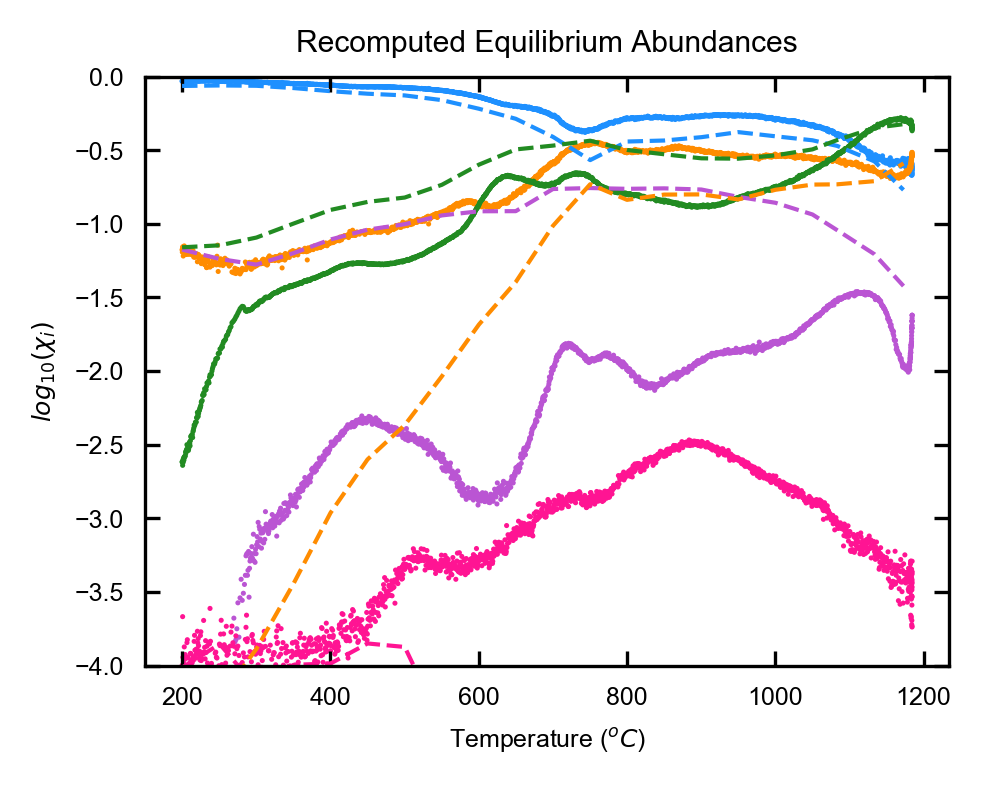

/Users/maggiethompson/.pyenv/versions/anaconda3-5.2.0/lib/python3.6/site-packages/ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in log10
  # This is added back by InteractiveShellApp.init_path()
/Users/maggiethompson/.pyenv/versions/anaconda3-5.2.0/lib/python3.6/site-packages/ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in log10
  app.launch_new_instance()
/Users/maggiethompson/.pyenv/versions/anaconda3-5.2.0/lib/python3.6/site-packages/ipykernel_launcher.py:23: RuntimeWarning: divide by zero encountered in log10


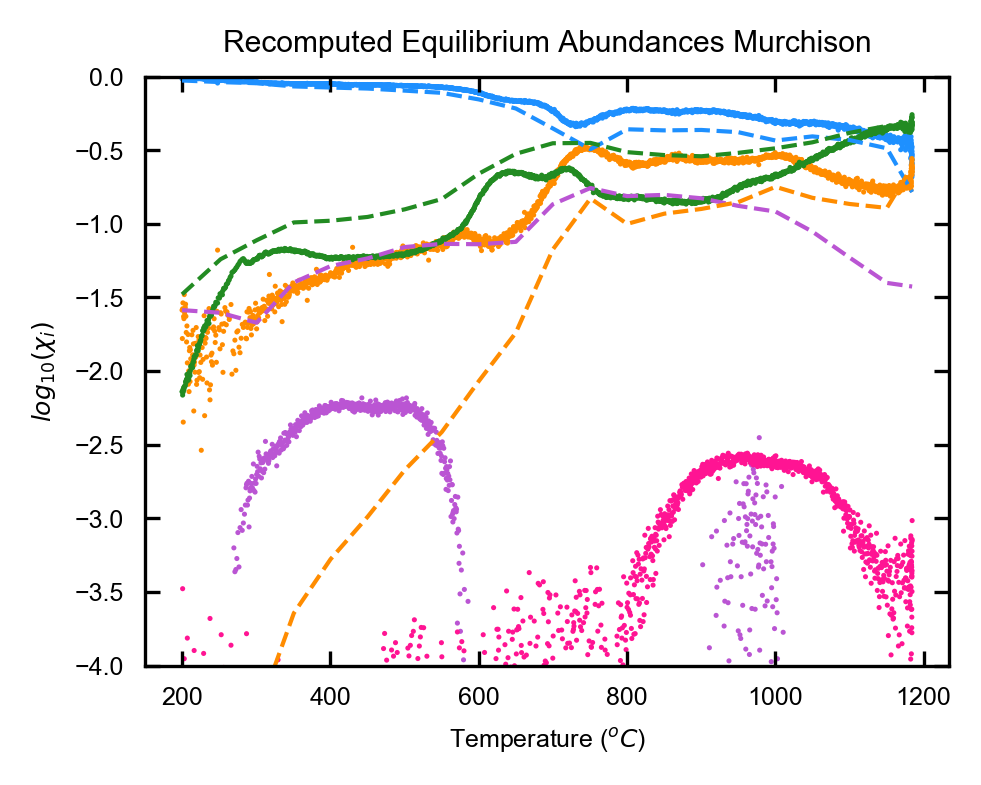

In [439]:
plotlogmolefrac_all((((M_X_up)+((W1_Xinterp_up+W2_Xinterp2_up)/2)+(AZ_Xinterp_up))/3), (Murchison_recompute+AZ_recompute+Winselwan_recompute)/3, 'Recomputed Equilibrium Abundances', 'CMAvg_recomputedabunds.jpg')
plotlogmolefrac_all(M_X_up, Murchison_recompute, 'Recomputed Equilibrium Abundances Murchison', 'Murchison_recomputedabunds.jpg')

#plotlogmolefrac_all(W_X_up, Winselwan_recompute, 'Recomputed Equilibrium Abundances Winselwan', 'Winselwanrecomputedabunds.jpg')
#plotlogmolefrac_all(AZ_X_up, AZ_recompute, 'Recomputed Equilibrium Abundances AZ', 'AZrecomputedabunds.jpg')



In [441]:
def plotlogmolefrac_LSpretty(file, title, title2):
    fig, ax = plt.subplots()
    plt.plot(file.T_C, np.log10(file.H2), linewidth=1, color='mediumorchid', label=r'H$_2$')
    plt.plot(file.T_C, np.log10(file.C), linewidth=1, color='lime', label=r'C')
    plt.plot(file.T_C, np.log10(file.N), linewidth=1, color='navy', label=r'N')
    plt.plot(file.T_C, np.log10(file.CH4), linewidth=1, color='red', label=r'CH$_4$')
    plt.plot(file.T_C, np.log10(file.H2O), linewidth=1, color='dodgerblue', label=r'H$_2$O')
    plt.plot(file.T_C, np.log10(file.CO), linewidth=1, color='darkorange', label=r'CO + N$_2$')
    plt.plot(file.T_C, np.log10(file.N2), linewidth=1, color='magenta', label=r'N2')
    plt.plot(file.T_C, np.log10(file.O2), linewidth=1, color='goldenrod', label=r'S or O$_2$')
    plt.plot(file.T_C, np.log10(file.H2S), linewidth=1, color='deeppink', label=r'H$_2$S')
    #plt.plot(file.T_C, np.log10(file.KH), color='darkviolet', label=r'KH')
    #plt.plot(file.T_C, np.log10(file.NaOH), color='purple', label=r'NaOH')
    plt.plot(file.T_C, np.log10(file.CO2), linewidth=1, color='forestgreen', label=r'CO$_2$')
    #plt.plot(file.T_C, np.log10(file.Fe), linewidth=0.2, label=r'Fe')
    #plt.plot(file.T_C, np.log10(file.H), linewidth=0.2, label=r'H')
    #plt.plot(file.T_C, np.log10(file.SO2), linewidth=0.2, label=r'SO$_2$')
    #plt.plot(file.T_C, np.log10(file.Ni), linewidth=0.2, label=r'Ni')
    #plt.plot(file.T_C, np.log10(file.SiO), linewidth=0.2, label=r'SiO')
    #plt.plot(file.T_C, np.log10(file.Na), linewidth=0.2, label=r'Na')
    #plt.plot(file.T_K, np.log10(file.OH), linewidth=0.2, label=r'OH')
    #plt.plot(file.T_K, np.log10(file.O), linewidth=0.2, label=r'O')
    #plt.plot(file.T_C, np.log10(file.SO), linewidth=0.2, label=r'SO')
    #plt.plot(file.T_C, np.log10(file.S2), linewidth=0.2, label=r'S$_2$')
    #plt.plot(file.T_K, np.log10(file.KCl), linewidth=0.2, label=r'KCl')
    #plt.plot(file.T_K, np.log10(file.HF), linewidth=0.2, label=r'HF')
    #plt.plot(file.T_K, np.log10(file.NaCl), linewidth=0.2, label=r'NaCl')
    #plt.plot(file.T_C, np.log10(file.Co), linewidth=0.2, label=r'Co')
    #plt.plot(file.T_K, np.log10(file.K), linewidth=0.2, label=r'K')
    #plt.plot(file.T_K, np.log10(file.CrO2), linewidth=0.2, label=r'CrO$_2$')
    #plt.plot(file.T_K, np.log10(file.FeO), linewidth=0.2, label=r'FeO')
    #plt.plot(file.T_K, np.log10(file.Mg), label=r'Mg')
    #plt.plot(file.T_C, np.log10(file.Mn), linewidth=0.2, label=r'Mn')
    #plt.plot(file.T_K, np.log10(file.PO2), linewidth=0.2, label=r'PO$_2$')
    #plt.plot(file.T_C, np.log10(file.PO), linewidth=0.2, label=r'Fe')
    #plt.yscale('log')
    ax.tick_params(top=True, right=True)
    plt.ylim(-4, 0)
    plt.xlim(150,1250)
    plt.xlabel(r'Temperature ($^o$C)')
    plt.ylabel(r'$log_{10}(\chi_{i})$')
    plt.title(title)
    #plt.legend(fontsize='small', loc=0)
    plt.savefig(title2, dpi=1000)
    plt.show()
    
def plotlogmolefrac_LSprettyothers(file, title, title2):
    fig, ax = plt.subplots()
    #plt.plot(file.T_C, np.log10(file.H2), linewidth=2, color='lime', label=r'H$_2$')
    #plt.plot(file.T_C, np.log10(file.C), linewidth=2, color='orchid', label=r'C')
    #plt.plot(file.T_C, np.log10(file.N), linewidth=2, color='navy', label=r'N')
    #plt.plot(file.T_C, np.log10(file.CH4), linewidth=2, color='dodgerblue', label=r'CH$_4$')
    plt.plot(file.T_C, np.log10(file.H2O), linewidth=1, color='dodgerblue', label=r'H$_2$O')
    #plt.plot(file.T_C, np.log10(file.CO), linewidth=2, color='darkorange', label=r'CO + N$_2$')
    #plt.plot(file.T_C, np.log10(file.N2), linewidth=2, color='magenta', label=r'N2')
    #plt.plot(file.T_C, np.log10(file.O2), linewidth=2, color='goldenrod', label=r'S or O$_2$')
    #plt.plot(file.T_C, np.log10(file.H2S), linewidth=2, color='deeppink', label=r'H$_2$S')
    #plt.plot(file.T_C, np.log10(file.KH), color='darkviolet', label=r'KH')
    #plt.plot(file.T_C, np.log10(file.NaOH), color='purple', label=r'NaOH')
    #plt.plot(file.T_C, np.log10(file.CO2), linewidth=2, color='forestgreen', label=r'CO$_2$')
    plt.plot(file.T_C, np.log10(file.Fe), linewidth=1, label=r'Fe')
    plt.plot(file.T_C, np.log10(file.H), linewidth=1, label=r'H')
    plt.plot(file.T_C, np.log10(file.SO2), linewidth=1, label=r'SO$_2$')
    plt.plot(file.T_C, np.log10(file.Ni), linewidth=1, label=r'Ni')
    plt.plot(file.T_C, np.log10(file.SiO), linewidth=1, label=r'SiO')
    plt.plot(file.T_C, np.log10(file.Na), linewidth=1, label=r'Na')
    #plt.plot(file.T_K, np.log10(file.OH), linewidth=0.2, label=r'OH')
    #plt.plot(file.T_K, np.log10(file.O), linewidth=2, label=r'O')
    plt.plot(file.T_C, np.log10(file.SO), linewidth=1, label=r'SO')
    plt.plot(file.T_C, np.log10(file.S2), linewidth=1, label=r'S$_2$')
    #plt.plot(file.T_K, np.log10(file.KCl), linewidth=0.2, label=r'KCl')
    #plt.plot(file.T_K, np.log10(file.HF), linewidth=0.2, label=r'HF')
    #plt.plot(file.T_K, np.log10(file.NaCl), linewidth=0.2, label=r'NaCl')
    plt.plot(file.T_C, np.log10(file.Co), linewidth=1, label=r'Co')
    #plt.plot(file.T_K, np.log10(file.K), linewidth=0.2, label=r'K')
    #plt.plot(file.T_K, np.log10(file.CrO2), linewidth=0.2, label=r'CrO$_2$')
    #plt.plot(file.T_K, np.log10(file.FeO), linewidth=0.2, label=r'FeO')
    #plt.plot(file.T_K, np.log10(file.Mg), label=r'Mg')
    plt.plot(file.T_C, np.log10(file.Mn), linewidth=1, label=r'Mn')
    #plt.plot(file.T_K, np.log10(file.PO2), linewidth=0.2, label=r'PO$_2$')
    plt.plot(file.T_C, np.log10(file.PO), linewidth=1, label=r'Fe')
    #plt.yscale('log')
    ax.tick_params(top=True, right=True)
    plt.ylim(-4, 0)
    plt.xlim(150,1250)
    plt.xlabel(r'Temperature ($^o$C)')
    plt.ylabel(r'$log_{10}(\chi_{i})$')
    plt.title(title)
    #plt.legend(fontsize='small', loc=0)
    plt.savefig(title2, dpi=1000)
    plt.show()

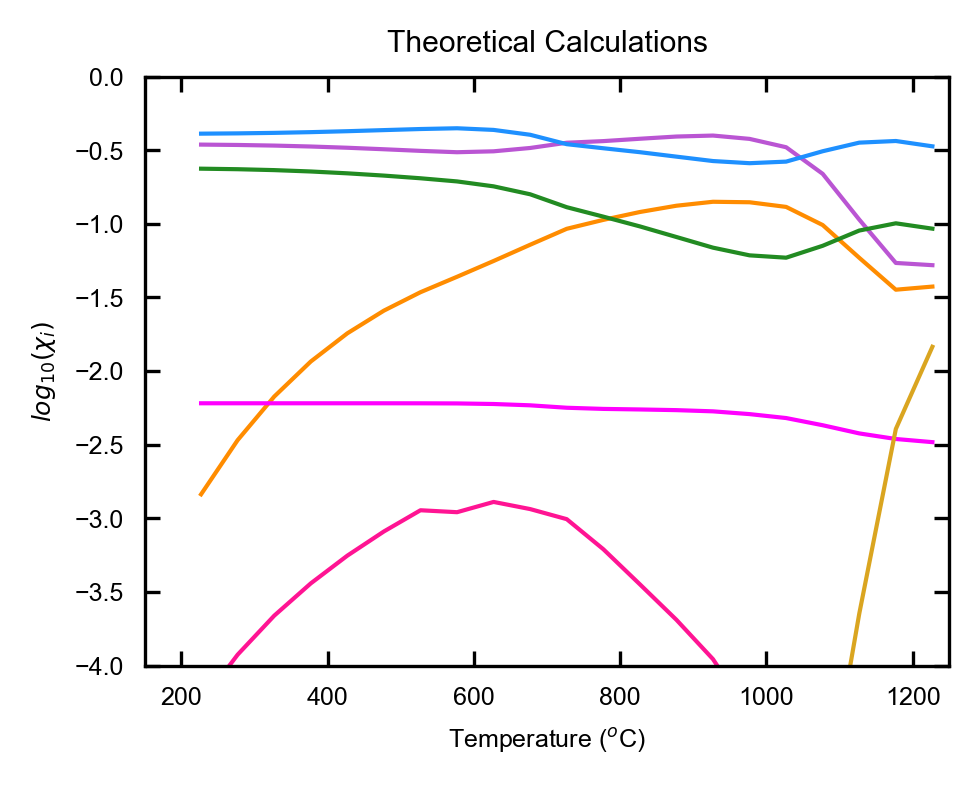

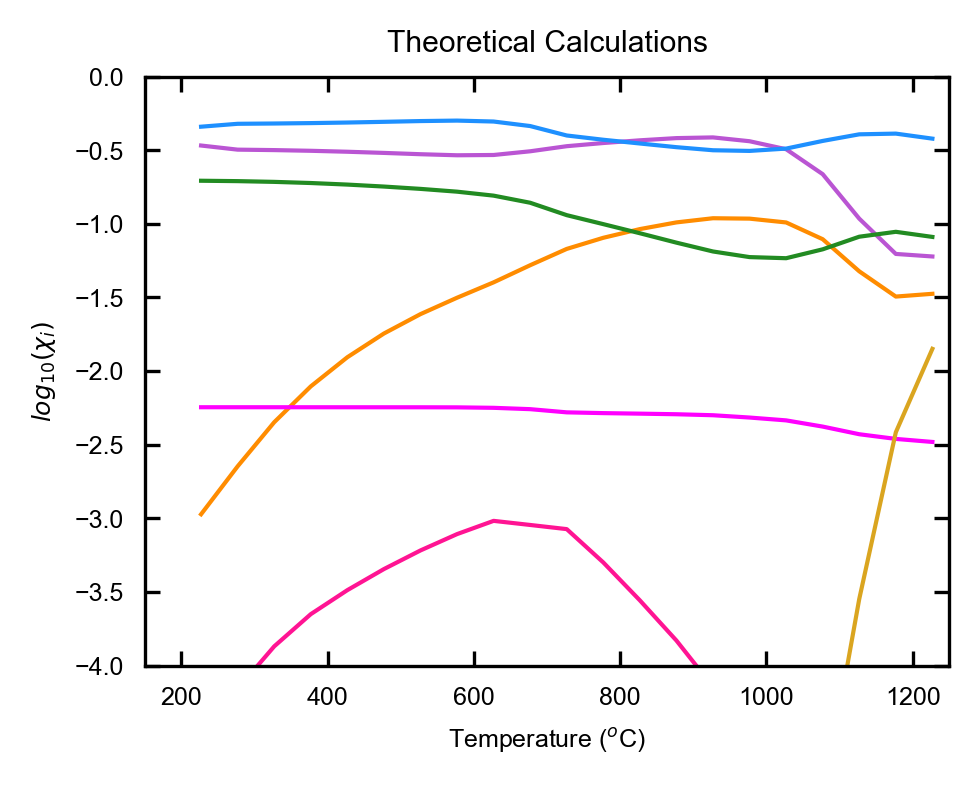

In [442]:
plotlogmolefrac_LSpretty(LS_murchison, 'Theoretical Calculations', 'MurchisonX_Schaefer.jpg')
plotlogmolefrac_LSpretty(LS_CM, 'Theoretical Calculations', 'CMavgX_Schaefer.jpg')



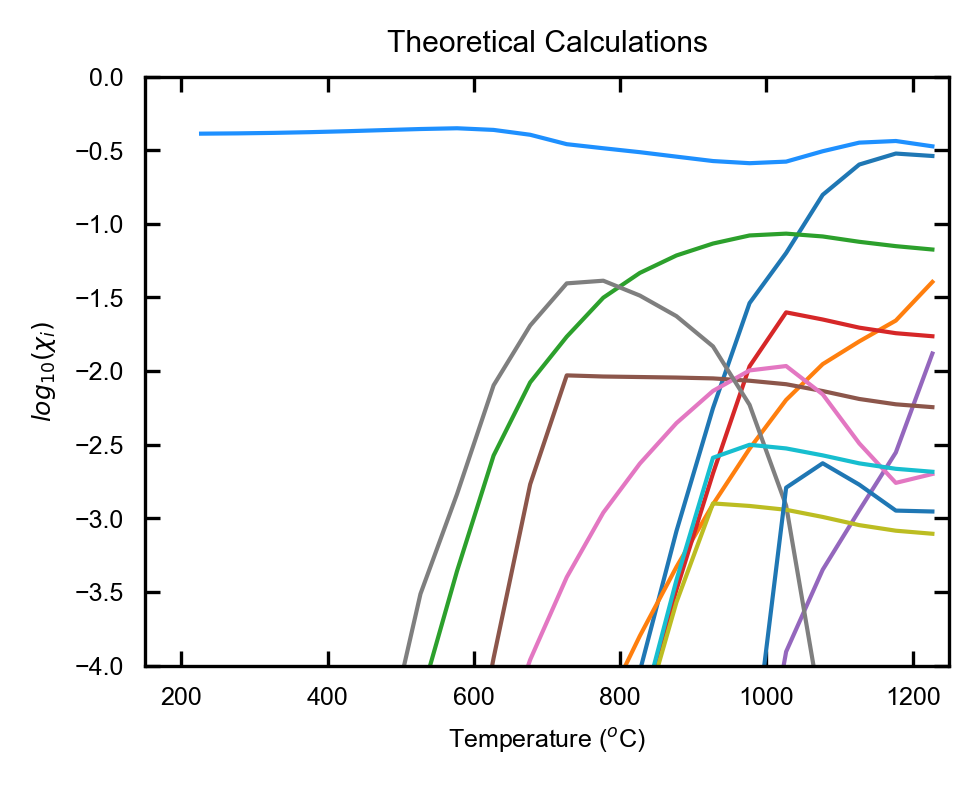

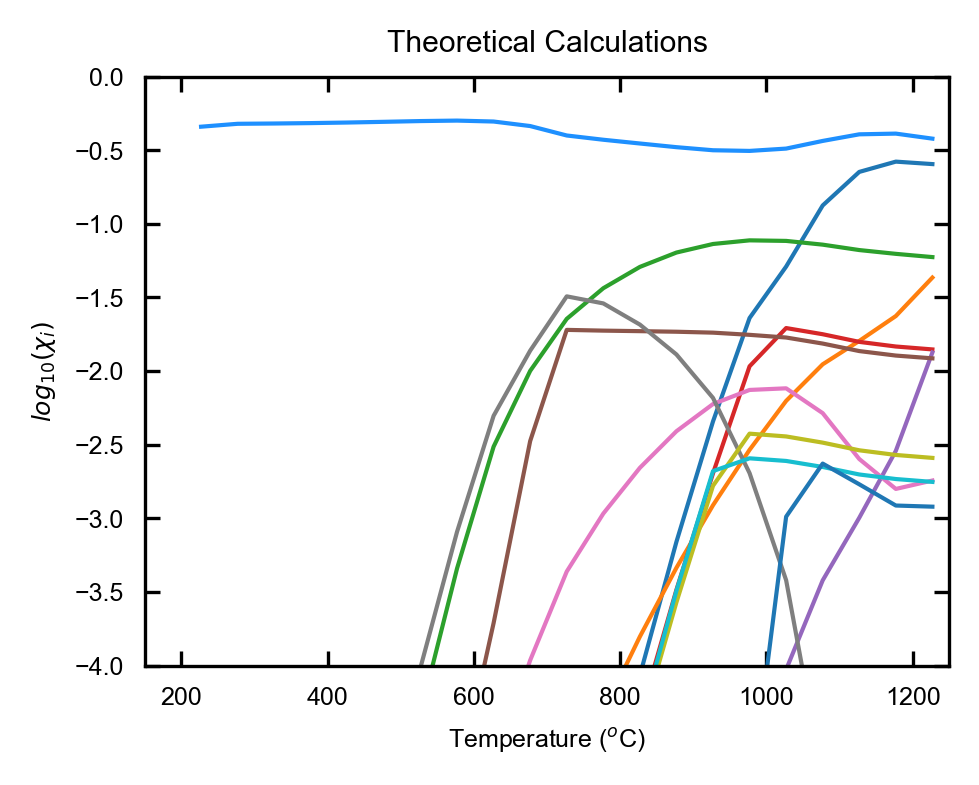

In [443]:
plotlogmolefrac_LSprettyothers(LS_murchison, 'Theoretical Calculations', 'MurchisonX_SchaeferOthers.jpg')
plotlogmolefrac_LSprettyothers(LS_CM, 'Theoretical Calculations', 'CMavgX_SchaeferOthers.jpg')


In [6]:
sum_species = []
sum_species_M = []
for i in ['H2', 'C', 'N', 'CH4', 'H2O', 'CO', 'O2', 'H2S','NaOH', 'KH', 'CO2', 'N2', 'Fe', 'H', 'SO2', 'Ni', 'SiO', 'Na', 'OH', 'O', 'SO', 'S2', 'KCl', 'HF', 'NaCl', 'Co', 'K','CrO2', 'FeO', 'Mg', 'Mn', 'PO2', 'PO']:
    sum_i = np.sum(LS_CM[i])
    sum_i_M = np.sum(LS_murchison[i])
    sum_species.append(sum_i)
    sum_species_M.append(sum_i_M)

LS_CM_Xtotal = np.sum(sum_species)
LS_murchison_Xtotal = np.sum(sum_species_M)


species_Xtot = []
species_XtotM = []
for i in ['H2', 'C', 'N', 'CH4', 'H2O', 'CO', 'O2', 'H2S','NaOH', 'KH', 'CO2', 'N2', 'Fe', 'H', 'SO2', 'Ni', 'SiO', 'Na', 'OH', 'O', 'SO', 'S2', 'KCl', 'HF', 'NaCl', 'Co', 'K','CrO2', 'FeO', 'Mg', 'Mn', 'PO2', 'PO']:
    i_Xtot = np.sum(LS_CM[i])/LS_CM_Xtotal
    i_Xtot_M = np.sum(LS_murchison[i])/LS_murchison_Xtotal
    species_Xtot.append(i_Xtot)
    species_XtotM.append(i_Xtot_M)
    
LS_CMXtot = pd.DataFrame(species_Xtot)
LS_MXtot = pd.DataFrame(species_XtotM)
LS_CM_Xtot = LS_CMXtot.T
LS_M_Xtot = LS_MXtot.T
LS_CM_Xtot.columns = ['H2', 'C', 'N', 'CH4', 'H2O', 'CO', 'O2', 'H2S','NaOH', 'KH', 'CO2', 'N2', 'Fe', 'H', 'SO2', 'Ni', 'SiO', 'Na', 'OH', 'O', 'SO', 'S2', 'KCl', 'HF', 'NaCl', 'Co', 'K','CrO2', 'FeO', 'Mg', 'Mn', 'PO2', 'PO']
LS_M_Xtot.columns = ['H2', 'C', 'N', 'CH4', 'H2O', 'CO', 'O2', 'H2S','NaOH', 'KH', 'CO2', 'N2', 'Fe', 'H', 'SO2', 'Ni', 'SiO', 'Na', 'OH', 'O', 'SO', 'S2', 'KCl', 'HF', 'NaCl', 'Co', 'K','CrO2', 'FeO', 'Mg', 'Mn', 'PO2', 'PO']

display(LS_CM_Xtot*100)
print(LS_CM_Xtot.N2*100)
print(LS_CM_Xtot.CO2*100)
print(LS_CM_Xtot.SO2*100)
print('')
display(LS_M_Xtot*100)
print(LS_M_Xtot.N2*100)

H2             C             N           CH4        H2O        CO  \
0  28.850981  9.986731e-22  2.263485e-10  4.922846e-10  41.935288  4.992353   

         O2       H2S      NaOH            KH    ...           HF      NaCl  \
0  0.087117  0.030302  0.000075  3.944933e-09    ...     0.018444  0.014721   

         Co         K      CrO2       FeO        Mg        Mn       PO2  \
0  0.098827  0.093251  0.017869  0.026678  0.014335  0.072848  0.023391   

         PO  
0  0.035776  

[1 rows x 33 columns]

0    0.506505
Name: N2, dtype: float64
0    12.60297
Name: CO2, dtype: float64
0    3.214323
Name: SO2, dtype: float64



H2             C             N           CH4        H2O        CO  \
0  30.017052  1.136333e-21  2.262479e-10  7.878563e-10  36.508948  6.511611   

         O2       H2S      NaOH            KH    ...           HF      NaCl  \
0  0.090015  0.043541  0.000031  1.848131e-09    ...     0.020445  0.016607   

         Co         K      CrO2       FeO        Mg        Mn       PO2  \
0  0.035517  0.042265  0.023352  0.030185  0.014335  0.087751  0.021737   

         PO  
0  0.037769  

[1 rows x 33 columns]

0    0.534786
Name: N2, dtype: float64


In [ ]:
print(np.max(((M_X_up)+((W1_Xinterp_up+W2_Xinterp2_up)/2)+(AZ_Xinterp_up))/3))
#print(np.mean(M_X_up2.N2))
print('')
print(np.max(LS_CM.H2))
print('')
print(np.max(LS_murchison.H2))
#print('')
#print(LS_CM_Xtot.H2O)

## Oxygen Fugacity 

In [100]:
torre_to_bar = 0.00133322 #1 Torr = 0.00133322 bars
MPa_to_bar = 10.0

#print(M_partialP.TotalP*torre_to_bar)

def calcOfug(file, x):
    K1 = 10**((-12794/file.T_interp_K) + 2.7768)
    K2 = 10**((-14787/file.T_interp_K) + 4.5472)
    K3 = 10**((-16276/file.T_interp_K) - 5.4738)
    Ofug_H = np.log10(((file.H2O/file.H2)*K1)**2)
    Ofug_C = np.log10(((file.CO2/(file.CO*x))*K2)**2)
    #Ofug_CH4 = np.log10((K3*file.CO2*(file.H2**2)*(Ptot**2))/(file.CH4))
    return [Ofug_H, Ofug_C]

def calcOfug_interp(file, file_interp):
    H2O_interp = np.interp(file_interp.T_K[::-1], file.T_interp_K, file.H2O)
    K1 = 10**((-12794/file.T_K) + 2.7768)
    K2 = 10**((-14787/file.T_K) + 4.5472)
    K3 = 10**((-16276/file.T_K) - 5.4738)
    Ofug_H = np.log10(((file.H2O/file.H2)*K1)**2)
    Ofug_C = np.log10(((file.CO2/(file.CO))*K2)**2)
    return [Ofug_H, Ofug_C]

def QFM_buffer(file):
    A = 5.5976
    B = 24505.0
    C = 0.8099
    D = 0.0937
    logfO2 = A - (B/file.T_interp_K) + (C*np.log10(file.T_interp_K)) + ((D*(file.TotalP*torre_to_bar))/file.T_interp_K)
    return logfO2

def QFM_buffer_LS(file):
    A = 5.5976
    B = 24505.0
    C = 0.8099
    D = 0.0937
    logfO2 = A - (B/file.T_K) + (C*np.log10(file.T_K)) + ((D*(file.P*MPa_to_bar))/file.T_K)
    return logfO2

def calcOfug_LS(file, x):
    K1 = 10**((-12794/file.T_K) + 2.7768)
    K2 = 10**((-14787/file.T_K) + 4.5472)
    K3 = 10**((-16276/file.T_K) - 5.4738)
    Ofug_H = np.log10(((file.H2O/file.H2)*K1)**2)
    Ofug_C = np.log10(((file.CO2/(file.CO*x))*K2)**2)
    #Ofug_CH4 = np.log10((K3*file.CO2*(file.H2**2)*(Ptot**2))/(file.CH4))
    return [Ofug_H, Ofug_C]

def calcOfug_LSinterp(file, file_interp):
    H2O_interp = np.interp(file_interp.T_interp_K, file.T_K[::-1], file.H2O[::-1])
    H2_interp = np.interp(file_interp.T_interp_K, file.T_K[::-1], file.H2[::-1])
    CO2_interp = np.interp(file_interp.T_interp_K, file.T_K[::-1], file.CO2[::-1])
    CO_interp = np.interp(file_interp.T_interp_K, file.T_K[::-1], file.CO[::-1])
    K1 = 10**((-12794/file_interp.T_interp_K) + 2.7768)
    K2 = 10**((-14787/file_interp.T_interp_K) + 4.5472)
    #K3 = 10**((-16276/file.T_K) - 5.4738)
    Ofug_H = np.log10(((H2O_interp/H2_interp)*K1)**2)
    Ofug_C = np.log10(((CO2_interp/(CO_interp))*K2)**2)
    #Ofug_CH4 = np.log10((K3*file.CO2*(file.H2**2)*(Ptot**2))/(file.CH4))
    return [Ofug_H, Ofug_C]


In [445]:
from matplotlib.transforms import Transform
from matplotlib.ticker import (
    AutoLocator, AutoMinorLocator)
import datetime
import matplotlib.dates as mdates


def plotOfug_LS_play(file1, file2, file3, title, title2):
    MPa_to_bar = 10.0 #1MPa=10 bars
    Ofug = calcOfug_LS(file1, 1.0)
    Ofug2 = calcOfug(file2, 1.0)
    fig = plt.figure()
    ax = fig.add_subplot(111)

    ax.plot(1000.0/file1.T_C, Ofug[0], marker='o',markersize=1, color='black', label=r'f$_{O_{2}}$ Theory')
    #ax.plot(1000.0/file1.T_C, Ofug[1], marker='o', markersize=1, color='orangered', label=r'CO$_2$/CO Theory')
    #plt.plot(1000.0/file1.T_C, Ofug[2], marker='o', markersize=1, color='turquoise', label=r'CH$_4$/CO$_2$ Theory')
    #ax.plot(1000.0/file1.T_C, np.log10(file1.O2 * file1.P * MPa_to_bar), markersize=1, color='g', alpha=0.8, label=r'$O_2$ Theory')

    ax.plot(1000.0/file2.T_interp_C, Ofug2[0], marker='o', markersize=1, color='dodgerblue', label=r'H$_2$O/H$_2$ Experiment')
    ax.plot(1000.0/file2.T_interp_C, Ofug2[1], marker='o', markersize=1, color='orangered', label=r'CO$_2$/CO Experiment')
    
    ax.plot(1000.0/file2.T_interp_C, (Ofug2[0]+Ofug2[1])/2.0, marker='o', markersize=1, color='forestgreen', label=r'Average Experiment')

    #plt.plot(1000.0/file2.T_interp_C, Ofug2[2], marker='o', markersize=1, color='crimson', label=r'CH$_4$/CO$_2$ Experiment')
    #ax.plot(1000.0/file2.T_interp_C, np.log10(file2.O2 * torre_to_bar), markersize=1, color='darkviolet', label=r'O$_2$ Experiment')
    #plt.plot(1000.0/file2.T_interp_C, np.log10(file2.S_O2_v2 * torre_to_bar), markersize=1, color='r', alpha=0.5, label=r'$O_2$ Experiment v2')
    ax.set_xticks([1,2,3,4,5])
    ax.tick_params(top=True, right=True)
    ax2 = ax.twiny() 
    ax2.set_xbound(ax.get_xbound())
    ax2.tick_params(top=True, right=True)
    ax2.set_xticks([1,2,3,4,5])
    ax2.set_xticklabels(['1000','500','333', '250', '200'])
    ax.set_xlabel(r'(1000/T) ($^o$C$^{-1}$)')
    ax2.set_xlabel(r'T ($^o$C)')
    ax.set_ylabel(r'log(f$_{O_{2}}$)')
    ax.invert_xaxis()
    ax2.invert_xaxis()
    #plt.title(title)
    ax.legend(fontsize=11, loc=4)
    plt.savefig(title2, dpi=1000)
    plt.show()
    
def plotOfug_diff(file1, file2, file3, title, title2):
    MPa_to_bar = 10.0 #1MPa=10 bars
    
    Ofug = calcOfug_LS(file1, 1.0)
    Ofug2 = calcOfug(file2, 1.0)
    Ofug3 = calcOfug_LSinterp(file1, file2)
    
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.plot(1000.0/file2.T_interp_C, Ofug3[0]-Ofug2[0], marker='o', markersize=1, color='dodgerblue', label=r'log(f$_{O_2}$) Theory - log(f$_{O_2}$)(H$_2$O/H$_2$) Experiment')
    ax.plot(1000.0/file2.T_interp_C, Ofug3[0]-Ofug2[1], marker='o', markersize=1, color='orangered', label=r'log(f$_{O_2}$) Theory - log(f$_{O_2}$)(CO$_2$/CO) Experiment')
    ax.plot(1000.0/file2.T_interp_C, Ofug3[0]-((Ofug2[0]+Ofug2[1])/2.0), marker='o', markersize=1, color='forestgreen', label=r'log(f$_{O_2}$) Theory - log(f$_{O_2}$) Average Experiment')
    ax.axhline(y=0, linestyle='--', color='gray', label=r'Y=0')
    #ax.plot(1000.0/file2.T_interp_C, Ofug3[0]-np.log10(file3.O2 * torre_to_bar), markersize=1, color='darkviolet', label=r'log(f$_{O_2}$) Theory - log(f$_{O_2}$)(O$_2$) Experiment')
    ax.set_xticks([1,2,3,4,5])
    ax.tick_params(top=True, right=True)
    ax2 = ax.twiny() 
    ax2.set_xbound(ax.get_xbound())
    ax2.tick_params(top=True, right=True)
    ax2.set_xticks([1,2,3,4,5])
    ax2.set_xticklabels(['1000','500','333', '250', '200'])
    ax.set_xlabel(r'(1000/T) ($^o$C$^{-1}$)')
    ax2.set_xlabel(r'T ($^o$C)')
    ax.set_ylabel(r'log(f$_{O_{2}}$) Theory - log(f$_{O_{2}}$) Experiment')
    ax.invert_xaxis()
    ax2.invert_xaxis()
    #plt.title(title)
    ax.legend(fontsize=10, loc=3)
    #ax.legend(fontsize=10, loc=4)
    plt.savefig(title2, dpi=1000)
    plt.show()
    
    
def plotOfug_QFM(file1, file2, file3, title, title2):
    MPa_to_bar = 10.0 #1MPa=10 bars
    Ofug = calcOfug_LS(file1, 1.0)
    Ofug2 = calcOfug(file2, 1.0)
    fig = plt.figure()
    ax = fig.add_subplot(111)

    ax.plot(1000.0/file1.T_C, Ofug[0], marker='o',markersize=1, color='black', label=r'f$_{O_{2}}$ Theory')
    #ax.plot(1000.0/file1.T_C, Ofug[1], marker='o', markersize=1, color='orangered', label=r'CO$_2$/CO Theory')
    #plt.plot(1000.0/file1.T_C, Ofug[2], marker='o', markersize=1, color='turquoise', label=r'CH$_4$/CO$_2$ Theory')
    #ax.plot(1000.0/file1.T_C, np.log10(file1.O2 * file1.P * MPa_to_bar), markersize=1, color='g', alpha=0.8, label=r'$O_2$ Theory')
    ax.plot(1000.0/file2.T_interp_C, Ofug2[0], marker='o', markersize=1, color='dodgerblue', label=r'H$_2$O/H$_2$ Experiment')
    ax.plot(1000.0/file2.T_interp_C, Ofug2[1], marker='o', markersize=1, color='orangered', label=r'CO$_2$/CO Experiment')
    
    ax.plot(1000.0/file2.T_interp_C, (Ofug2[0]+Ofug2[1])/2.0, marker='o', markersize=1, color='forestgreen', label=r'Average Experiment')
    ax.plot(1000.0/file3.T_interp_C, QFM_buffer(file3), linestyle='--', color='gray', label='QFM')
    #plt.plot(1000.0/file2.T_interp_C, Ofug2[2], marker='o', markersize=1, color='crimson', label=r'CH$_4$/CO$_2$ Experiment')
    #ax.plot(1000.0/file3.T_interp_C, np.log10(file3.O2 * torre_to_bar), markersize=1, color='darkviolet', label=r'O$_2$ Experiment')
    #plt.plot(1000.0/file2.T_interp_C, np.log10(file2.S_O2_v2 * torre_to_bar), markersize=1, color='r', alpha=0.5, label=r'$O_2$ Experiment v2')
    ax.set_xticks([1,2,3,4,5])
    ax.tick_params(top=True, right=True)
    ax2 = ax.twiny() 
    ax2.set_xbound(ax.get_xbound())
    ax2.tick_params(top=True, right=True)
    ax2.set_xticks([1,2,3,4,5])
    ax2.set_xticklabels(['1000','500','333', '250', '200'])
    ax.set_xlabel(r'(1000/T) ($^o$C$^{-1}$)')
    ax2.set_xlabel(r'T ($^o$C)')
    ax.set_ylabel(r'log(f$_{O_{2}}$)')
    ax.invert_xaxis()
    ax2.invert_xaxis()
    #plt.title(title)
    ax.legend(fontsize=11, loc=4)
    #plt.savefig(title2, dpi=1000)
    plt.show()
    
def plotOfug_relQFM(file1, file2, file3, title, title2):
    MPa_to_bar = 10.0 #1MPa=10 bars
    Ofug = calcOfug_LS(file1, 1.0)
    Ofug2 = calcOfug(file2, 1.0)
    #print(Ofug2)
    fig = plt.figure()
    ax = fig.add_subplot(111)

    ax.plot(1000.0/file1.T_C, Ofug[0] - QFM_buffer_LS(file1), marker='o',markersize=0.5, color='black', label=r'f$_{O_{2}}$ Theory')
    #ax.plot(1000.0/file1.T_C, Ofug[1], marker='o', markersize=1, color='orangered', label=r'CO$_2$/CO Theory')
    #plt.plot(1000.0/file1.T_C, Ofug[2], marker='o', markersize=1, color='turquoise', label=r'CH$_4$/CO$_2$ Theory')
    #ax.plot(1000.0/file1.T_C, np.log10(file1.O2 * file1.P * MPa_to_bar), markersize=1, color='g', alpha=0.8, label=r'$O_2$ Theory')
    ax.plot(1000.0/file2.T_interp_C, Ofug2[0]-QFM_buffer(file3), marker='o', markersize=0.5, color='dodgerblue', label=r'H$_2$O/H$_2$ Experiment')
    ax.plot(1000.0/file2.T_interp_C, Ofug2[1]-QFM_buffer(file3), marker='o', markersize=0.5, color='darkorange', label=r'CO$_2$/CO Experiment')
    
    #ax.plot(1000.0/file2.T_interp_C, ((Ofug2[0]+Ofug2[1])/2.0)-(QFM_buffer(file3)), marker='o', markersize=1, color='mediumseagreen', label=r'Average Experiment')
    #ax.plot(1000.0/file3.T_interp_C, QFM_buffer(file3), linestyle='--', color='gray', label='QFM')
    #plt.plot(1000.0/file2.T_interp_C, Ofug2[2], marker='o', markersize=1, color='crimson', label=r'CH$_4$/CO$_2$ Experiment')
    #ax.plot(1000.0/file2.T_interp_C, np.log10((file3.O2 * torre_to_bar)-QFM_buffer(file3)), markersize=1, color='darkviolet', alpha=0.5, label=r'O$_2$ Experiment')
    #ax.plot(1000.0/file2.T_interp_C, np.log10(-QFM_buffer(file3)), markersize=1, color='deeppink', alpha=0.5, label=r'QFM Buffer')

    #plt.plot(1000.0/file2.T_interp_C, np.log10(file2.S_O2_v2 * torre_to_bar), markersize=1, color='r', alpha=0.5, label=r'$O_2$ Experiment v2')
    ax.set_xticks([1,2,3,4,5])
    ax.tick_params(top=True, right=True)
    ax2 = ax.twiny() 
    ax2.set_xbound(ax.get_xbound())
    ax2.tick_params(top=True, right=True)
    ax2.set_xticks([1,2,3,4,5])
    ax2.set_xticklabels(['1000','500','333', '250', '200'])
    ax.set_xlabel(r'(1000/T) ($^o$C$^{-1}$)')
    ax2.set_xlabel(r'T ($^o$C)')
    ax.set_ylabel(r'log(f$_{O_{2}})-$QFM')
    ax.set_ylim(-12, 8)
    ax.invert_xaxis()
    ax2.invert_xaxis()
    #plt.title(title)
    ax.legend(loc=4)
    plt.savefig(title2, dpi=1000, bbox_inches='tight')
    plt.show()

In [472]:
LS_CM.to_csv('Fig4_Model.csv')

CMavg_X_upinterp = ((M_X_up)+((W1_Xinterp_up+W2_Xinterp2_up)/2)+(AZ_Xinterp_up))/3
CMavg_X_upinterp.to_csv('Fig4_Experiment.csv')

CMavg_partialP_Uinterp = ((M_partialP_U)+((W1_partialP_U_interp+W2_partialP_U_interp)/2) + (AZ_partialP_U_interp))/3
CMavg_partialP_Uinterp.to_csv('Fig4_Pressures.csv')

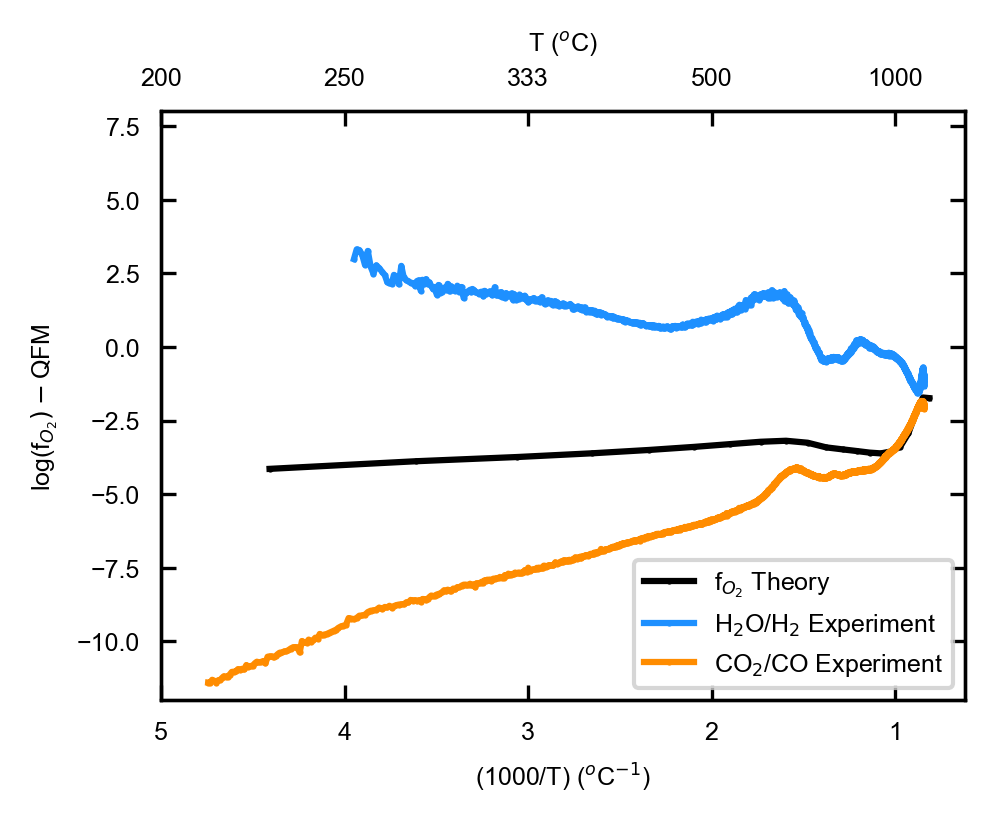

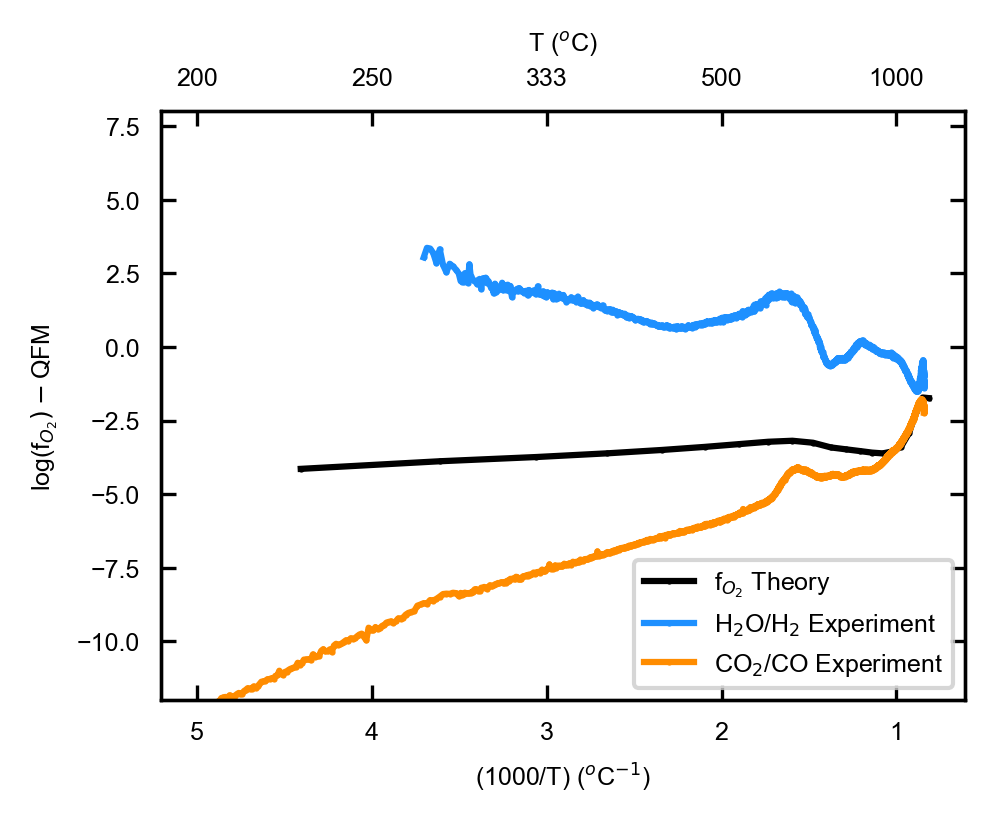

In [446]:
#Updated analysis (adding ion fragments back, NIST fragments)
plotOfug_relQFM(LS_CM, ((M_X_up)+((W1_X_up+W2_X_up)/2)+(AZ_X_up))/3, ((M_partialP_U)+((W1_partialP_U+W2_partialP_U)/2) + (AZ_partialP_U))/3, 'Theory vs. Experiments CM Avg (Update)', 'Ofug_TheoryvsExperimentsCMAvg_relQFM_update.jpg')

plotOfug_relQFM(LS_CM, ((M_X_up)+((W1_Xinterp_up+W2_Xinterp2_up)/2)+(AZ_Xinterp_up))/3, ((M_partialP_U)+((W1_partialP_U_interp+W2_partialP_U_interp)/2) + (AZ_partialP_U_interp))/3, 'Theory vs. Experiments CM Avg (Update Interpolated)', 'Ofug_TheoryvsExperimentsCMAvg_relQFM_updateinterp.jpg')


